<img src="https://uwe-cyber.github.io/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 3
### Academic year: 2023-24

## Conduct a security investigation into a suspected insider threat
---

**UWEtech** are calling you back once more to help them with their security challenges. They believe that one of their employees has been the cause of their recent security problems, and they believe they may have an insider threat within the company. They enlist your help to examine employee log activity, to see what behaviours deviate from the norm and to identify which user may be acting as a threat to their organisation.

**Dataset:** You will be issued a **unique dataset** based on your UWE student ID. **Failure to use the dataset that corresponds to your student ID will result in zero marks.** Please access the datasets via Blackboard.

**This exercise carries a weight of 45% towards your overall portfolio submission**


### Submission Documents
---

For Part 3 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART3.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 11th JANUARY @ 14:00**. 

## DATASET: Load in the data

**Please provide the string below that you have been assigned as given in the spreadsheet available on Blackboard. The directory containing your dataset should be at the same location as your notebook file.**

In [98]:
# PLEASE ENTER THE NAME OF THE DATASET ASSIGNED TO YOU AS INDICATED ON BLACKBOARD
DATASET = 'uwetech-dataset02'

### Function for loading data - do not change

In [99]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime

def load_data(DATASET):
    dataset_list = ['uwetech-dataset01', 'uwetech-dataset02', 'uwetech-dataset03', 'uwetech-dataset04']
    if DATASET in dataset_list:
        email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('./' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('./' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('./' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('./' + DATASET + '/employee_data.csv', index_col=0)
        
        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined - please refer to Blackboard for DATASET name")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)

### The following code samples may be useful to aid your investigation

In [100]:
# This shows the employee_data DataFrame
employee_data

user       role                email     pc
0    usr-bls      Legal  usr-bls@uwetech.com    pc0
1    usr-hqk   Services  usr-hqk@uwetech.com    pc1
2    usr-jnu   Security  usr-jnu@uwetech.com    pc2
3    usr-max         HR  usr-max@uwetech.com    pc3
4    usr-tlm  Technical  usr-tlm@uwetech.com    pc4
..       ...        ...                  ...    ...
245  usr-esq      Legal  usr-esq@uwetech.com  pc245
246  usr-qhg  Technical  usr-qhg@uwetech.com  pc246
247  usr-wit    Finance  usr-wit@uwetech.com  pc247
248  usr-tqc      Legal  usr-tqc@uwetech.com  pc248
249  usr-jpj      Legal  usr-jpj@uwetech.com  pc249

[250 rows x 4 columns]

In [101]:
# This shows the login_data DataFrame
login_data

datetime     user  action     pc
0      2022-01-01 00:02:34  usr-mhy   login  pc158
1      2022-01-01 00:04:20  usr-itw   login  pc214
2      2022-01-01 00:06:16  usr-yvy   login  pc126
3      2022-01-01 00:11:15  usr-ovo   login  pc127
4      2022-01-01 00:21:42  usr-dyz   login   pc55
...                    ...      ...     ...    ...
151995 2022-10-31 23:24:55  usr-wpq  logoff   pc40
151996 2022-10-31 23:30:43  usr-rgu  logoff  pc234
151997 2022-10-31 23:46:02  usr-maa  logoff   pc48
151998 2022-10-31 23:53:22  usr-rjx  logoff  pc184
151999 2022-10-31 23:53:43  usr-nbs  logoff   pc82

[152000 rows x 4 columns]

In [102]:
# This shows how to filter the login_data DataFrame by a particular username
login_data[login_data['user']=='usr-nic']

Empty DataFrame
Columns: [datetime, user, action, pc]
Index: []

In [103]:
# This shows how to filter the login_data DataFrame by a particular set of usernames within a list
login_data[login_data['user'].isin(['usr-nic'])]

Empty DataFrame
Columns: [datetime, user, action, pc]
Index: []

In [104]:
# all_roles is an array/list of all job roles that are within our DataFrame
all_roles = employee_data['role'].unique()
all_roles

array(['Legal', 'Services', 'Security', 'HR', 'Technical', 'Finance',
       'Director'], dtype=object)

In [105]:
### This sample code helps to create two dictionary objects - user_set and user_set_emails - that group usernames and emails by job role.

user_set = {}
user_set_emails = {}
all_roles = employee_data['role'].unique()
for role in all_roles:
    user_set[role] = list(employee_data[employee_data['role'] == role]['user'].values)
    user_set_emails[role] = list(employee_data[employee_data['role'] == role]['email'].values)

In [106]:
# List all usernames that belong to the job role Finance
user_set['Finance']

['usr-tes',
 'usr-gno',
 'usr-saj',
 'usr-twi',
 'usr-vfe',
 'usr-esw',
 'usr-bhe',
 'usr-yua',
 'usr-jlu',
 'usr-udk',
 'usr-krq',
 'usr-paa',
 'usr-zdx',
 'usr-avr',
 'usr-vff',
 'usr-skm',
 'usr-lej',
 'usr-sxb',
 'usr-ton',
 'usr-hzd',
 'usr-dip',
 'usr-soa',
 'usr-cjg',
 'usr-int',
 'usr-iva',
 'usr-sqc',
 'usr-hpx',
 'usr-wbj',
 'usr-ogy',
 'usr-vkk',
 'usr-zii',
 'usr-uoe',
 'usr-aen',
 'usr-wit']

### Question 1: For all Finance staff members during the month of January, show the distribution of when users logon and logoff by hour using one or more Bar Charts, and report the most common login and logoff time for this role.

*Hint: Once you have filtered the data to only Finance staff in January, count the number of logons and logoffs that occur in each hour of the day.*

#### (1 mark)

                 datetime     user  action     pc
0     2022-01-01 00:02:34  usr-mhy   login  pc158
1     2022-01-01 00:04:20  usr-itw   login  pc214
2     2022-01-01 00:06:16  usr-yvy   login  pc126
3     2022-01-01 00:11:15  usr-ovo   login  pc127
4     2022-01-01 00:21:42  usr-dyz   login   pc55
...                   ...      ...     ...    ...
15495 2022-01-31 23:41:00  usr-jnu  logoff    pc2
15496 2022-01-31 23:41:38  usr-aiw  logoff   pc21
15497 2022-01-31 23:48:54  usr-ovo  logoff  pc127
15498 2022-01-31 23:50:27  usr-axf  logoff  pc191
15499 2022-01-31 23:57:20  usr-yvy  logoff  pc126

[15500 rows x 4 columns]
8    356
9    355
7    343
Name: hour, dtype: int64


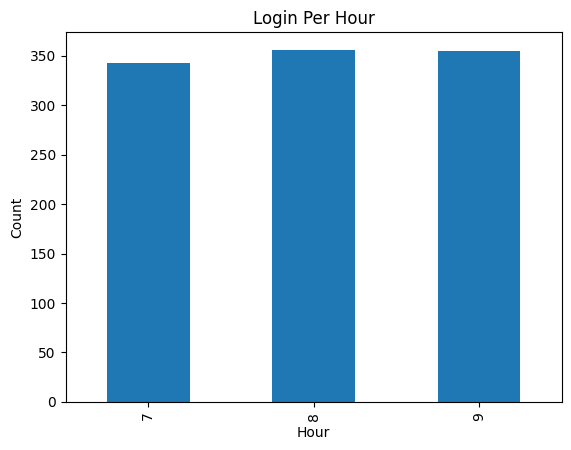

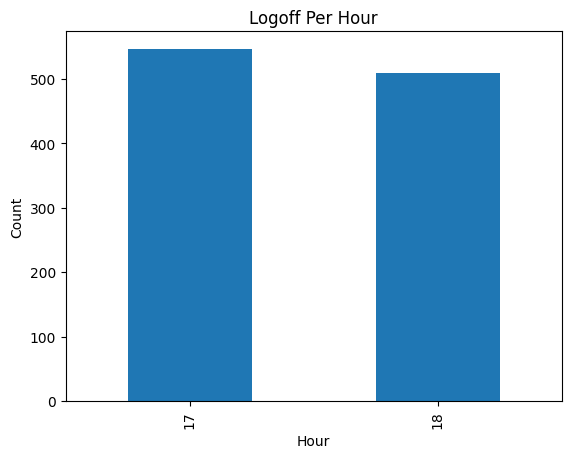

In [107]:
######### ADD YOUR CODE HERE ##########

#filter by january
janLogs = pd.DataFrame(login_data[login_data['datetime'].dt.month == 1])
print(janLogs)
#gets the rows of janLogs based on if the users are in finance
janLogsUsers = pd.DataFrame(janLogs[janLogs['user'].isin(user_set['Finance'])])

#creates a column that shows the hour per row
janLogsUsers['hour'] = janLogsUsers['datetime'].dt.hour

#turns the hour column into the index
janLogsUsers = janLogsUsers.set_index('hour')

#split the dataframes by login and logoff
loginData = janLogsUsers[janLogsUsers['action'] == 'login']
logoffData = janLogsUsers[janLogsUsers['action'] == 'logoff']

print(loginData.index.value_counts())

#function to calculate the occurrences of login per index (hour) and plots it as a bar chart
loginData.index.value_counts().sort_index().plot(kind='bar')
plt.title('Login Per Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()
#function to calculate the occurrences of logoff per index (hour) and plots it as a bar chart
logoffData.index.value_counts().sort_index().plot(kind='bar')
plt.title('Logoff Per Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

### Question 2: Plot a multi-line chart that shows the logon and logoff times during the month of January for the user of pc42.

*Hint: Filter the data as you need, and make two calls to plt.plot().*

#### (1 mark)



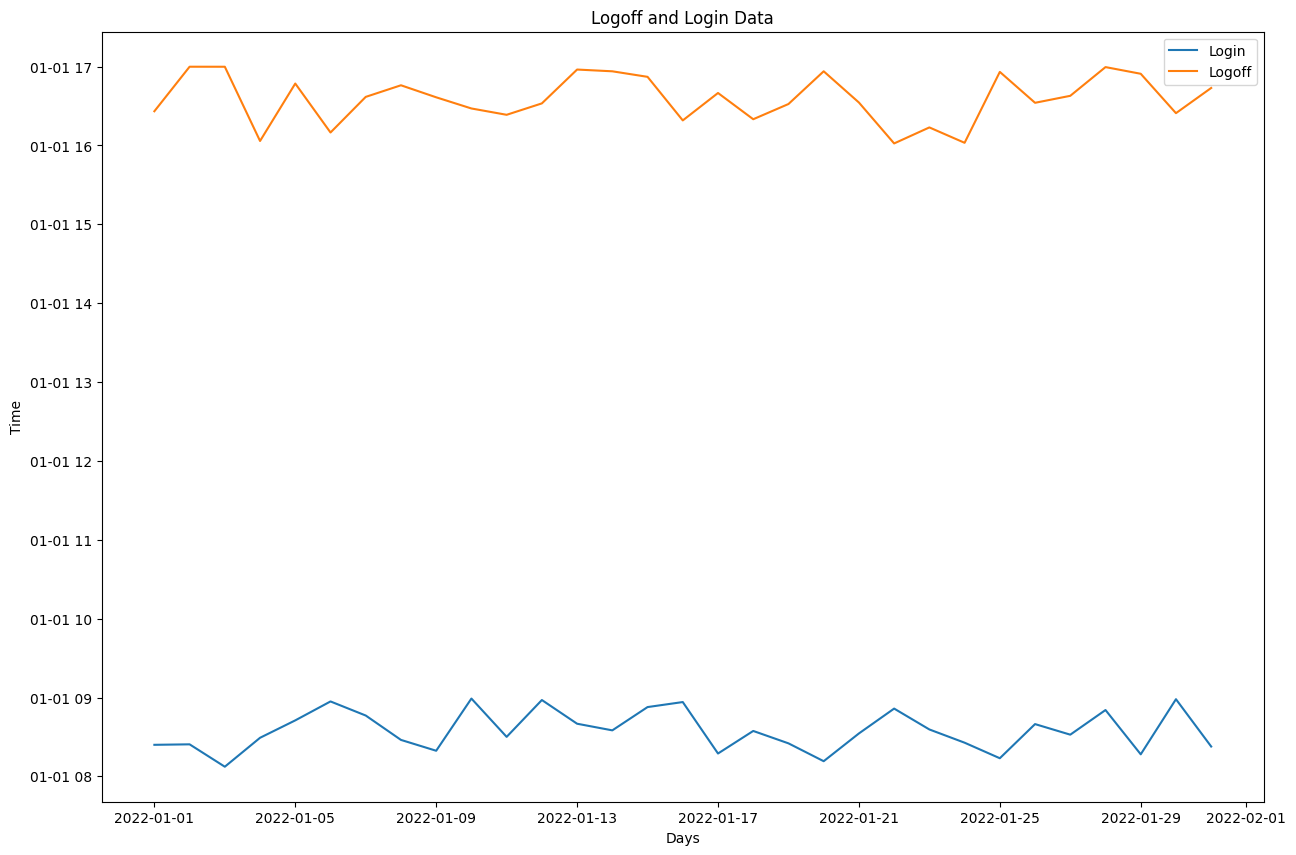

In [108]:
######### ADD YOUR CODE HERE ##########
import matplotlib.dates as mdates



#gets the rows of pc42 then gets the first instance of user
userOfPc = janLogs.loc[janLogs['pc'] == 'pc42', 'user'].iloc[0]

#converts the datatime column into correct format
janLogs['datetime'] = pd.to_datetime(janLogs['datetime'])

#creates a cloumn for  day and time
janLogs['day'] = janLogs['datetime'].dt.date
janLogs['time'] = janLogs['datetime'].dt.time

#gets only the corresponding user
pcJanLogs = pd.DataFrame(janLogs[janLogs['user'] == userOfPc])


#split the dataframes by login
pcJanLogs['time'] = pd.to_datetime(pcJanLogs['time'], format='%H:%M:%S')

loginDataPC = pcJanLogs[pcJanLogs['action'] == 'login']
x = mdates.date2num(loginDataPC['time'])

logoffDataPC = pcJanLogs[pcJanLogs['action'] == 'logoff']
y = mdates.date2num(logoffDataPC['time'])


plt.figure(figsize=(15,10))
plt.title("Logoff and Login Data")
plt.xlabel("Days")
plt.ylabel("Time")

plt.plot(loginDataPC['day'], loginDataPC['time'],label='Login')
plt.plot(logoffDataPC['day'], logoffDataPC['time'],label='Logoff')


#legend outputted once all protocols are plotted
plt.legend(loc='best') 


### Question 3: Use a node-link graph to show all emails sent by Security staff on January 5th 2022. Your node link graph may show only those users who receive emails from the select senders.

*Hint: Filter the data and then refer back to Question 4 from Part 1 to format the data correctly*

#### (1 mark)

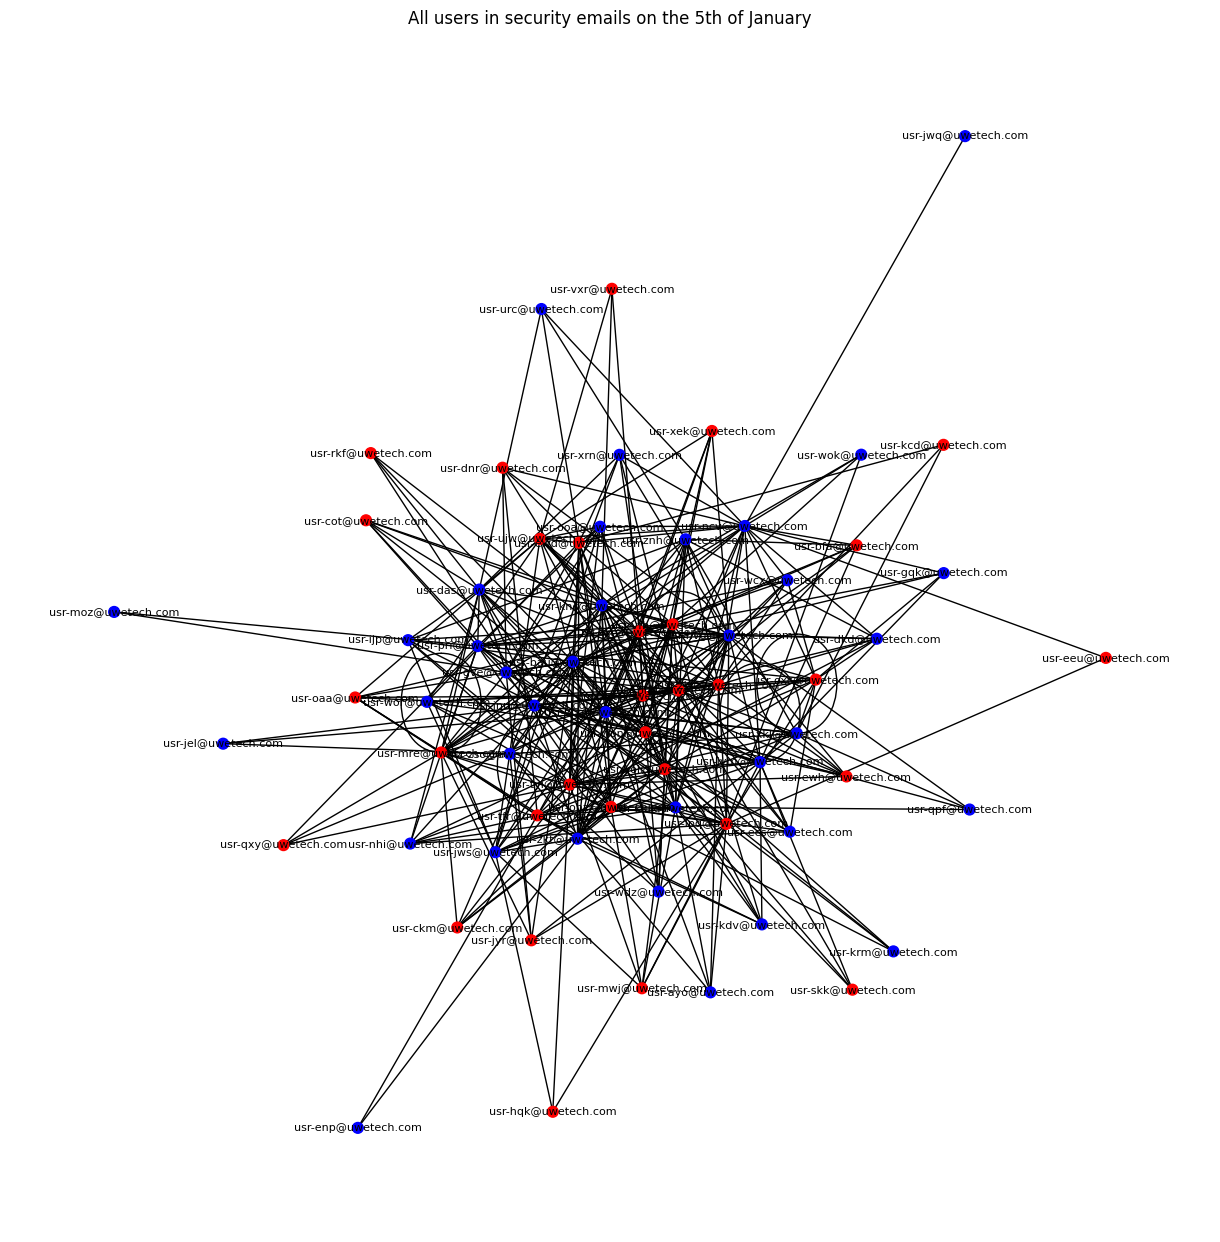

In [109]:
######### ADD YOUR CODE HERE ##########
import networkx as nx 

#filter by january the 5th 2022
janFiveLogs = pd.DataFrame(email_data[(email_data['datetime'].dt.month == 1) & (email_data['datetime'].dt.day == 5) & (email_data['datetime'].dt.year == 2022)])

#gets the rows of janFiveLogs based on if the users are in security
janFiveSecurity = pd.DataFrame(employee_data[employee_data['user'].isin(user_set['Security'])])

#gets only the corresponding users based on sender
emailSecurity = pd.DataFrame(janFiveLogs[janFiveLogs['sender'].isin(janFiveSecurity['email'])])

#arrays and comments not changed 
#creates the graph
G = nx.Graph()
data1 = nx.node_link_data(G)

sArray = [] #source
dArray = [] #destination

#turn the dataframe values into an array
for i in emailSecurity['sender']:
    sArray.append(i)
for j in emailSecurity['recipient']:
    dArray.append(j)


graphArray = [] 
#get the source and destination arrays and add them to the graph array
for i in range(len(sArray)):
    n = sArray[i],dArray[i]
    graphArray.append(n)

#changes the node colur to red if its a sender and blue for recipient
nodeColours = ['red' if node in set(emailSecurity['sender']) else 'blue' for node in set(emailSecurity['recipient'])]

#add the graph edges
G.add_edges_from(*[graphArray])


#makes the plot bigger
plt.figure(figsize=(12,12)) 
#display the graph
nx.draw(G,with_labels=True,node_size= 60,font_size=8, node_color=nodeColours)
plt.title('All users in security emails on the 5th of January')
plt.show()


### (Advanced) Question 4: Extend the above, now showing a node for every possible user. The edge connections should be as above, for emails sent by Security staff on 5th January 2022. You should use a shell layout for your network plot.

*Hint: Think about how to include all users as nodes. You may even include a dummy node and remove this in your processing depending on how you form your edgelist - https://networkx.org/documentation/stable/index.html*

#### (3 marks)

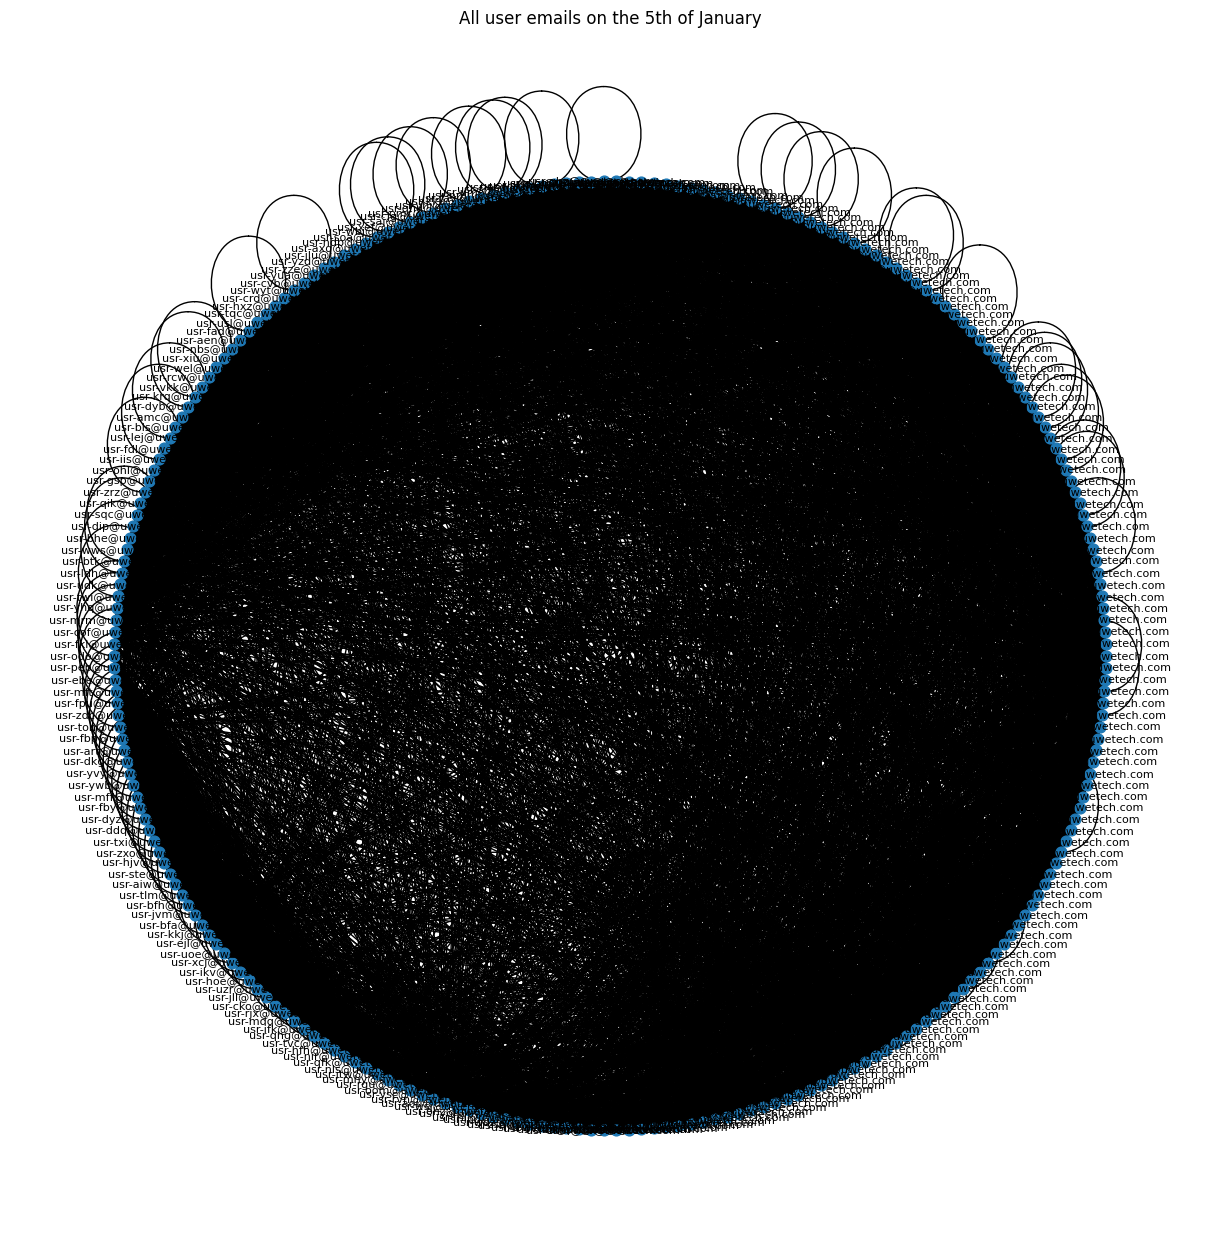

In [110]:
######### ADD YOUR CODE HERE ##########
import networkx as nx 

#filter by january the 5th 2022
janFiveLogs = pd.DataFrame(email_data[(email_data['datetime'].dt.month == 1) & (email_data['datetime'].dt.day == 5) & (email_data['datetime'].dt.year == 2022)])

#gets the rows of janFiveLogs based on if the users are in security
janFiveSecurity = pd.DataFrame(employee_data)

#gets only the corresponding users based on sender
emailSecurity = pd.DataFrame(janFiveLogs[janFiveLogs['sender'].isin(janFiveSecurity['email'])])

#arrays and comments not changed 
#creates the graph
G = nx.Graph()
data1 = nx.node_link_data(G)

sArray = [] #source
dArray = [] #destination

#turn the dataframe values into an array
for i in emailSecurity['sender']:
    sArray.append(i)
for j in emailSecurity['recipient']:
    dArray.append(j)


graphArray = [] 
#get the source and destination arrays and add them to the graph array
for i in range(len(sArray)):
    n = sArray[i],dArray[i]
    graphArray.append(n)

#add the graph edges
G.add_edges_from(*[graphArray])

#makes the plot bigger
plt.figure(figsize=(12,12)) 
#makes the shell layout
pos = nx.shell_layout(G)
#display the graph
nx.draw(G,pos,with_labels=True,node_size= 60,font_size=8,)
plt.title('All user emails on the 5th of January')
plt.show()



### Question 5: Show a comparison between the files accessed by HR staff, Services staff, and Security staff, during January. You will need to think of a suitable way to convey this information within a single plot so that comparison of activity can be made easily.

*Hint: Think which plot enables you to make comparisons between two attributes, and then think what the attributes would need to be for mapping three job roles against the possible set of files accessed.*

#### (4 marks)

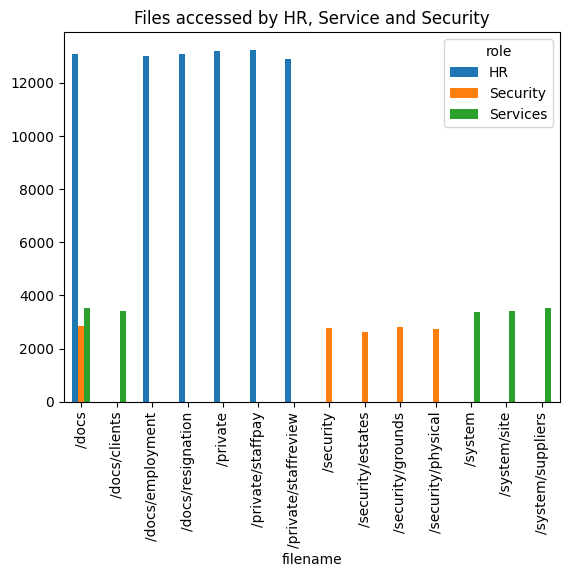

In [111]:
######### ADD YOUR CODE HERE ##########
#filters by jan
janLogsFile =pd.DataFrame(file_data[file_data['datetime'].dt.month == 1])

#filters by role
rolesHRSerSec = ['HR', 'Security', 'Services']
usersThree = pd.DataFrame(employee_data[employee_data['role'].isin(rolesHRSerSec)])

#merge janLogsFile with usersThree based on users and creates 3 new columns
filesAccessed = janLogsFile.merge(usersThree, on='user', how='inner')

#count the occurrences of each role for each filename using value_counts()
filesToPlot = filesAccessed.groupby('filename')['role'].value_counts().unstack(fill_value=0)

#plot the dataframe
filesToPlot.plot(kind='bar', stacked=False)
plt.title(f'Files accessed by HR, Service and Security')
plt.show()

### Question 6: Carry on your own investigation to find the anomalous activity across all data files provided. Provide clear evidence and justification for your investigative steps.

Marks are awarded for: 
- a clear explanation of the steps you take to complete your investigation (5)
- suitable use of data analysis with clear explanation (6)
- suitable use of visualisation methods with clear annotation (6)
- identifying all of the suspicious events (8)

#### (25 marks)

Plan:
- check each csv file for all roles all months --> bar chart 
- get suspicious bar charts and print per month of role
- users data printed out in tables
- check for same number of e.g. logins and logoffs etc.
- make graph for email --> scatter plot or networkx
- find one suspicious user and for each file

## Files accessed by all roles each month 
### Analysis
- First I printed out all the roles and what files they accessed, displayed as a bar chart.
- I displayed it as a bar chart as it would make comparing the files accessed much easier per month as they are side by side
- I found that in month 4 a director user accessed a file that no other director user accessed
- Then I checked which user/users accessed what file. Only one user called usr-xef accessed the /docs/clients file 
- This is a suspicios event as no other director has ever accessed those files 

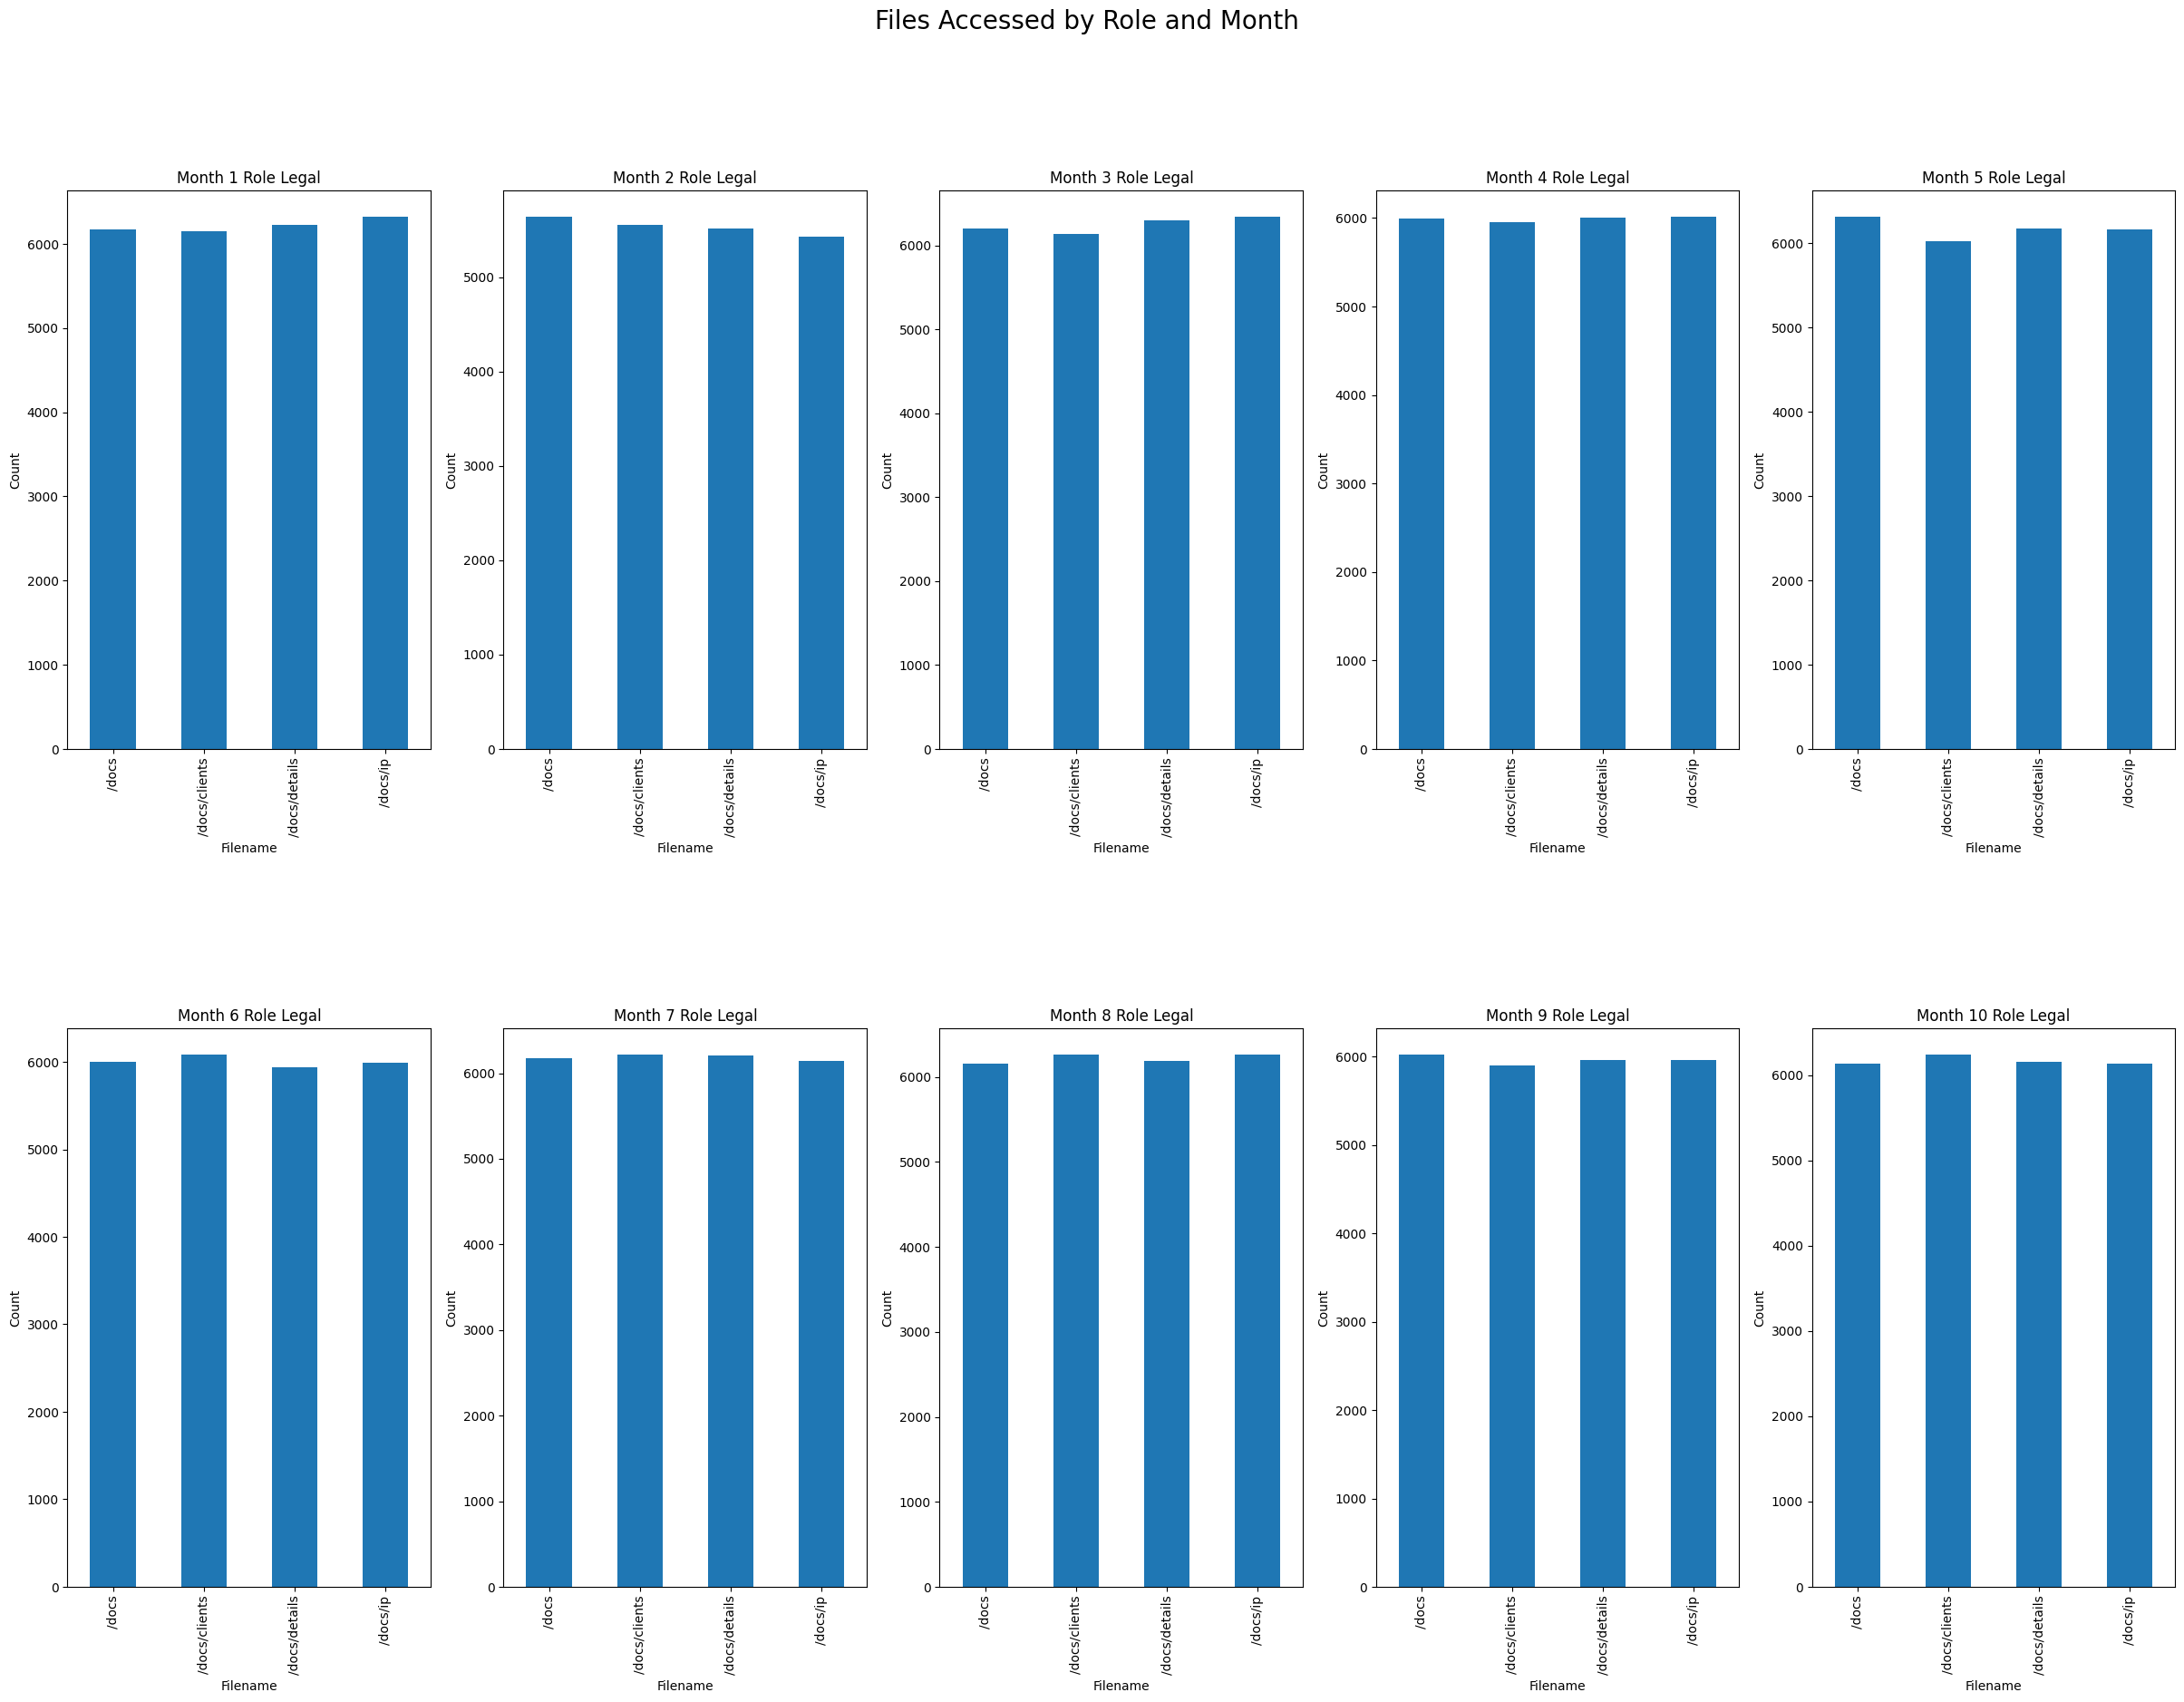

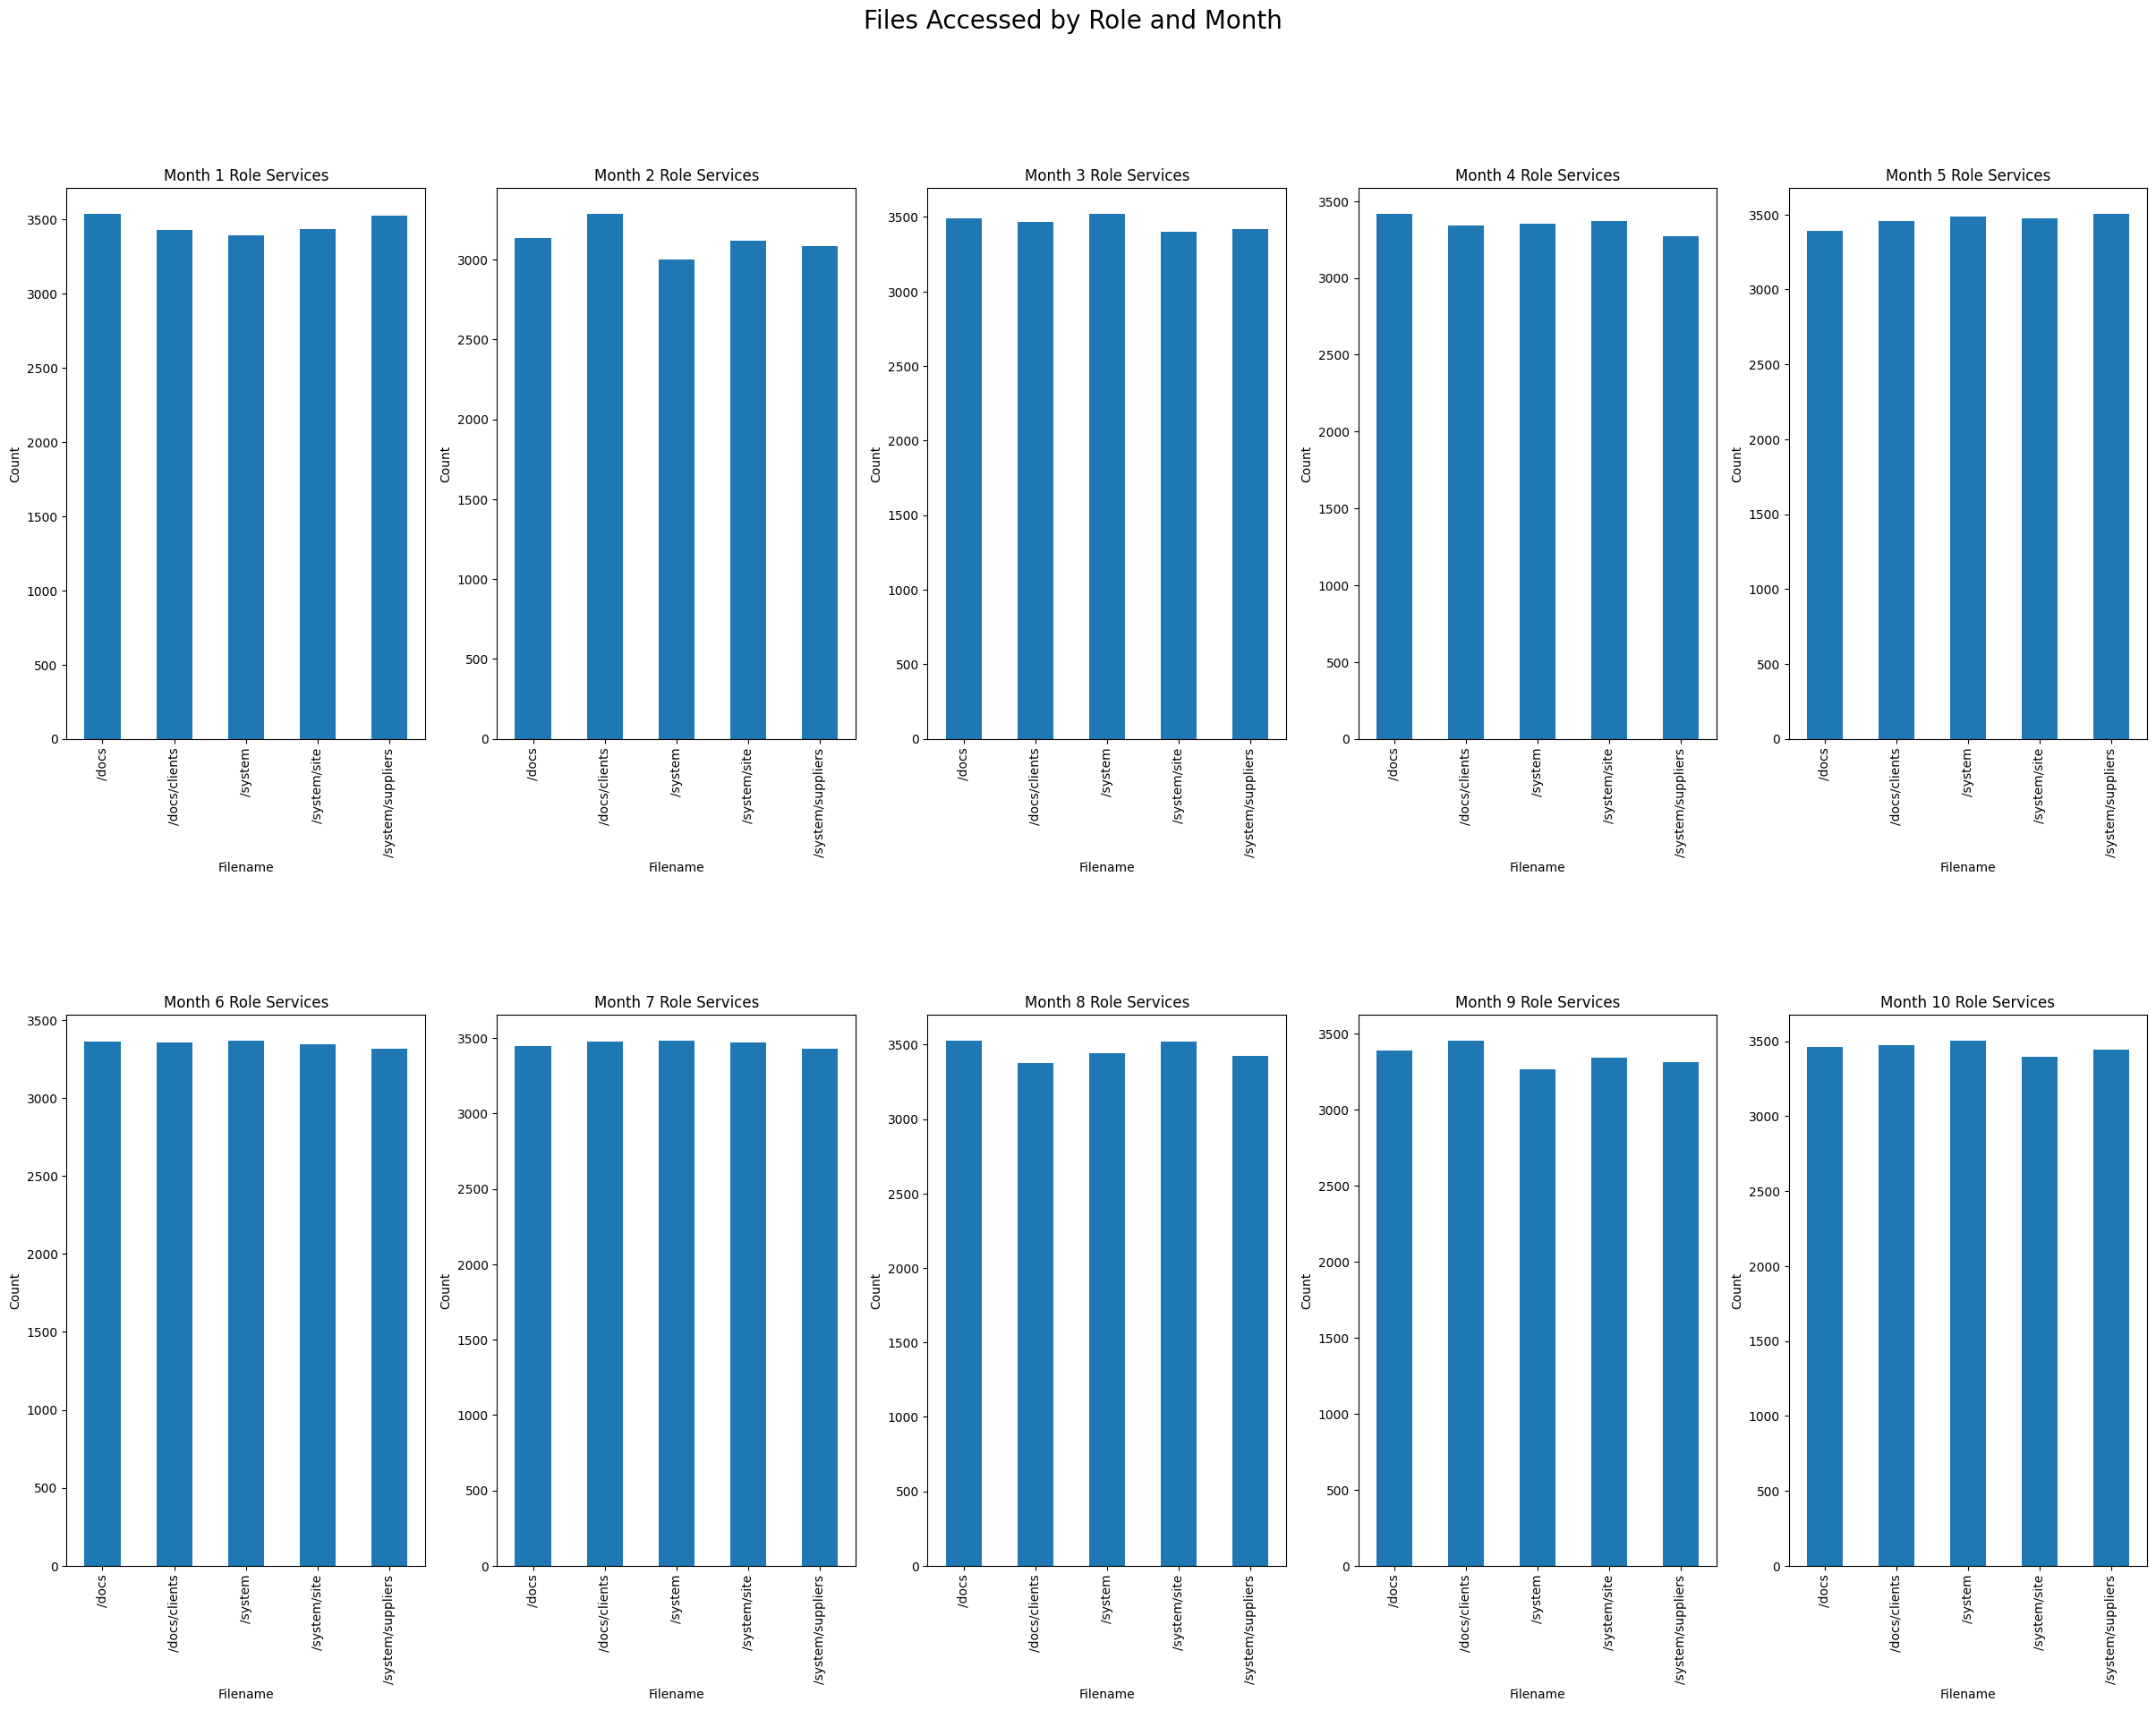

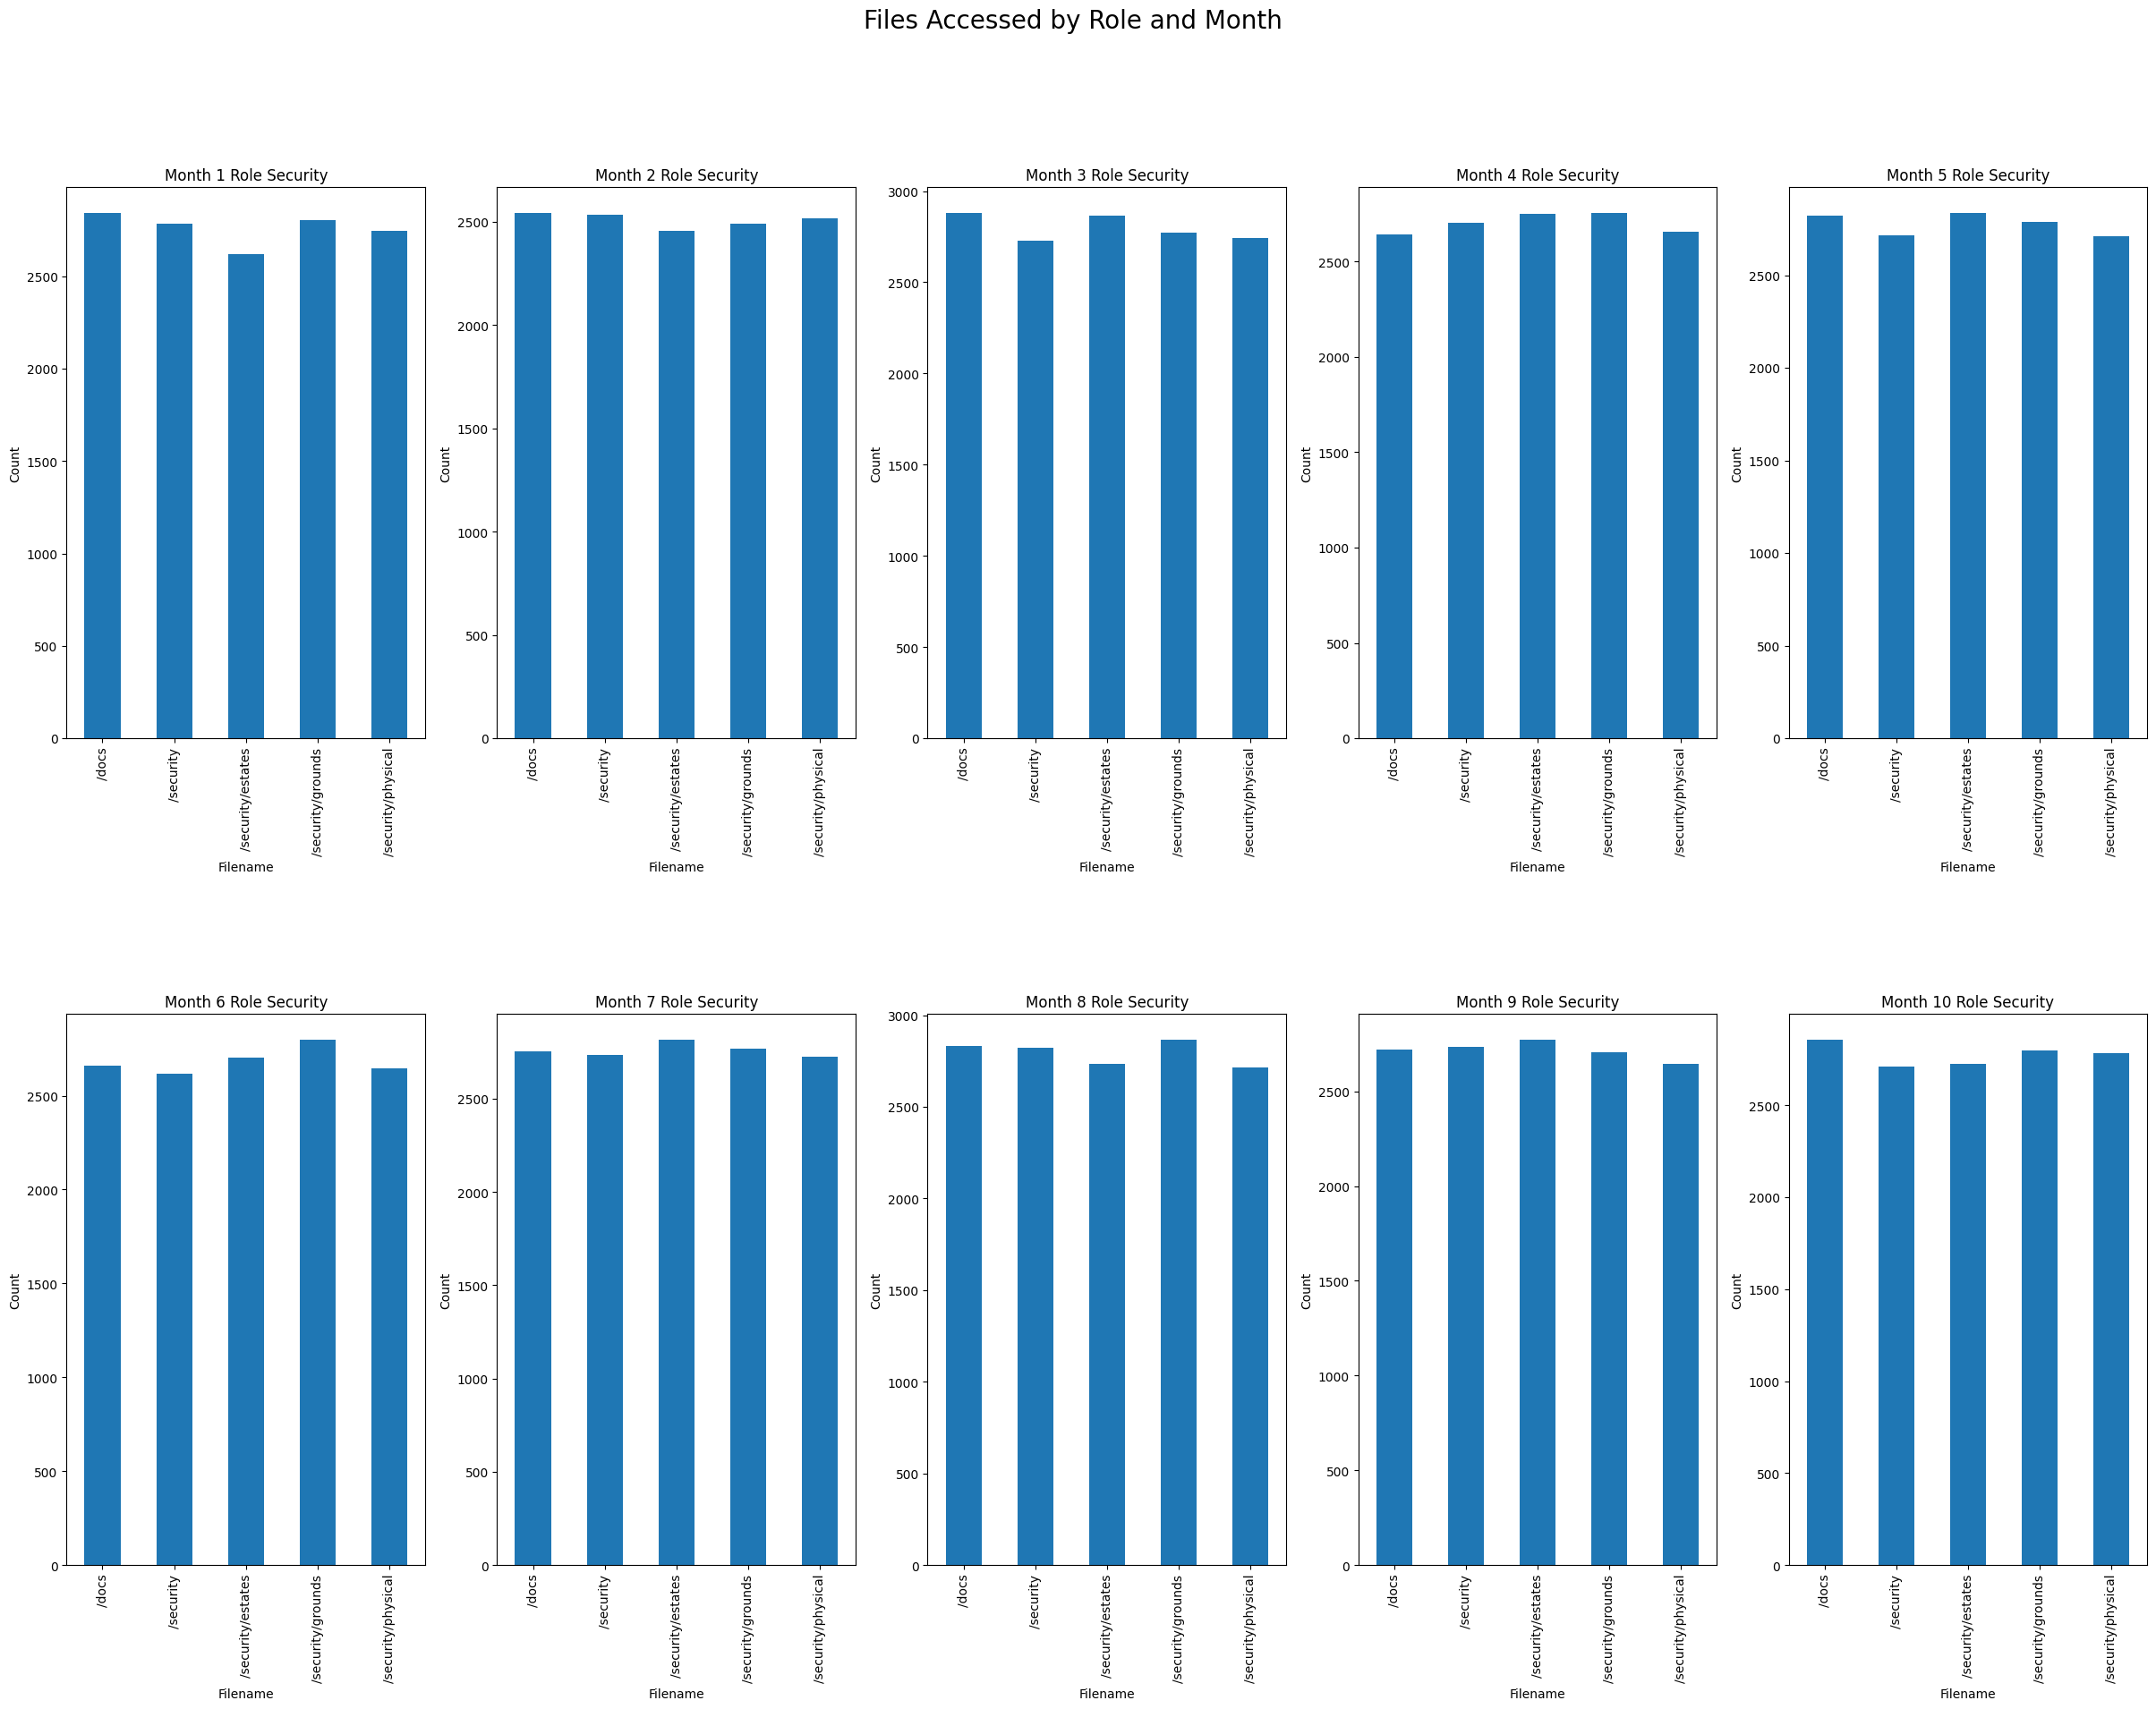

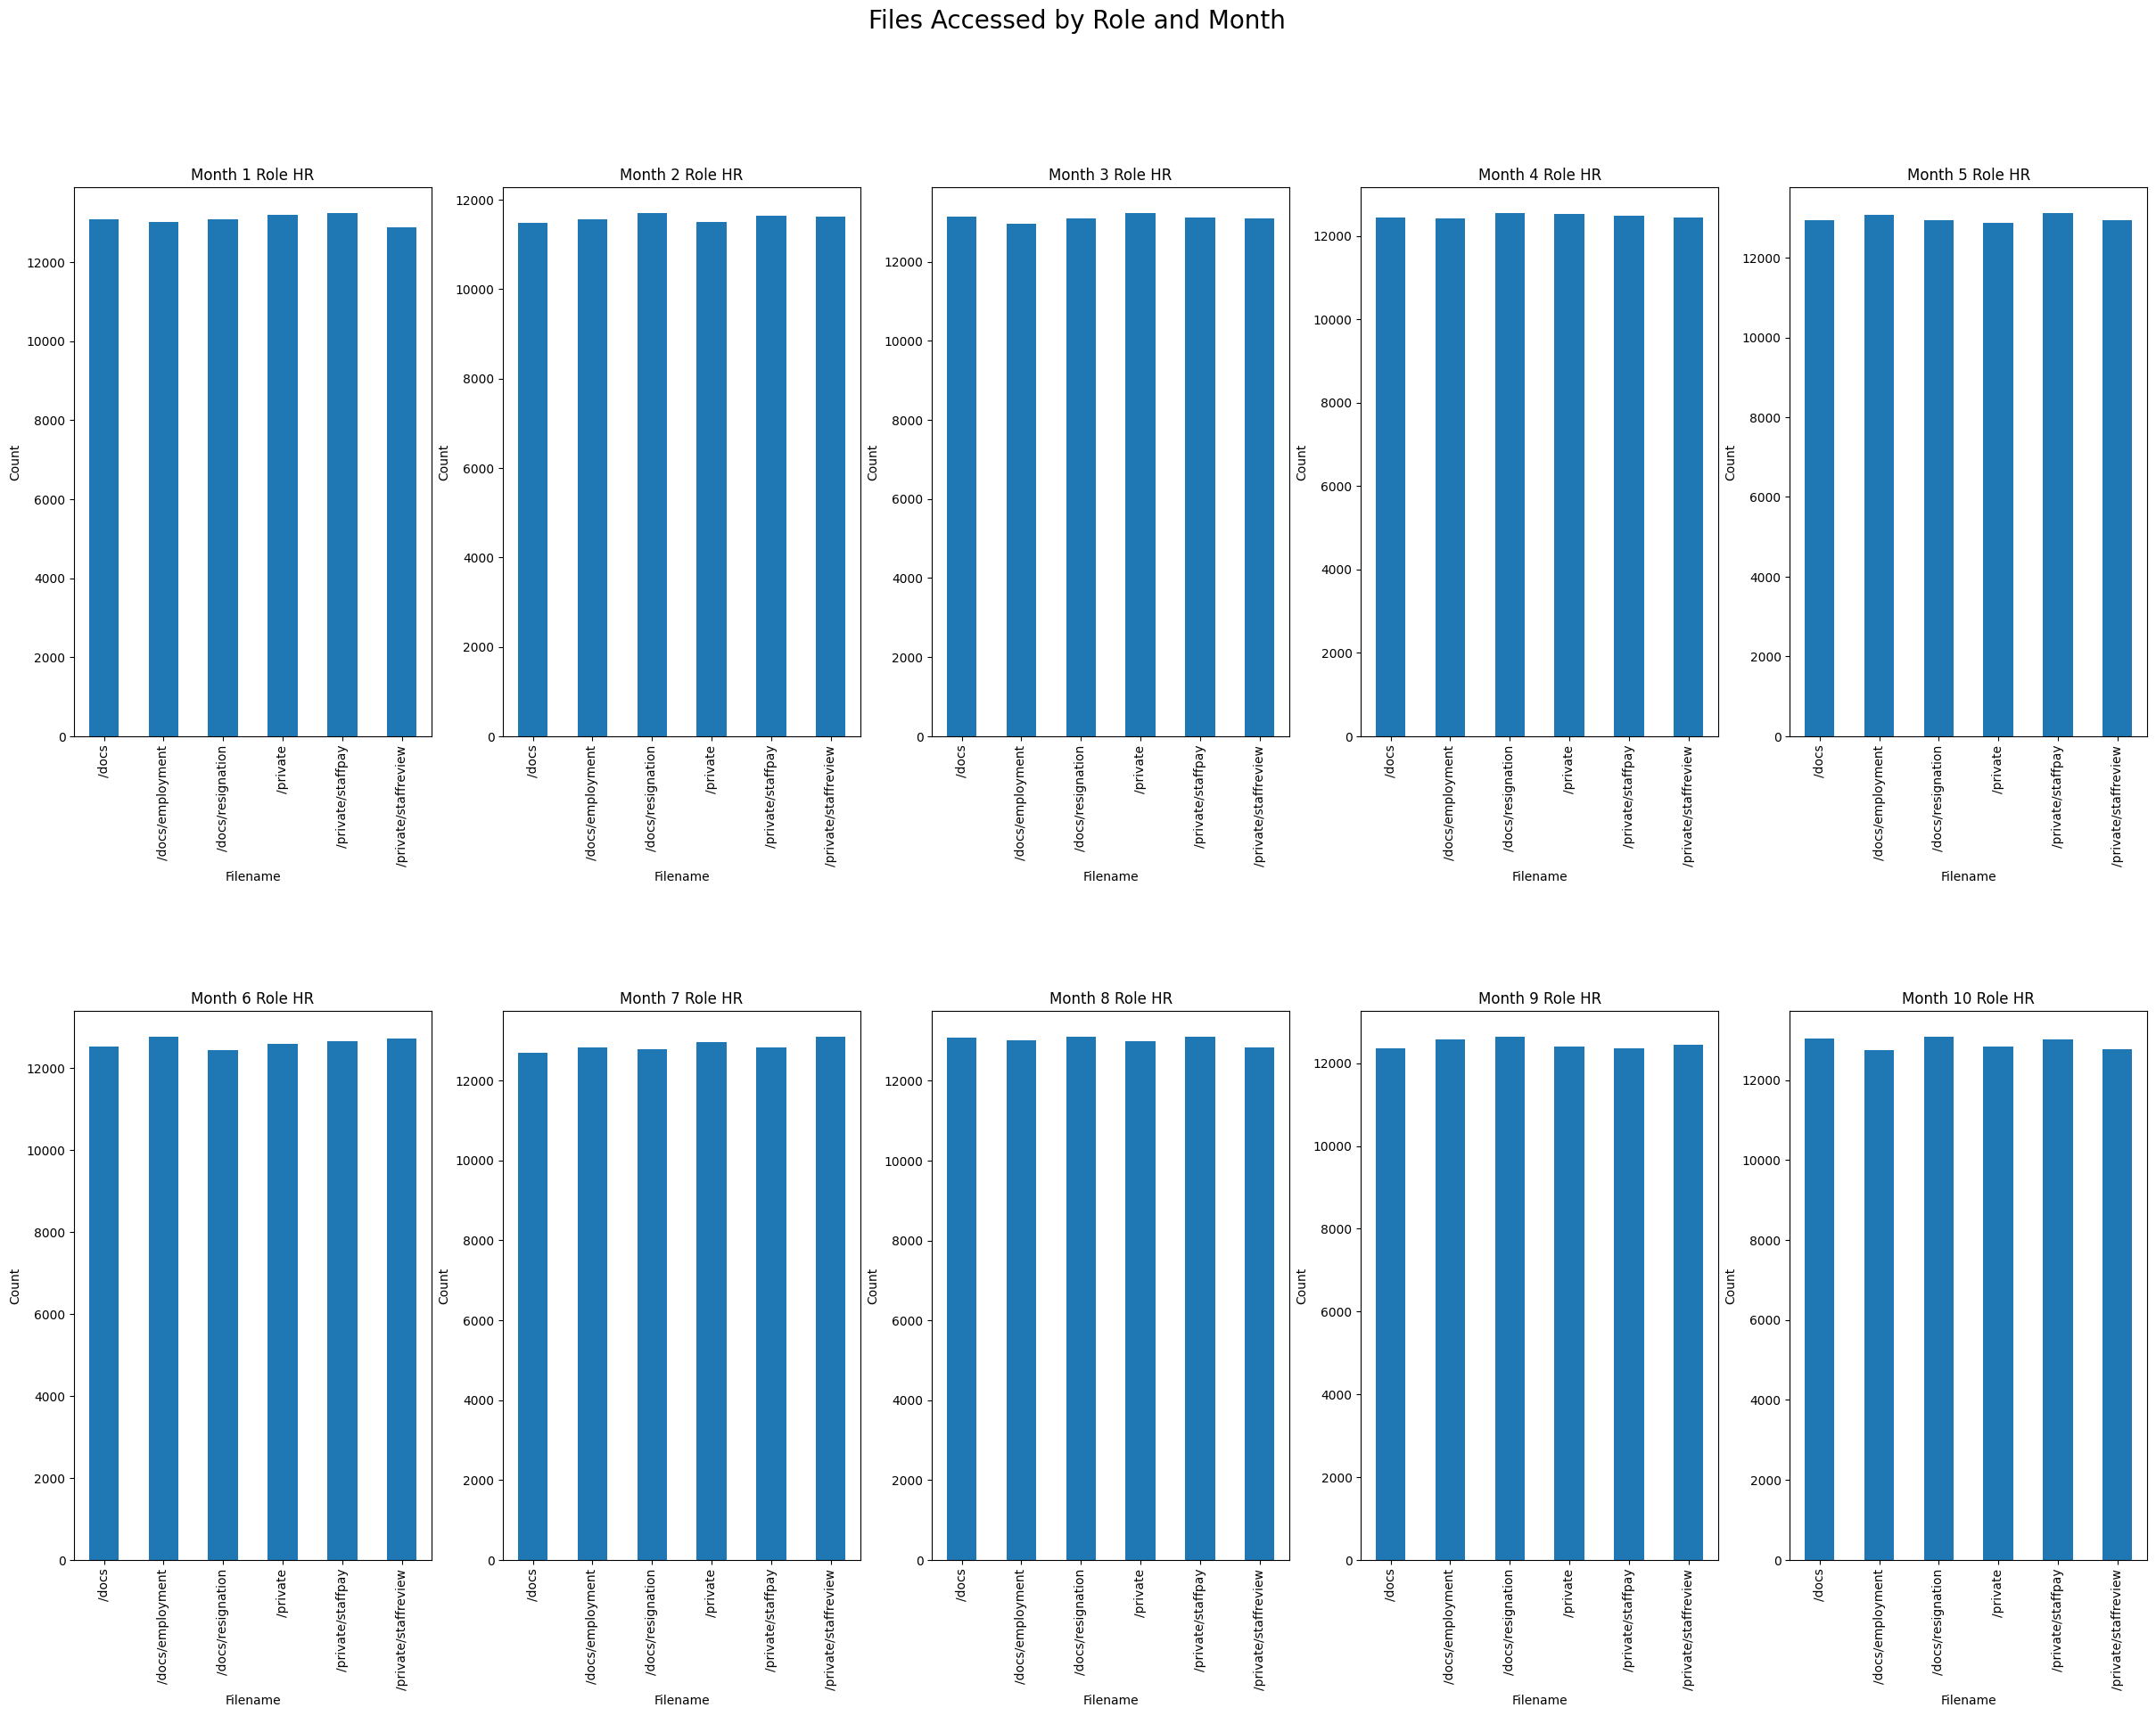

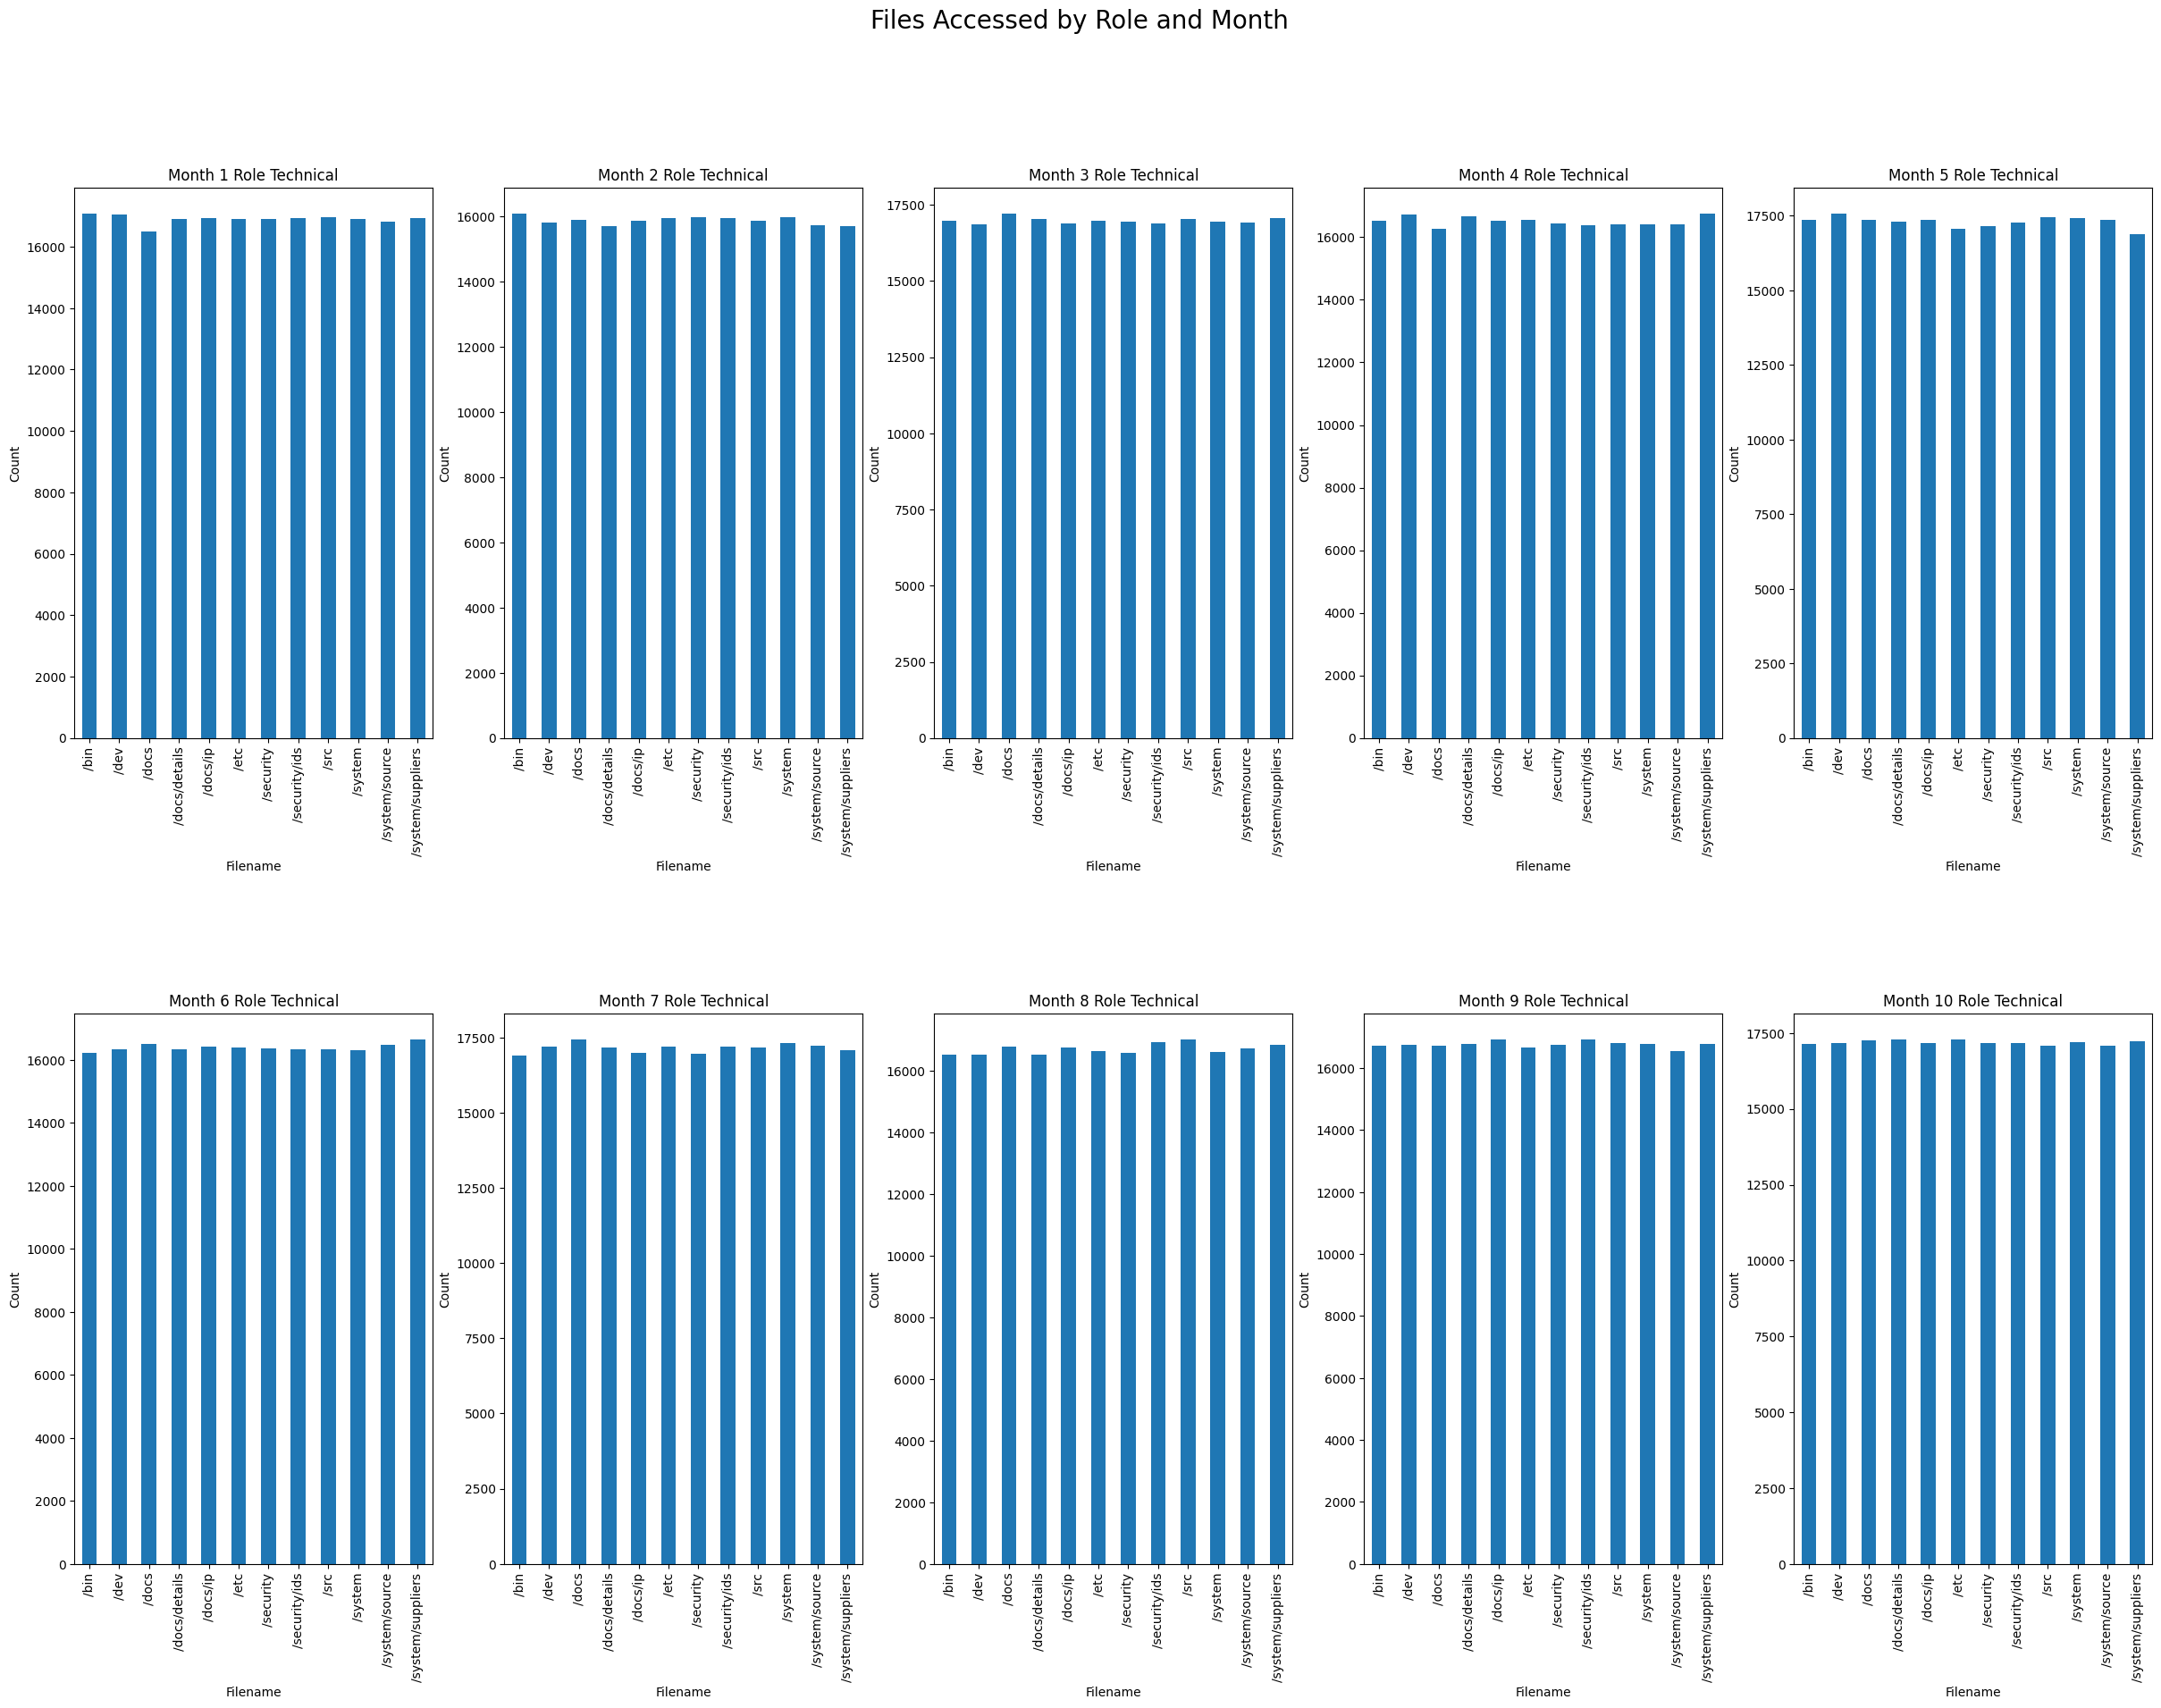

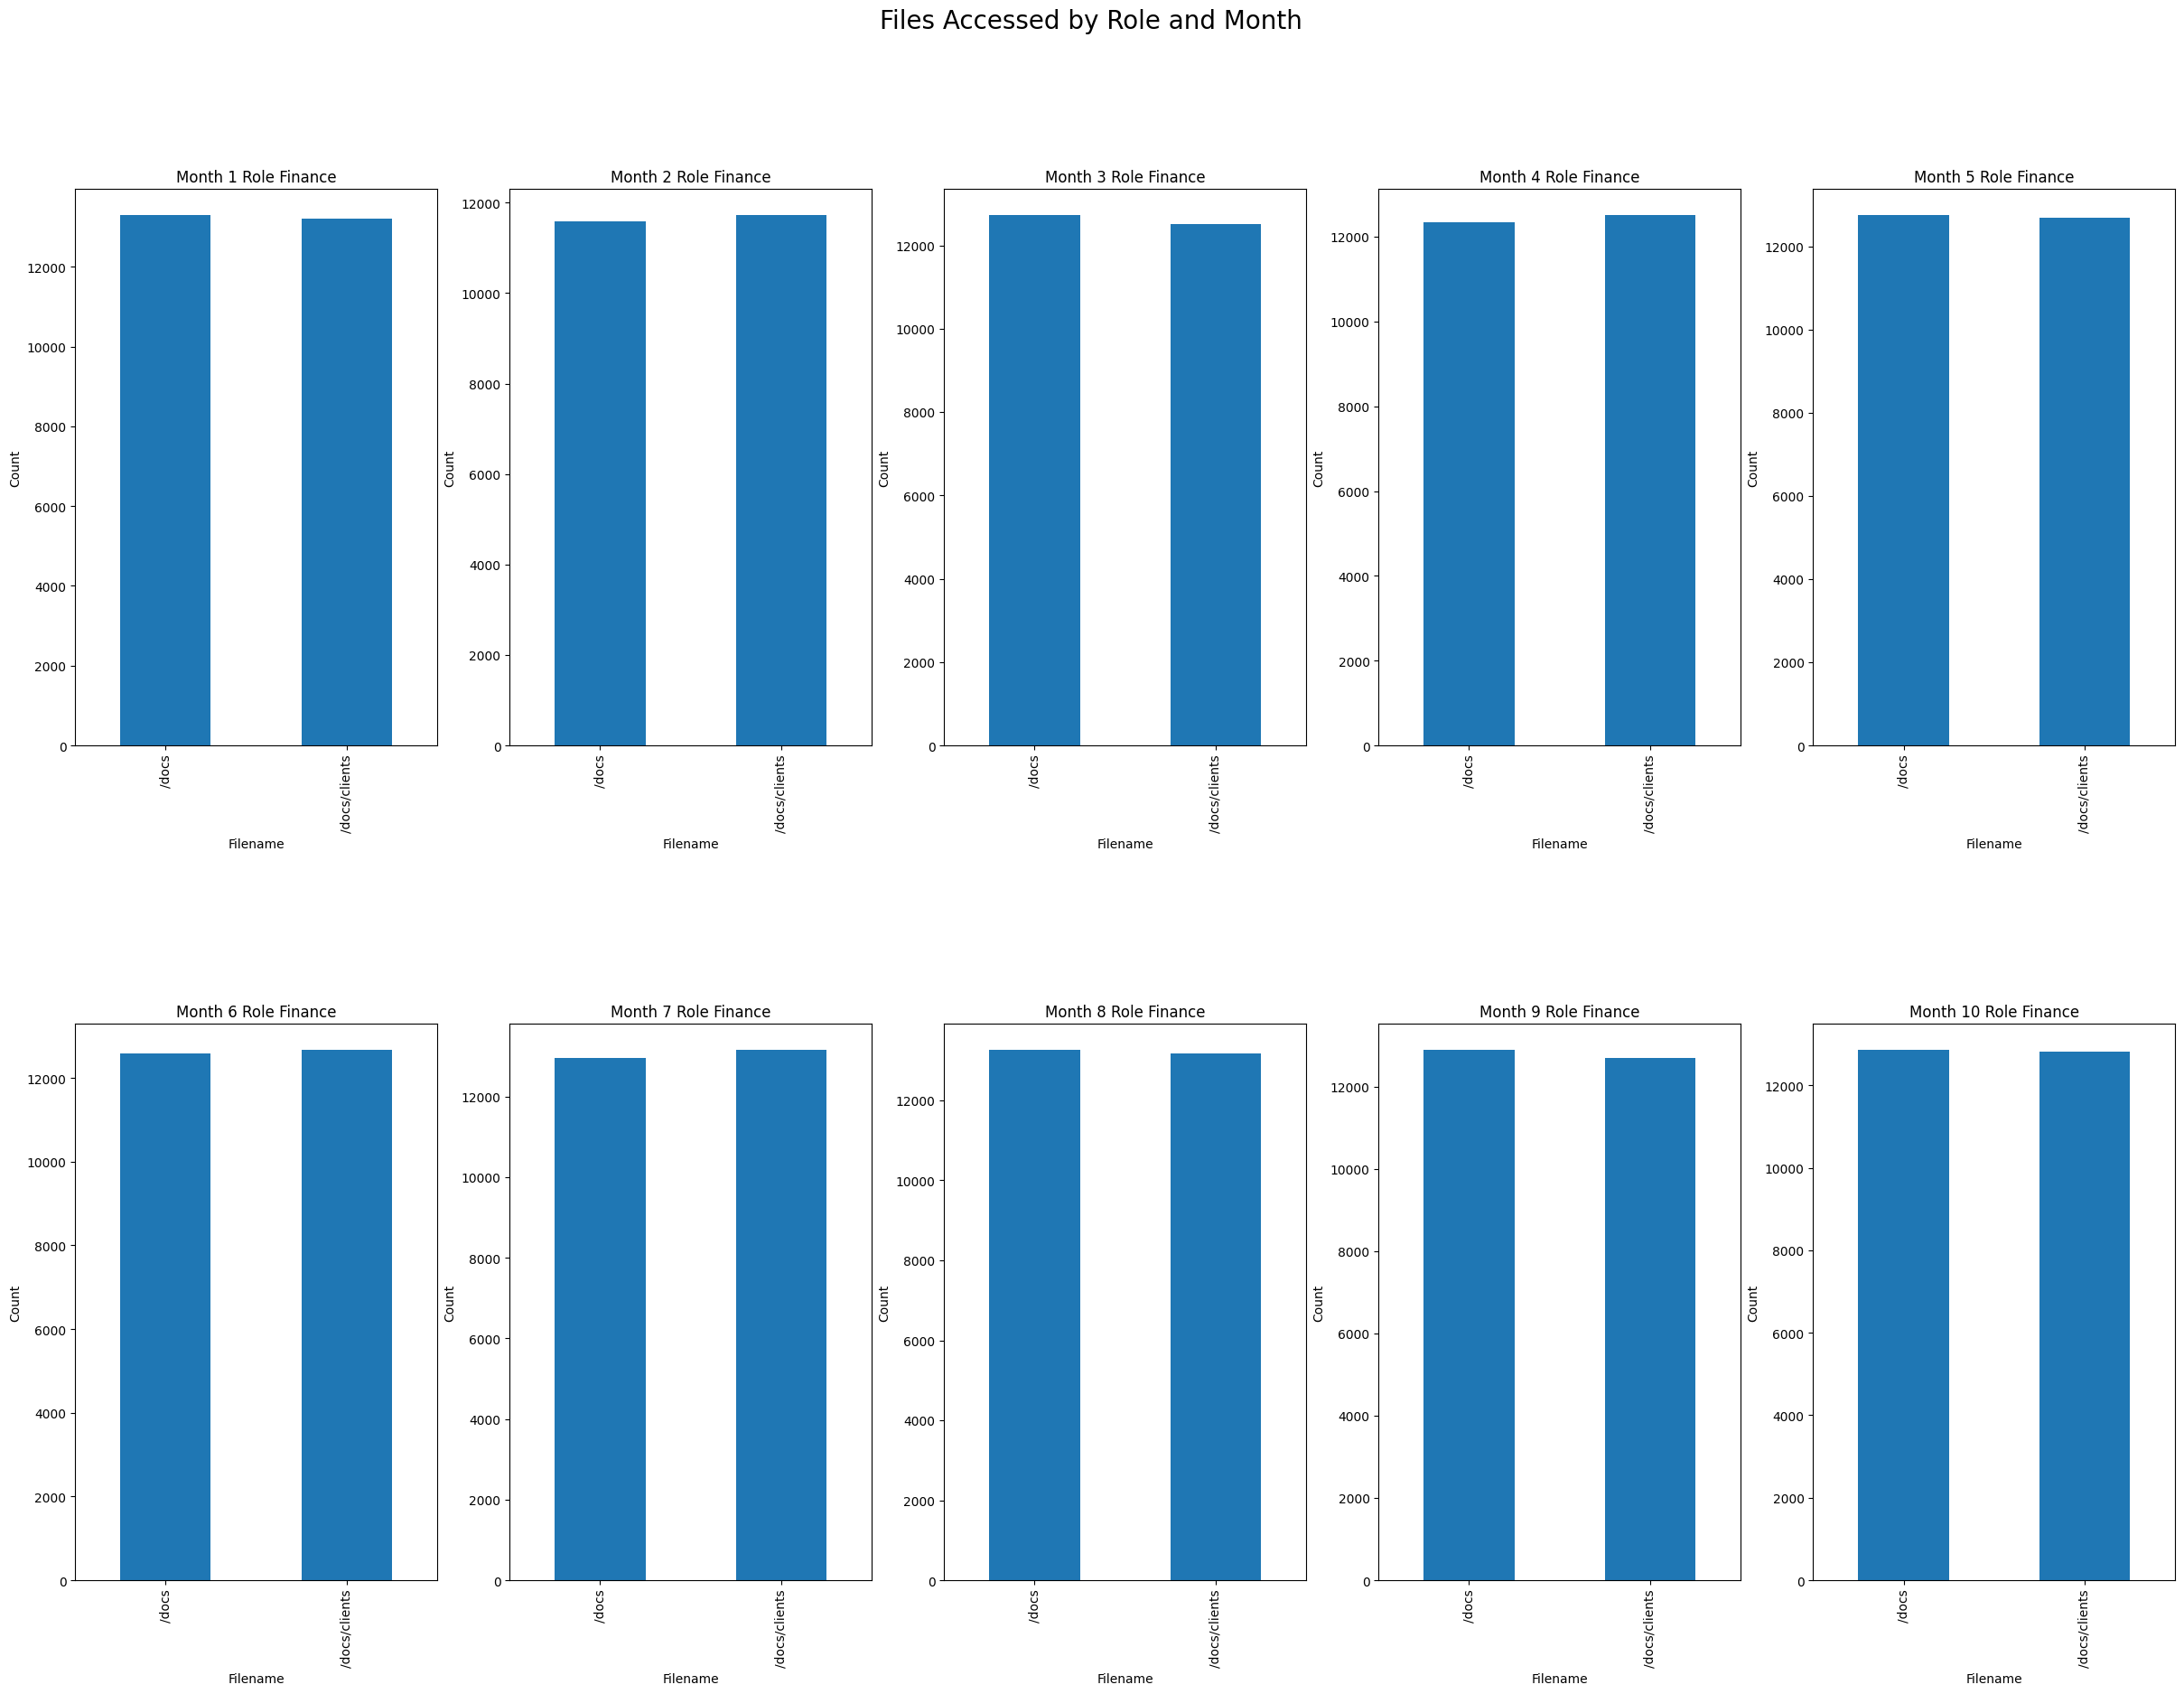

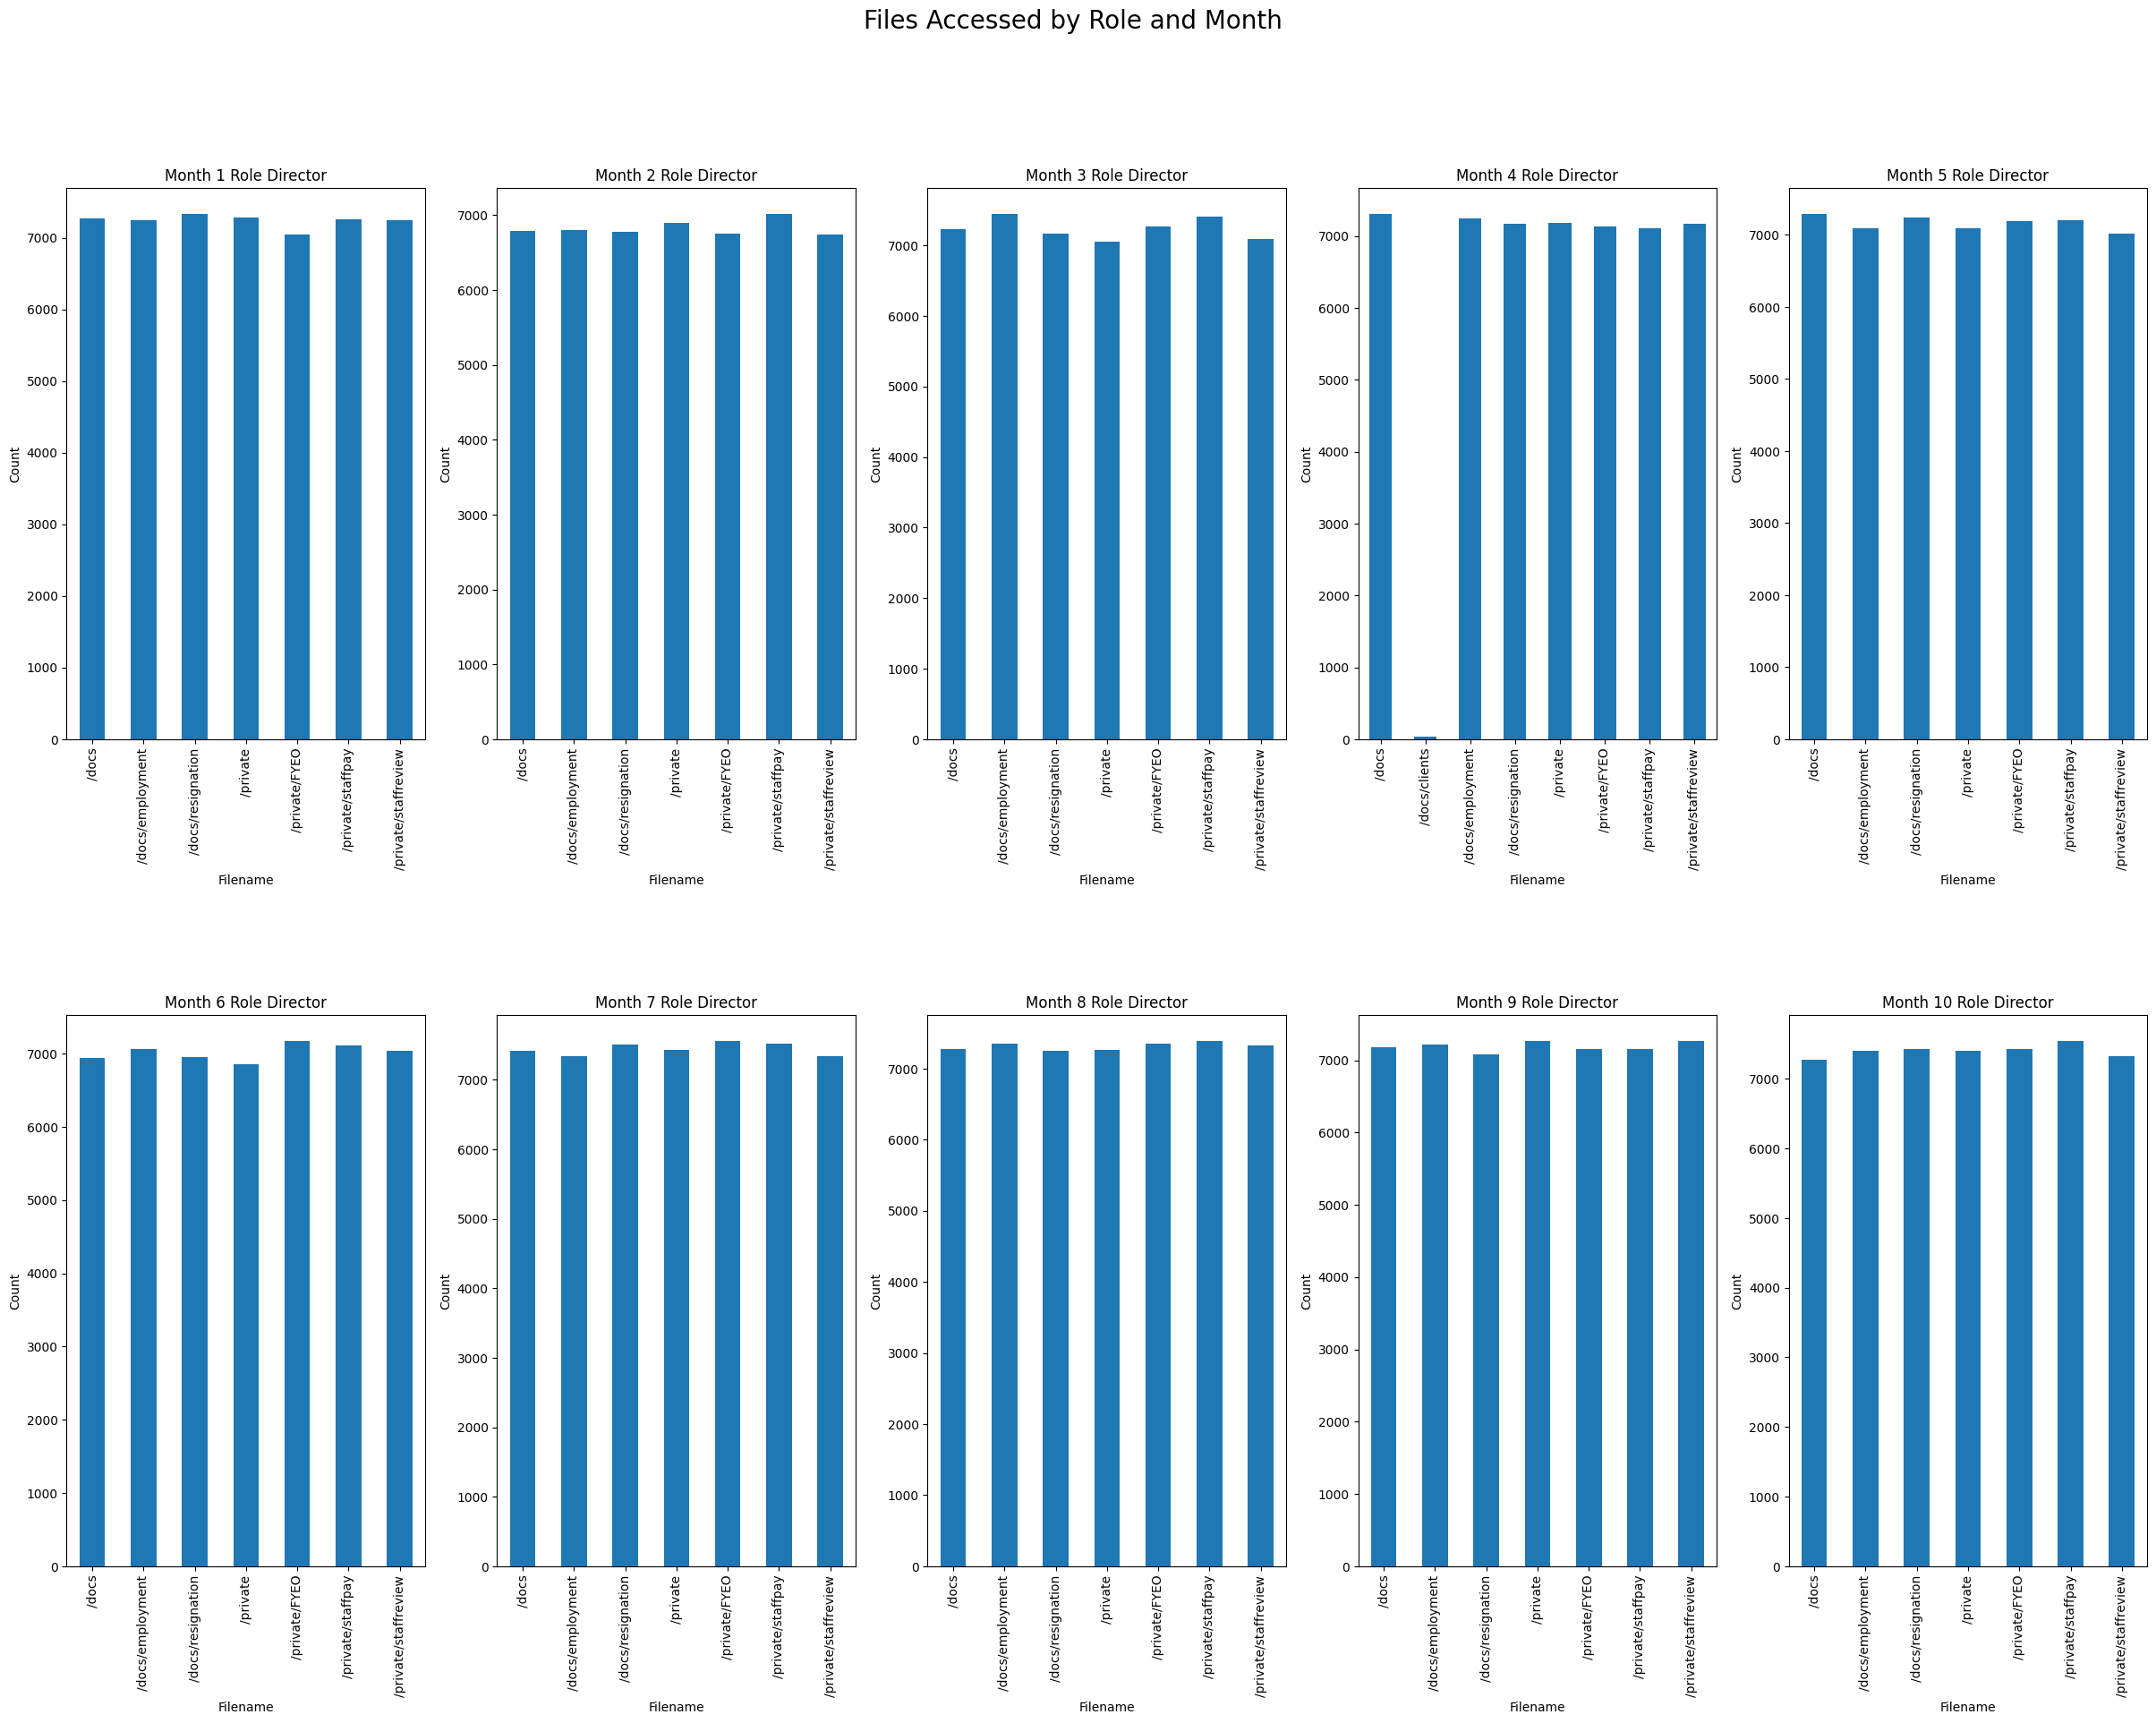

In [112]:
#loop all roles
for role in all_roles:
    #sets the plots
    plt.figure(figsize=(30, 20))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle('Files Accessed by Role and Month', fontsize=20)
    #filter by month
    for month in range(1,11):
        #creates the subplots
        axs = plt.subplot(2, 5, month)
        #gets the data for each month
        eachMonthFiles =pd.DataFrame(file_data[file_data['datetime'].dt.month == month])
        #gets the data for each role
        allUsersFiles = pd.DataFrame(employee_data[employee_data['user'].isin(user_set[role])])
        #merge eachMonthFiles with allUsersFiles based on users and creates 3 new columns
        eachMonthFilesAccess = eachMonthFiles.merge(allUsersFiles, on='user', how='inner')
        #count the occurrences of each role for each filename using value_counts()
        eachMonthFilesPlot = eachMonthFilesAccess.groupby('filename')['role'].value_counts().unstack(fill_value=0)
        #plots the data
        eachMonthFilesPlot.plot(kind='bar', stacked=False, ax=axs)
        #formats the plots
        axs.set_title(f'Month {month} Role {role}')
        axs.set_xlabel('Filename') 
        axs.set_ylabel('Count')
        axs.get_legend().remove()

        #get month 4 and director
        if role == 'Director' and month == 4:
            directorFiles = eachMonthFilesAccess
    
plt.show()
#this graph shows that director role in month 4 access a client file


In [113]:
#shows month 4 director
print("Month 4 Director role analysis:")
print(directorFiles[(directorFiles['filename']=='/docs/clients')])
#the user is usr-xef
      

Month 4 Director role analysis:
                        datetime     user       filename      role  \
47207 2022-04-10 07:38:54.061238  usr-xef  /docs/clients  Director   
47209 2022-04-10 08:13:34.901253  usr-xef  /docs/clients  Director   
47214 2022-04-10 08:47:01.409540  usr-xef  /docs/clients  Director   
47216 2022-04-10 09:03:52.531836  usr-xef  /docs/clients  Director   
47220 2022-04-10 09:19:39.037719  usr-xef  /docs/clients  Director   
47221 2022-04-10 09:21:10.633463  usr-xef  /docs/clients  Director   
47222 2022-04-10 09:29:42.814930  usr-xef  /docs/clients  Director   
47224 2022-04-10 09:40:29.554322  usr-xef  /docs/clients  Director   
47227 2022-04-10 10:28:56.414358  usr-xef  /docs/clients  Director   
47236 2022-04-10 11:25:12.759699  usr-xef  /docs/clients  Director   
47244 2022-04-10 12:23:23.290919  usr-xef  /docs/clients  Director   
47247 2022-04-10 12:38:14.358561  usr-xef  /docs/clients  Director   
47254 2022-04-10 13:47:18.064450  usr-xef  /docs/clients  

## Web data accessed by all roles each month 
### Analysis
- Next I checked the web data accessed by all users and again found that in month 4 a user accessed websites that no other director accessed.
- Again, a bar chart was used as it made for easier comparisons
- Then I checked the websites - lawyers4u and linkedin and found that the only user accessing those websites was usr-xef

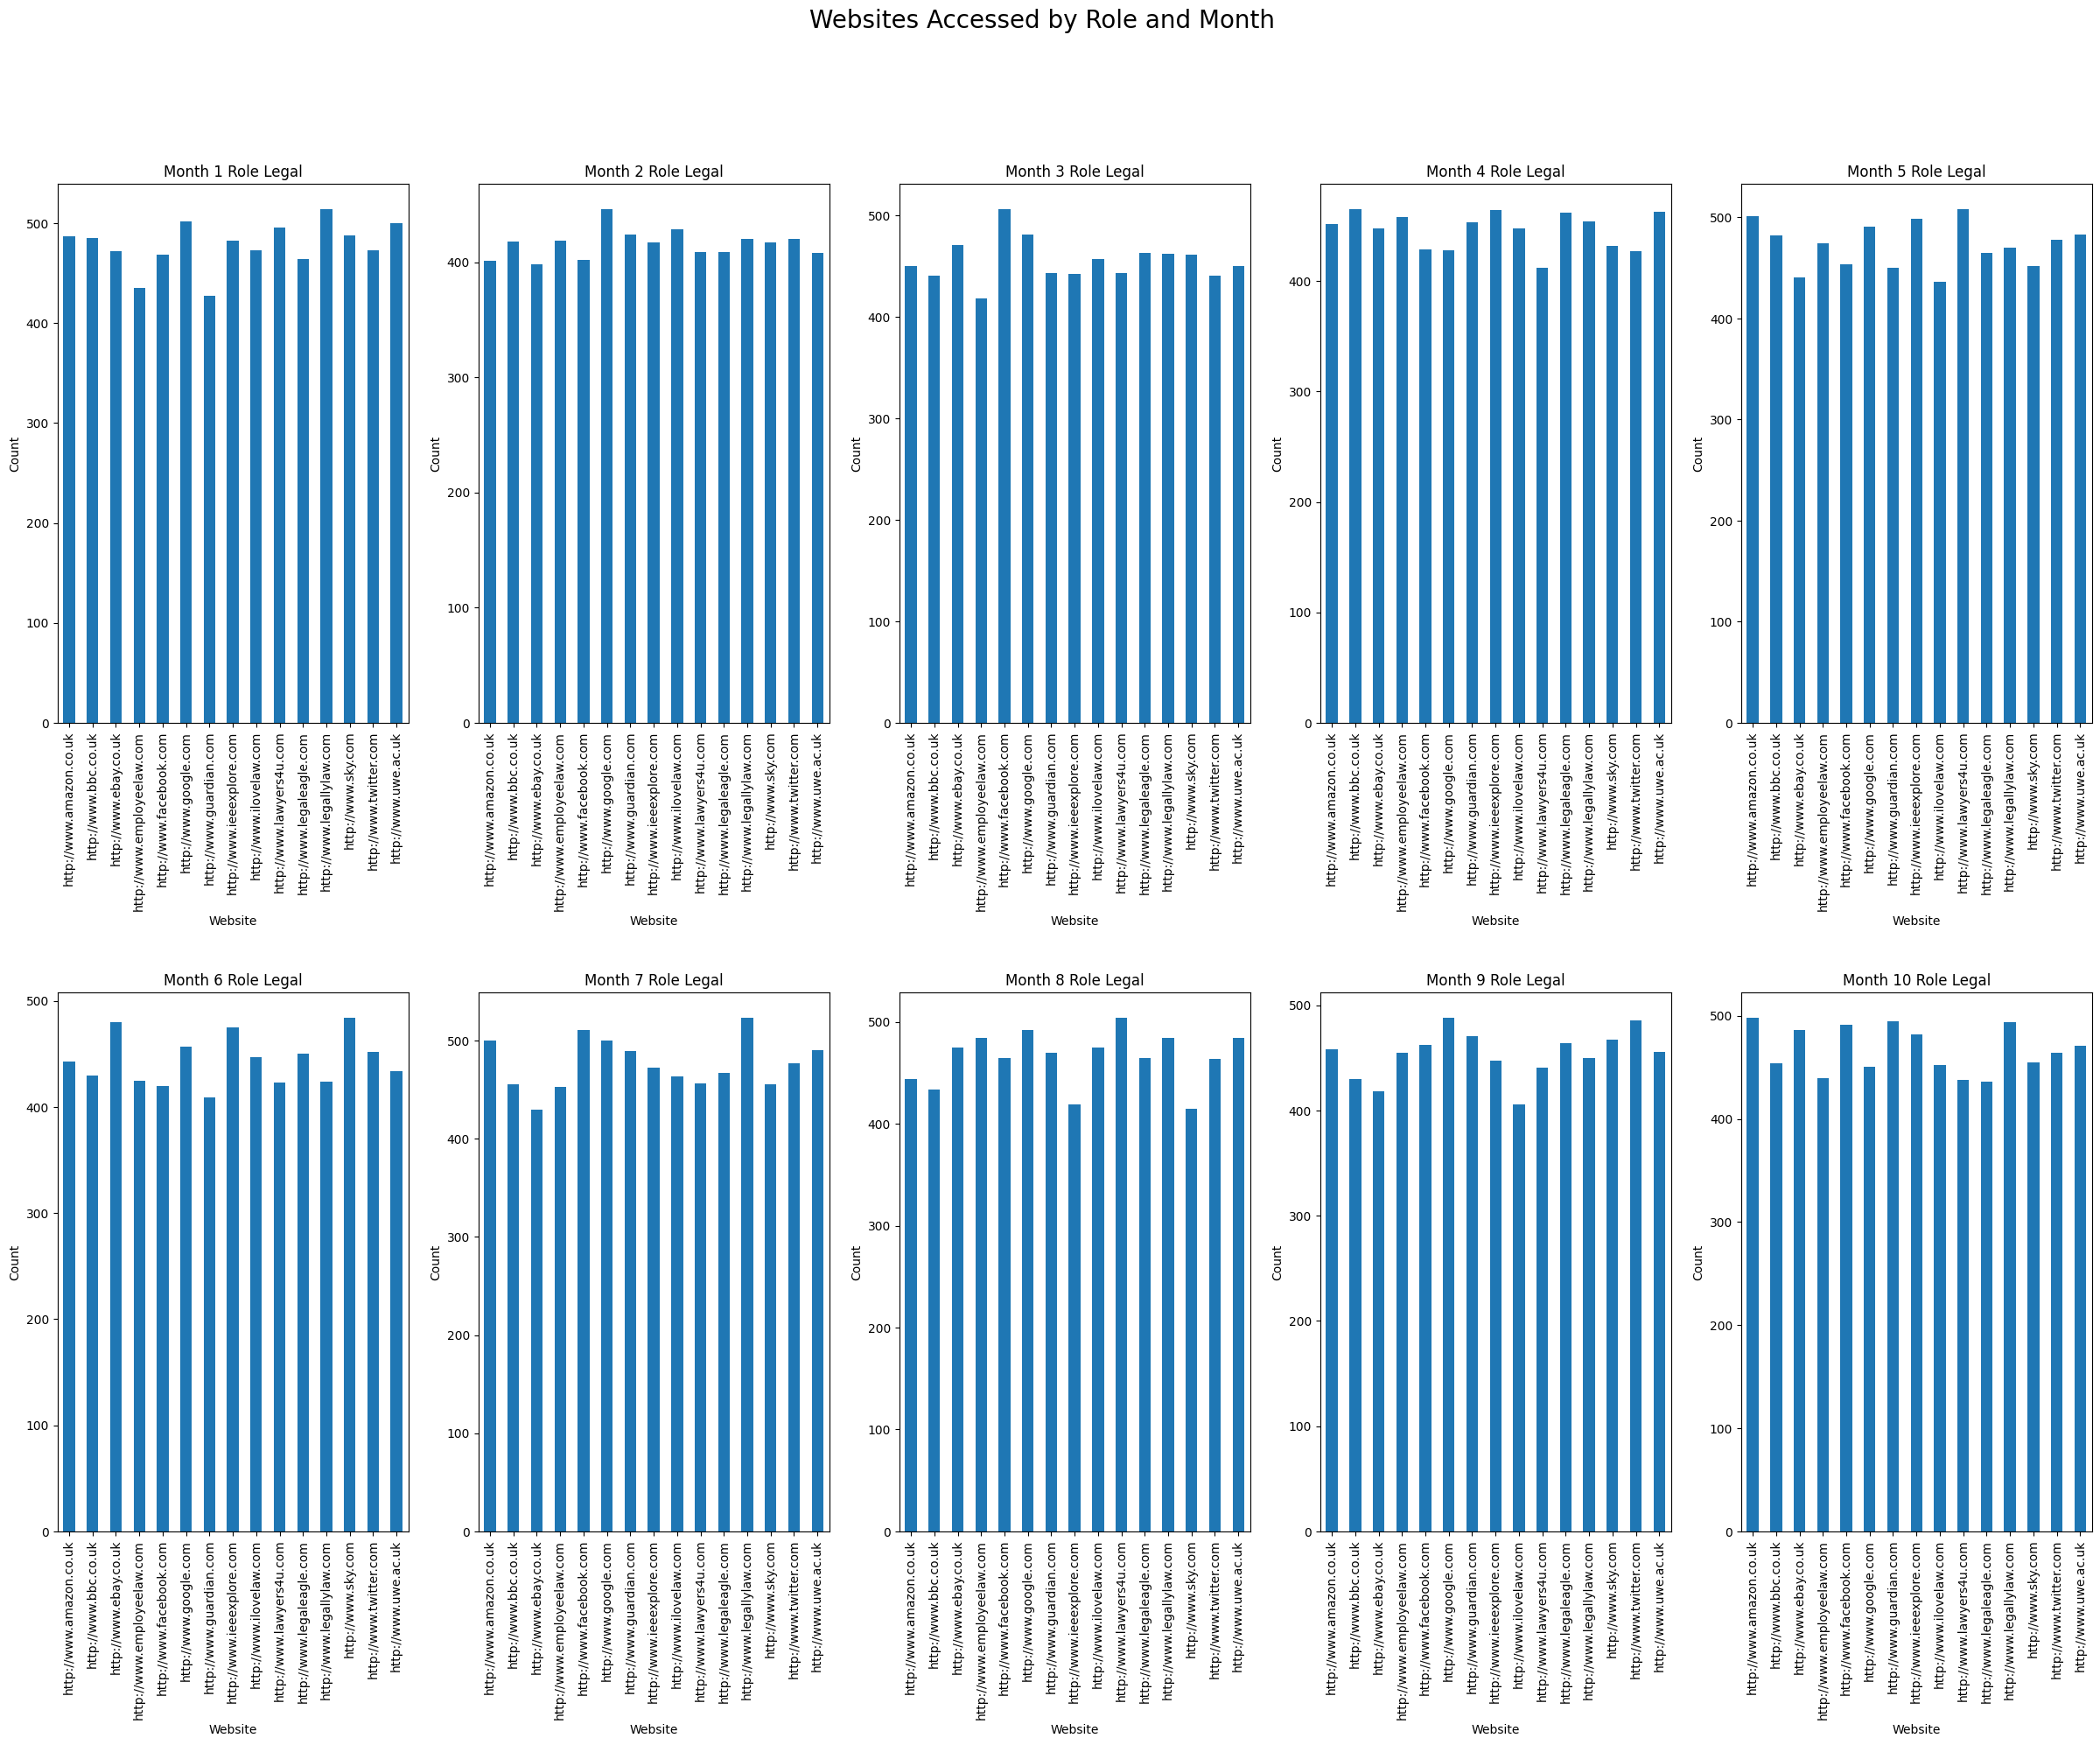

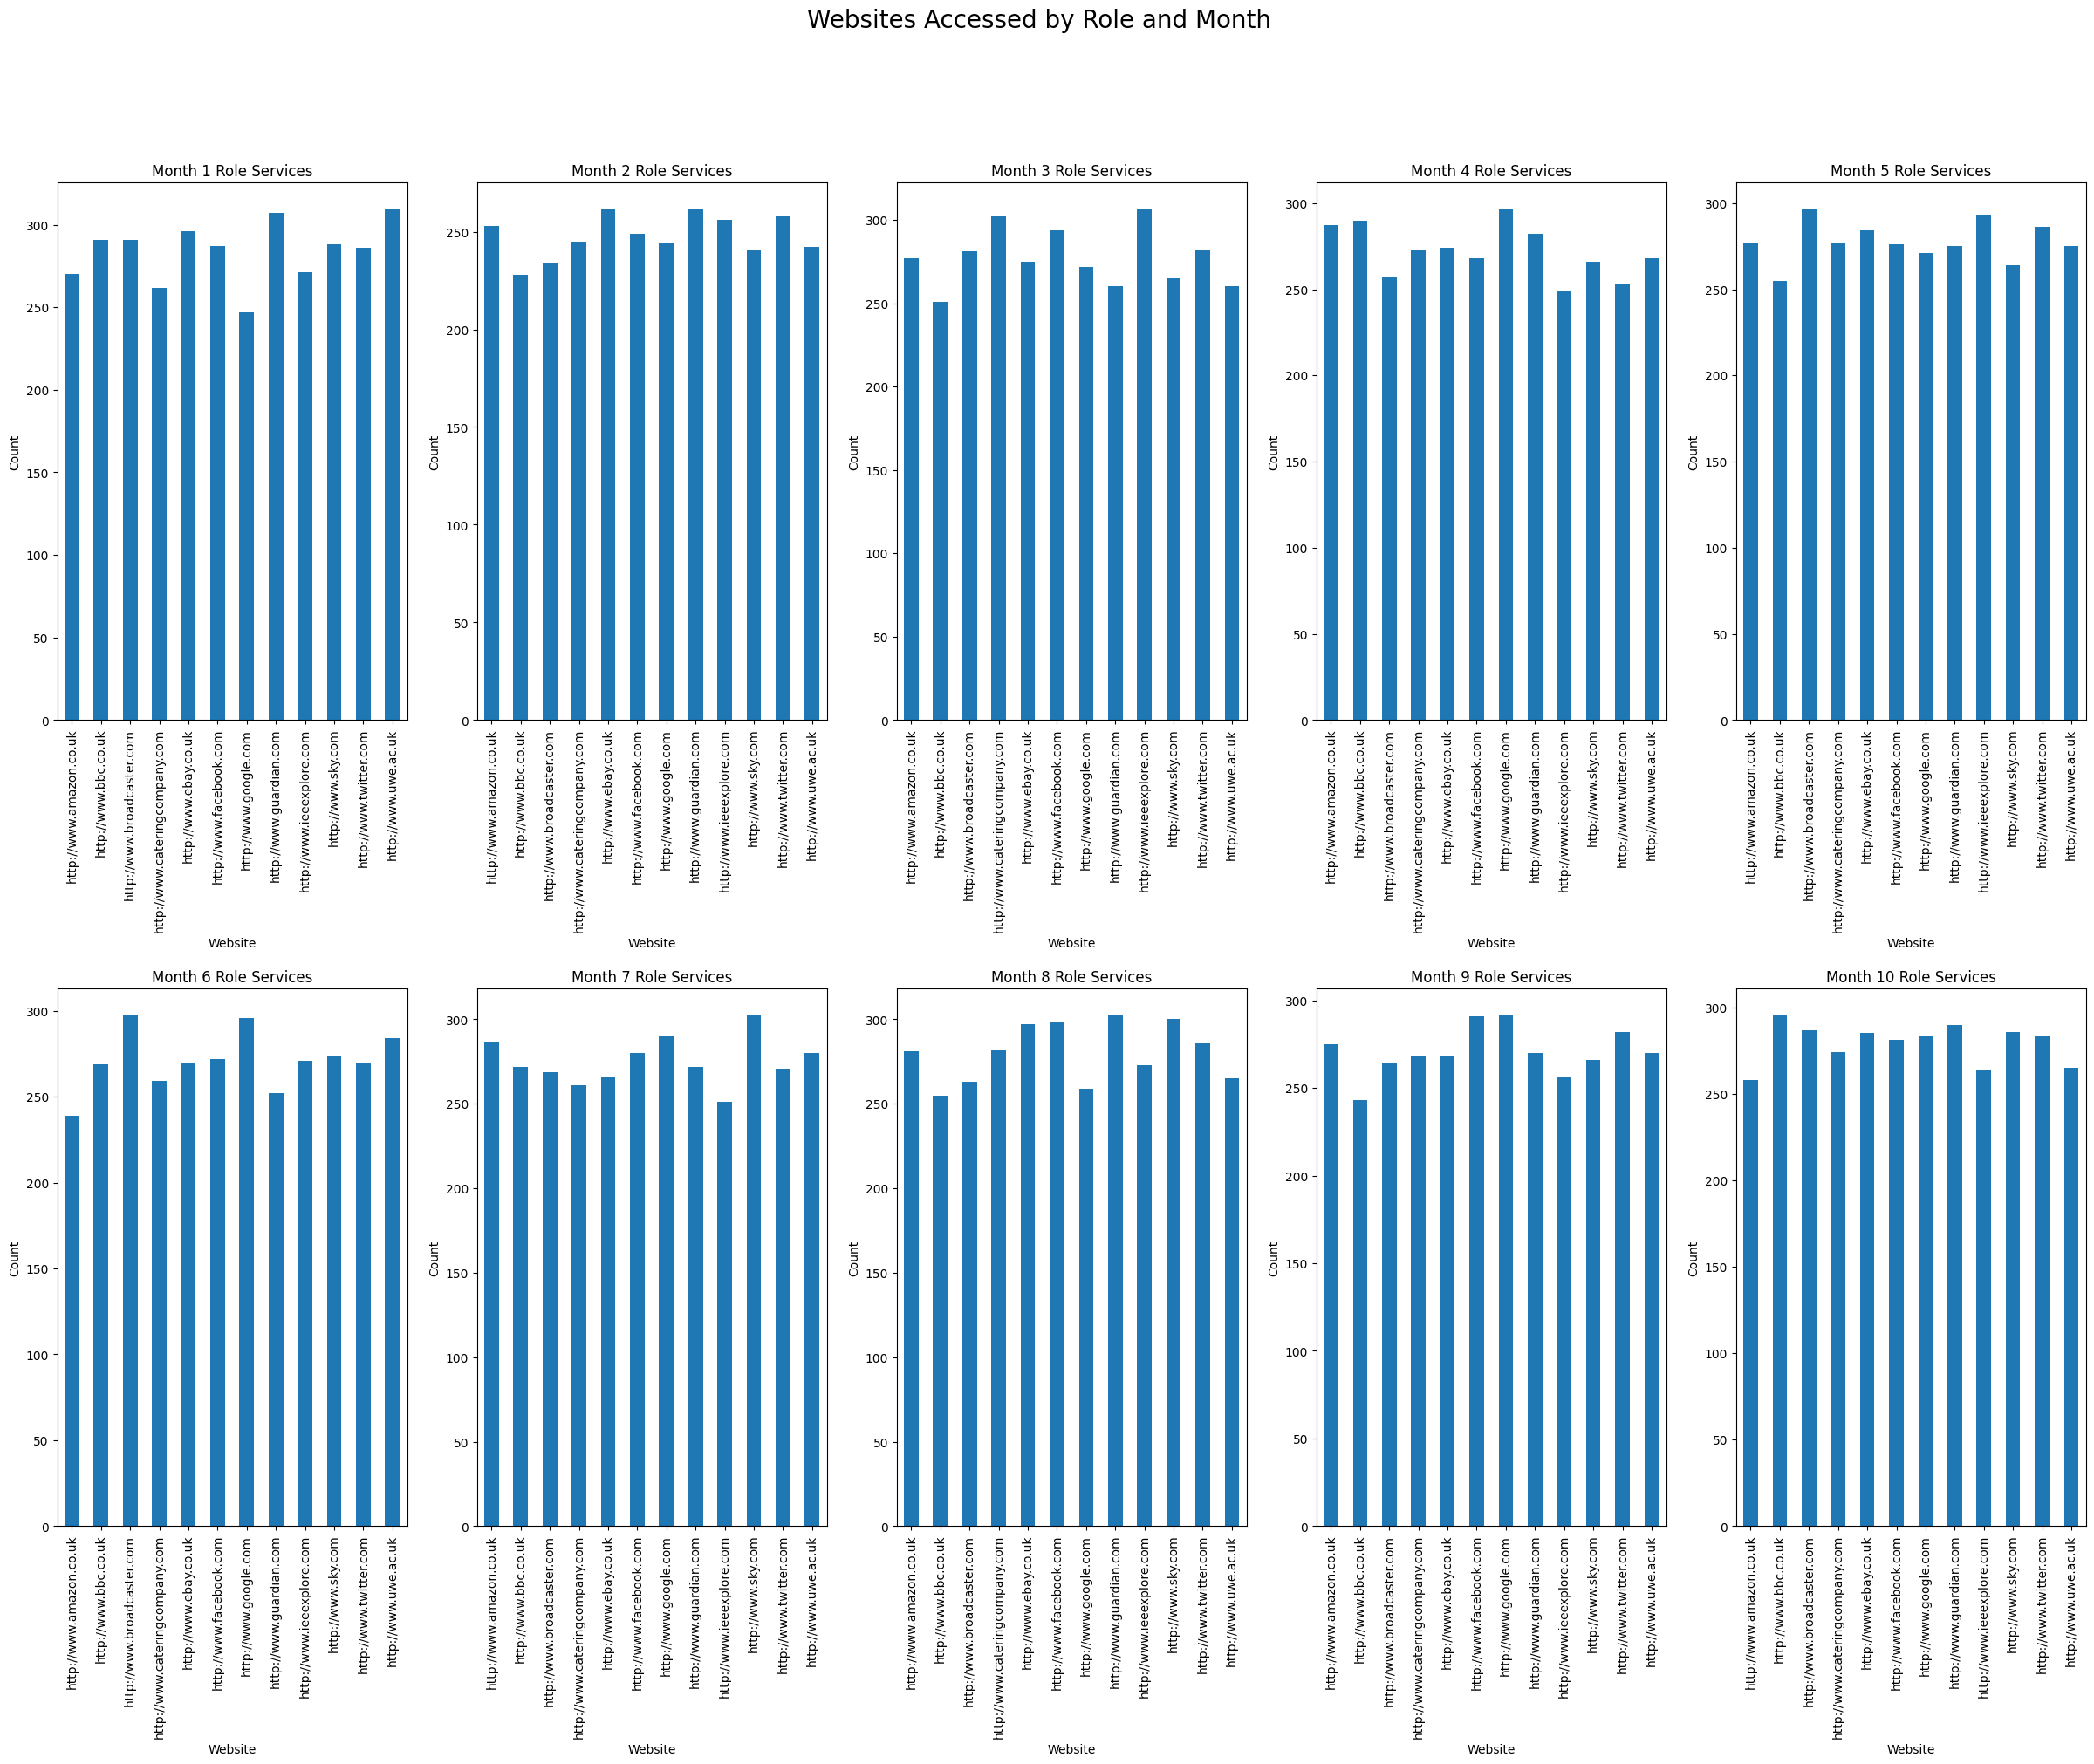

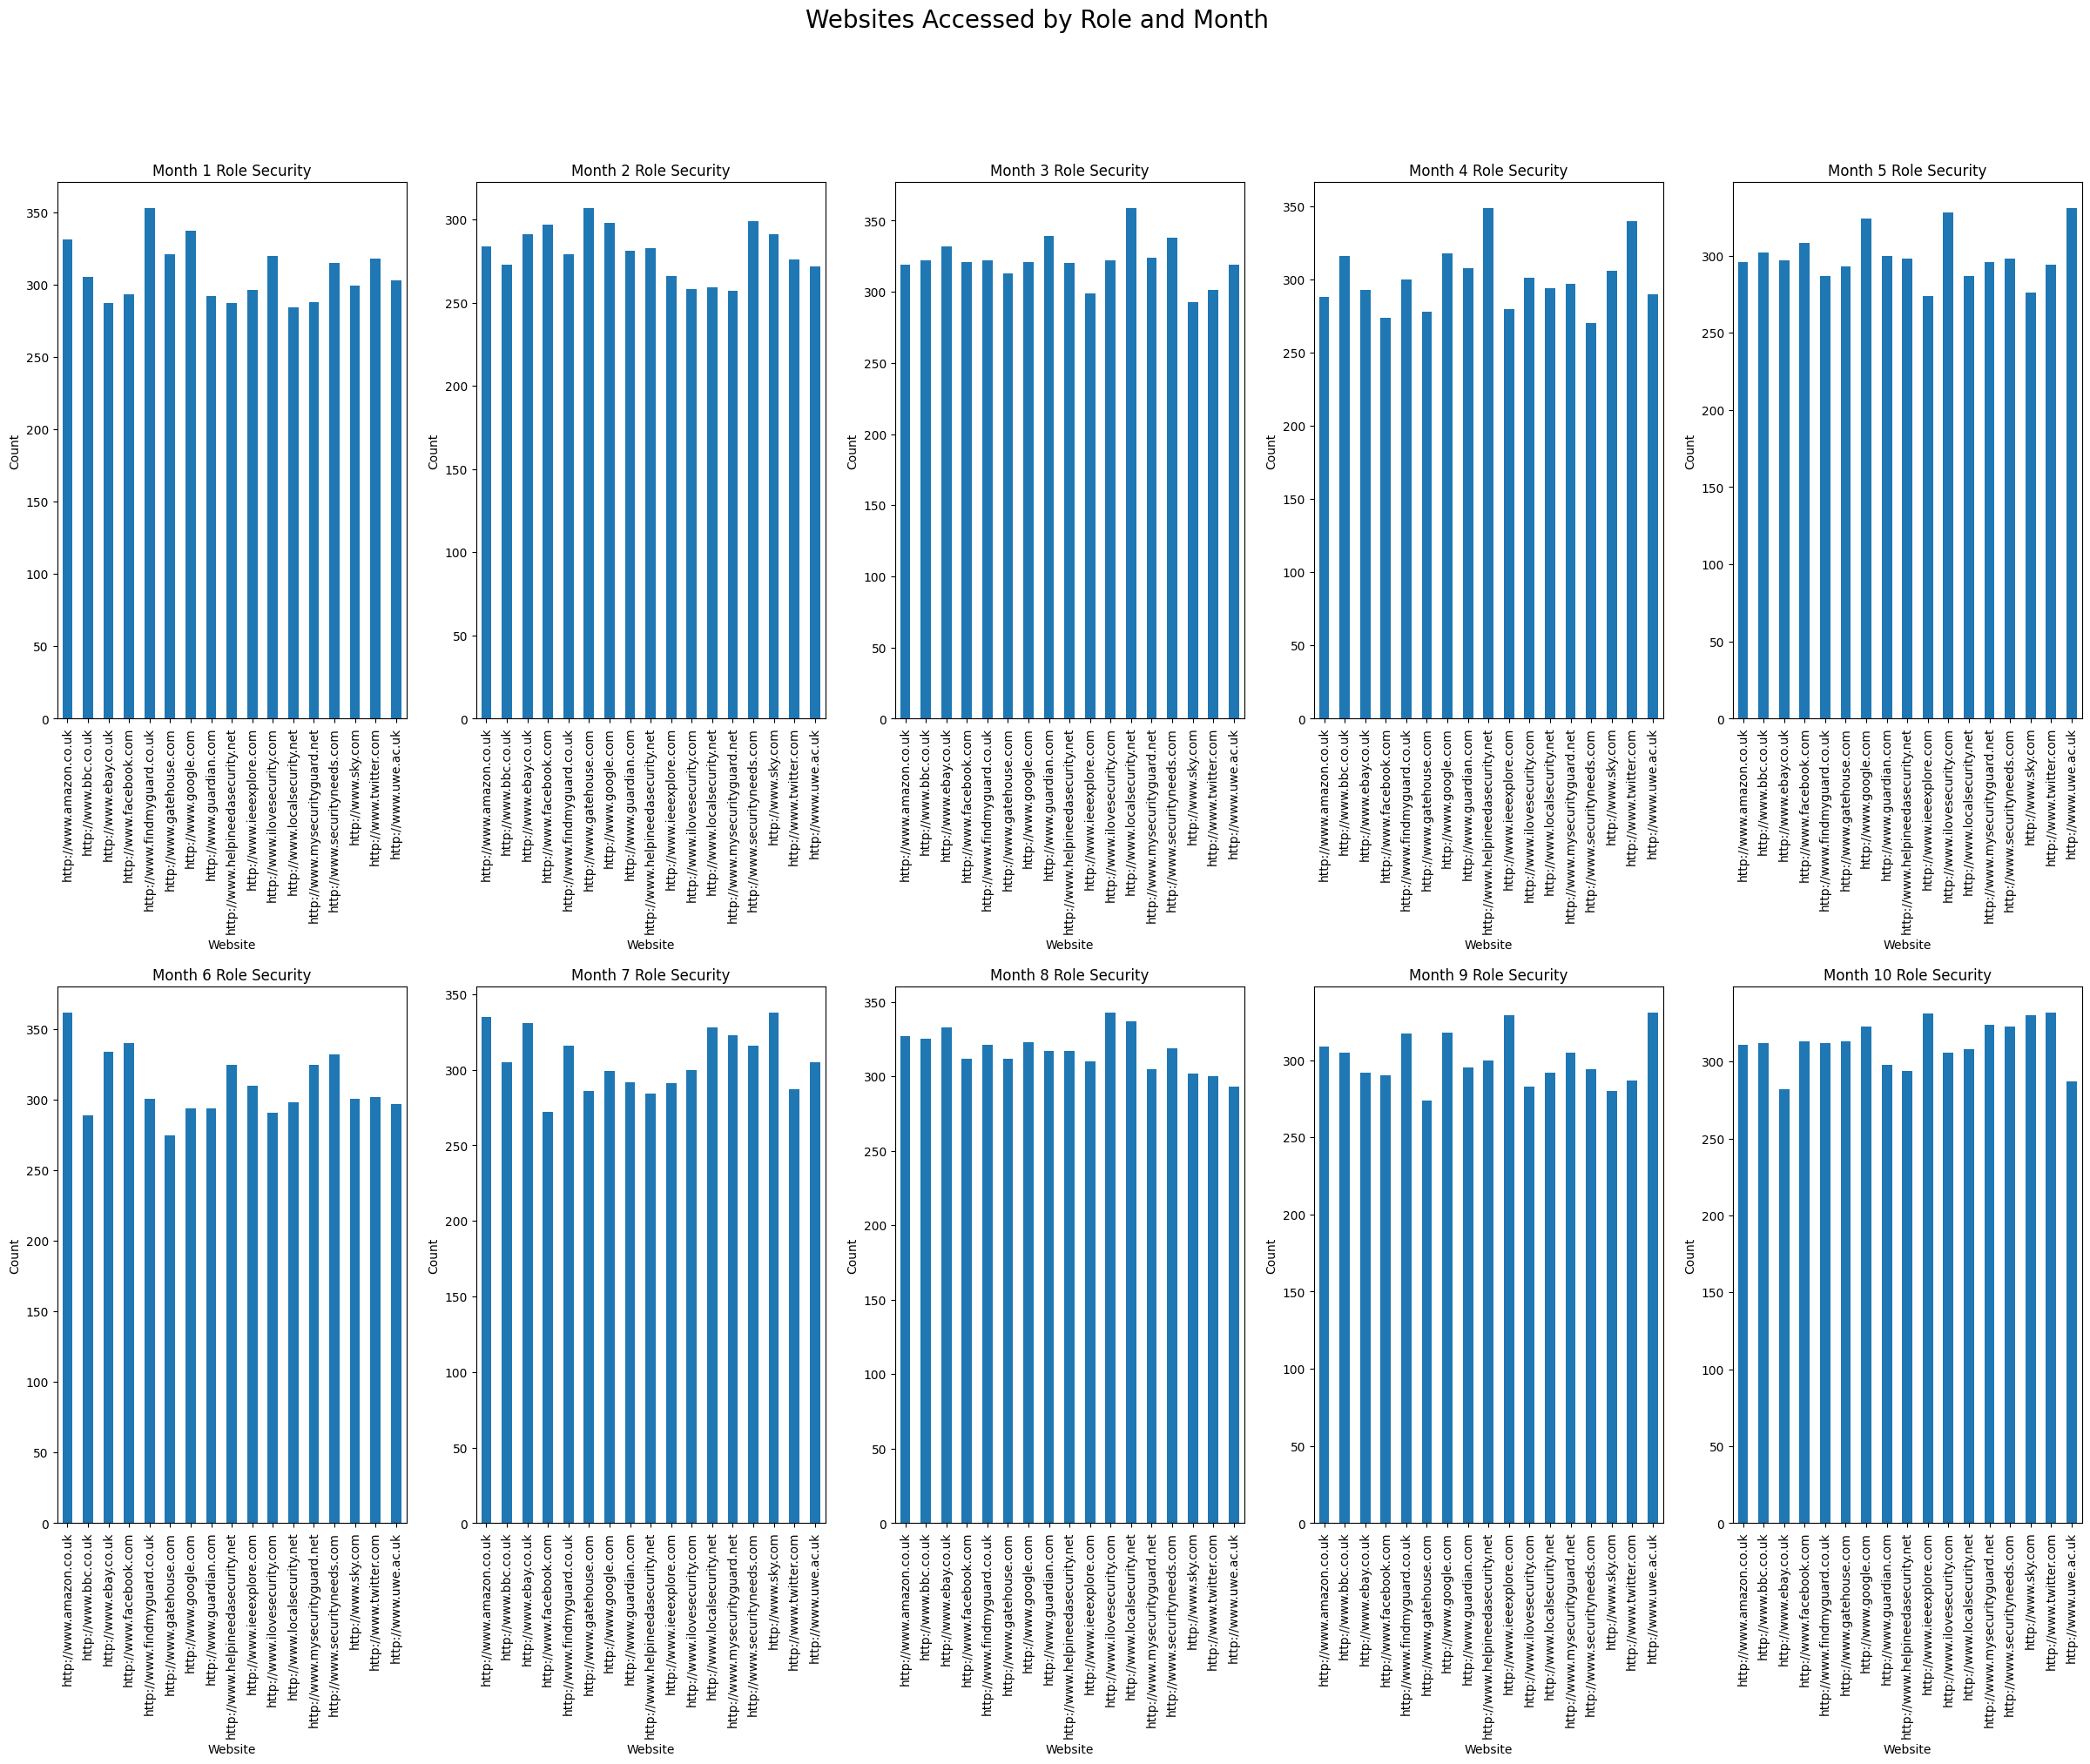

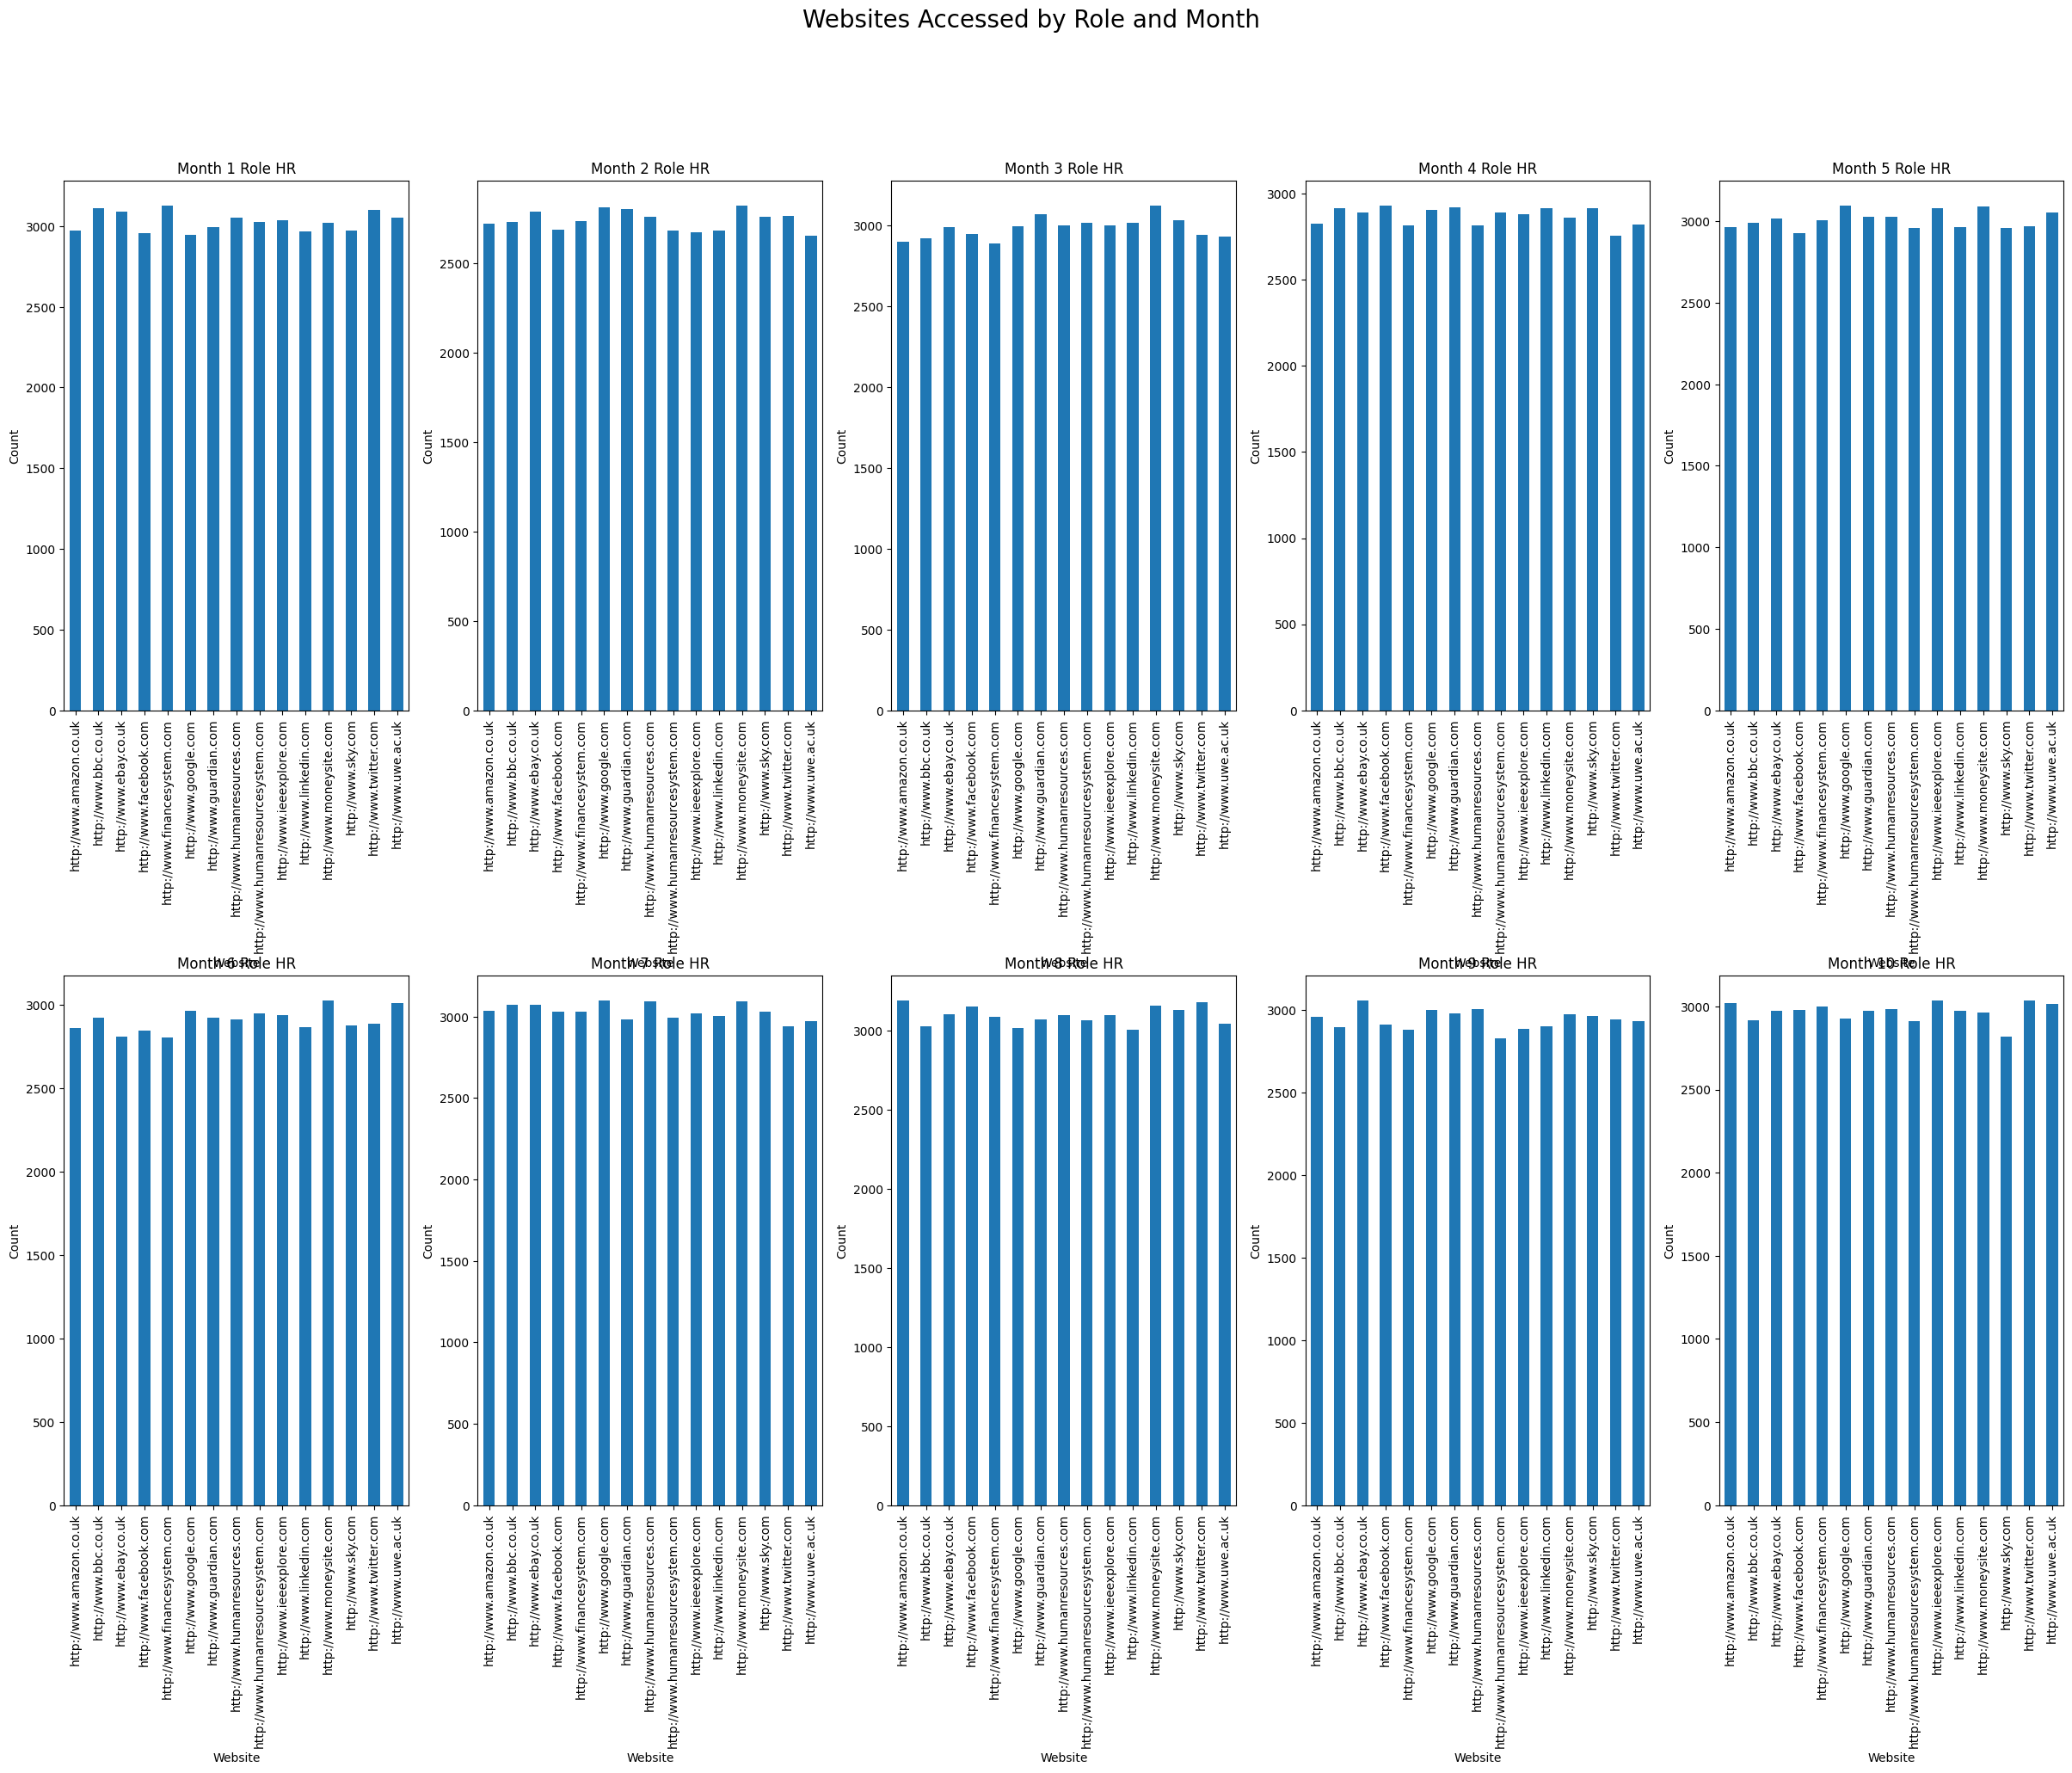

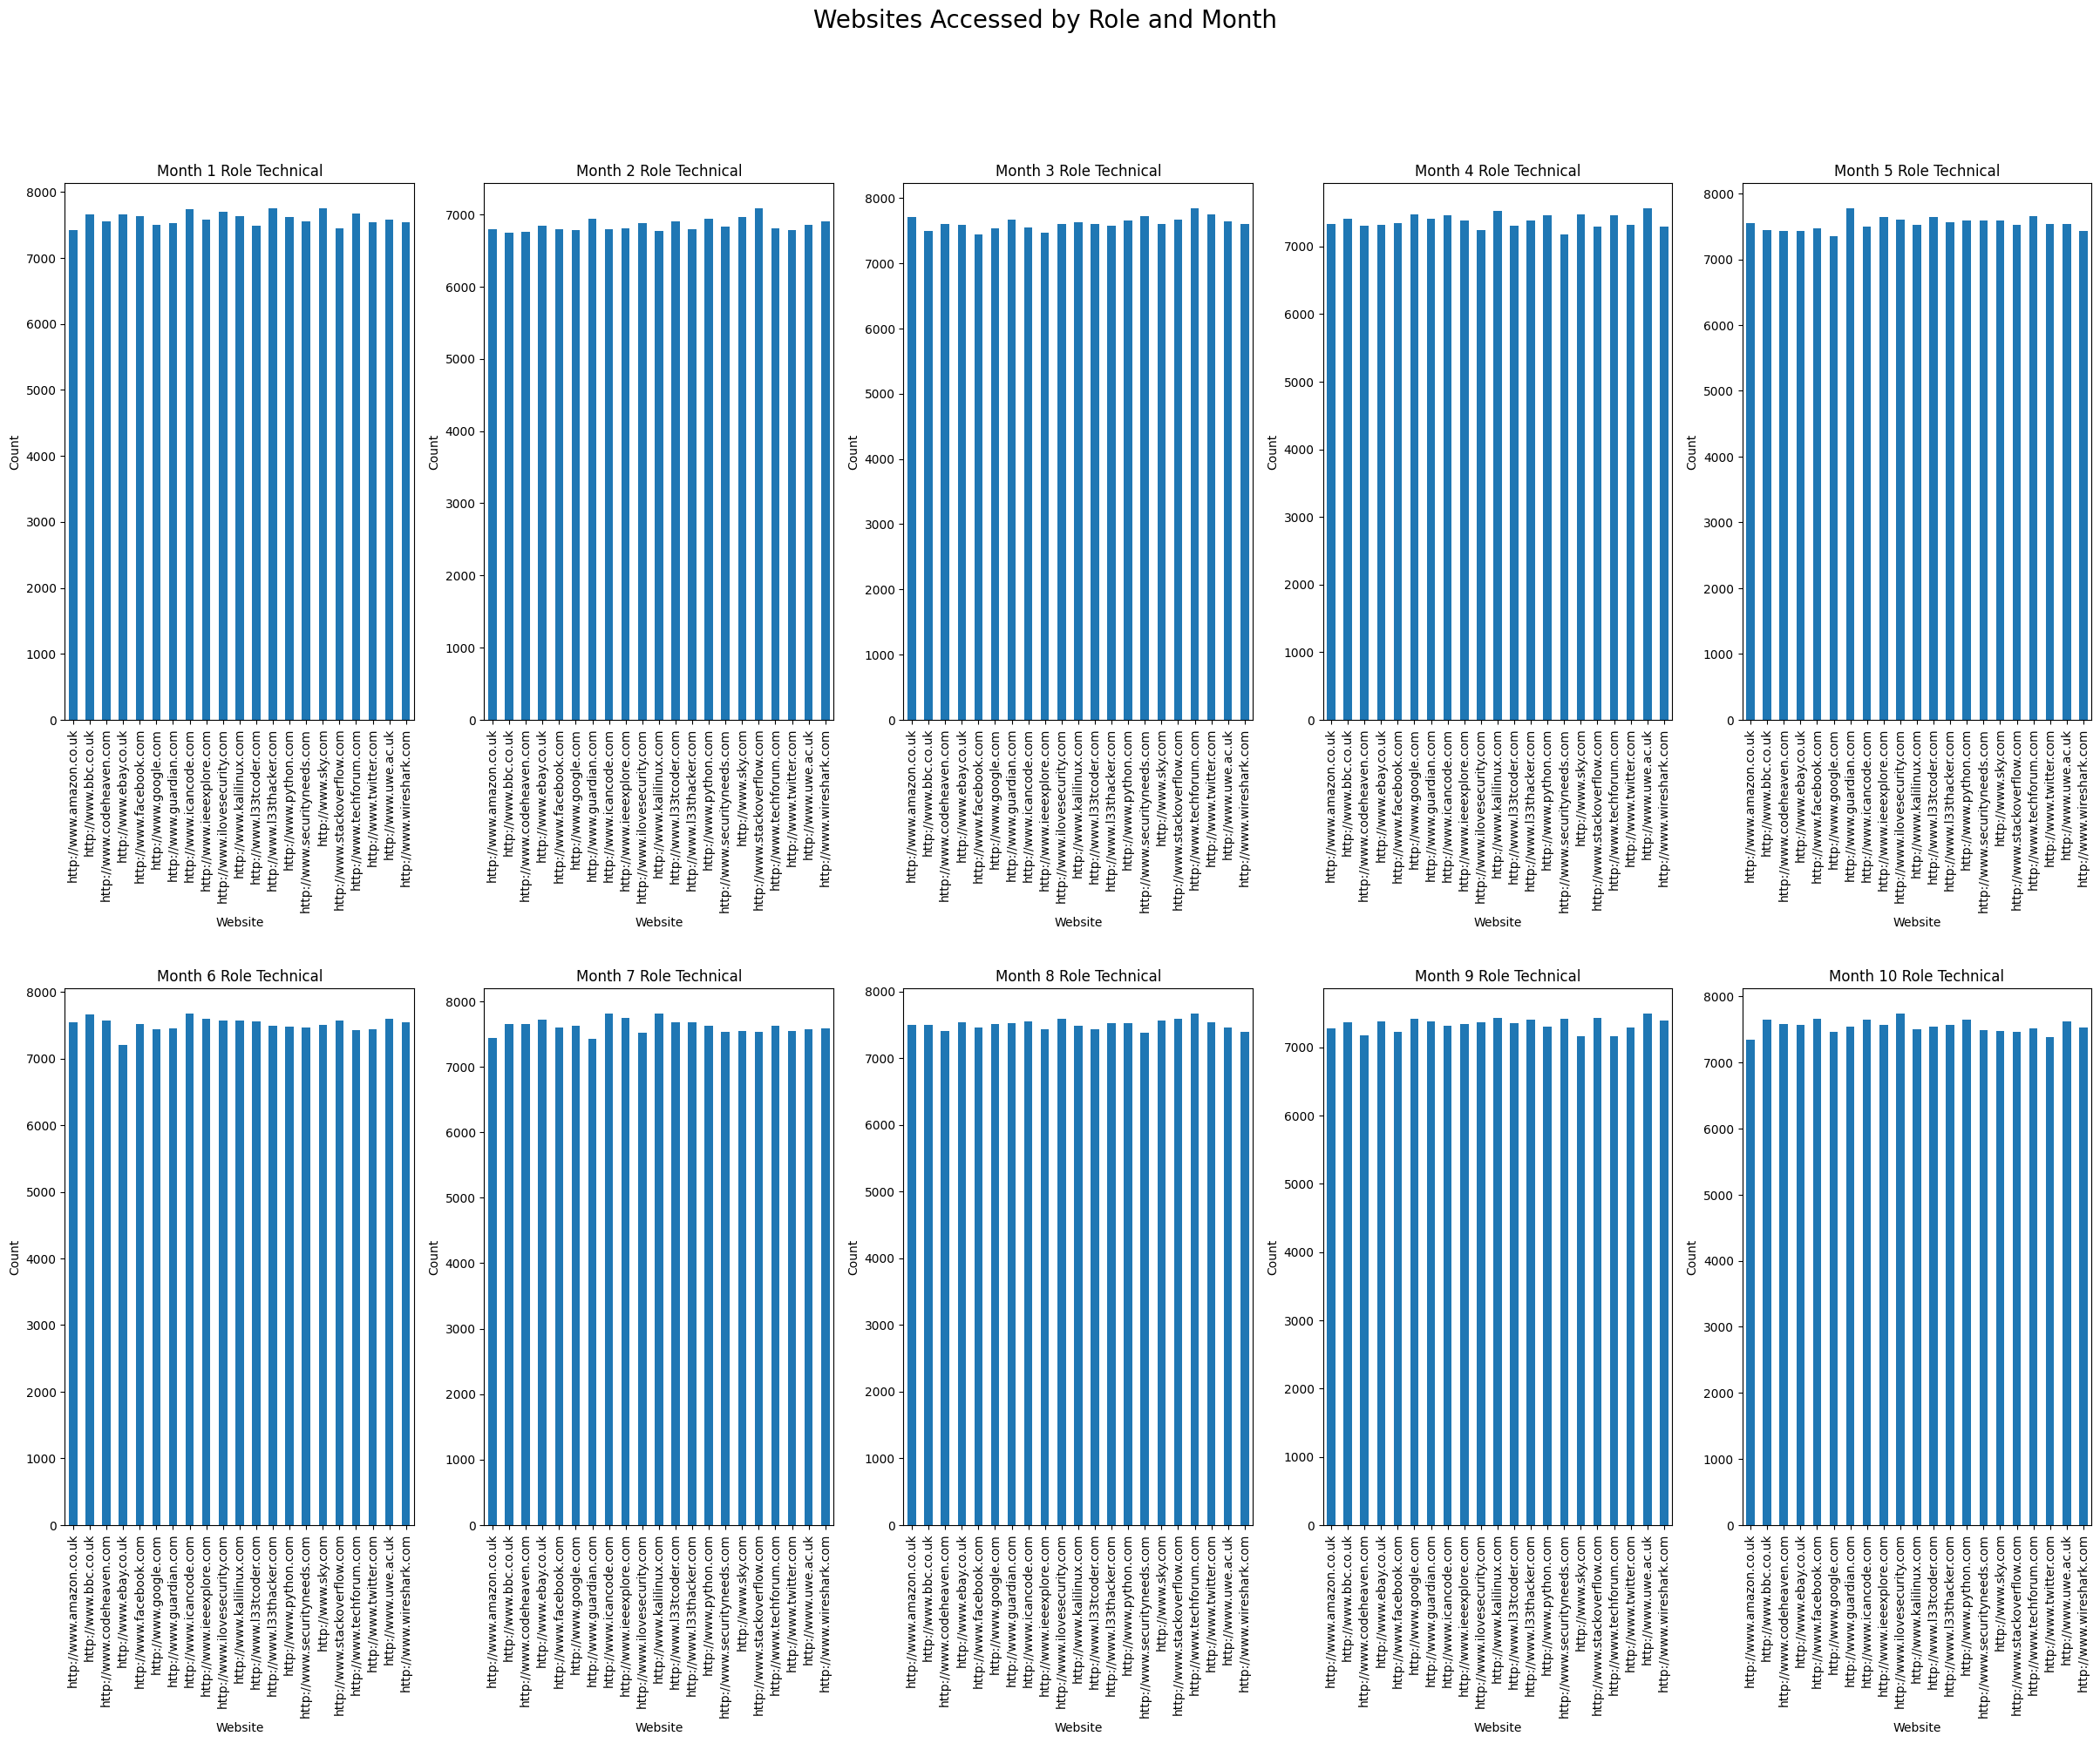

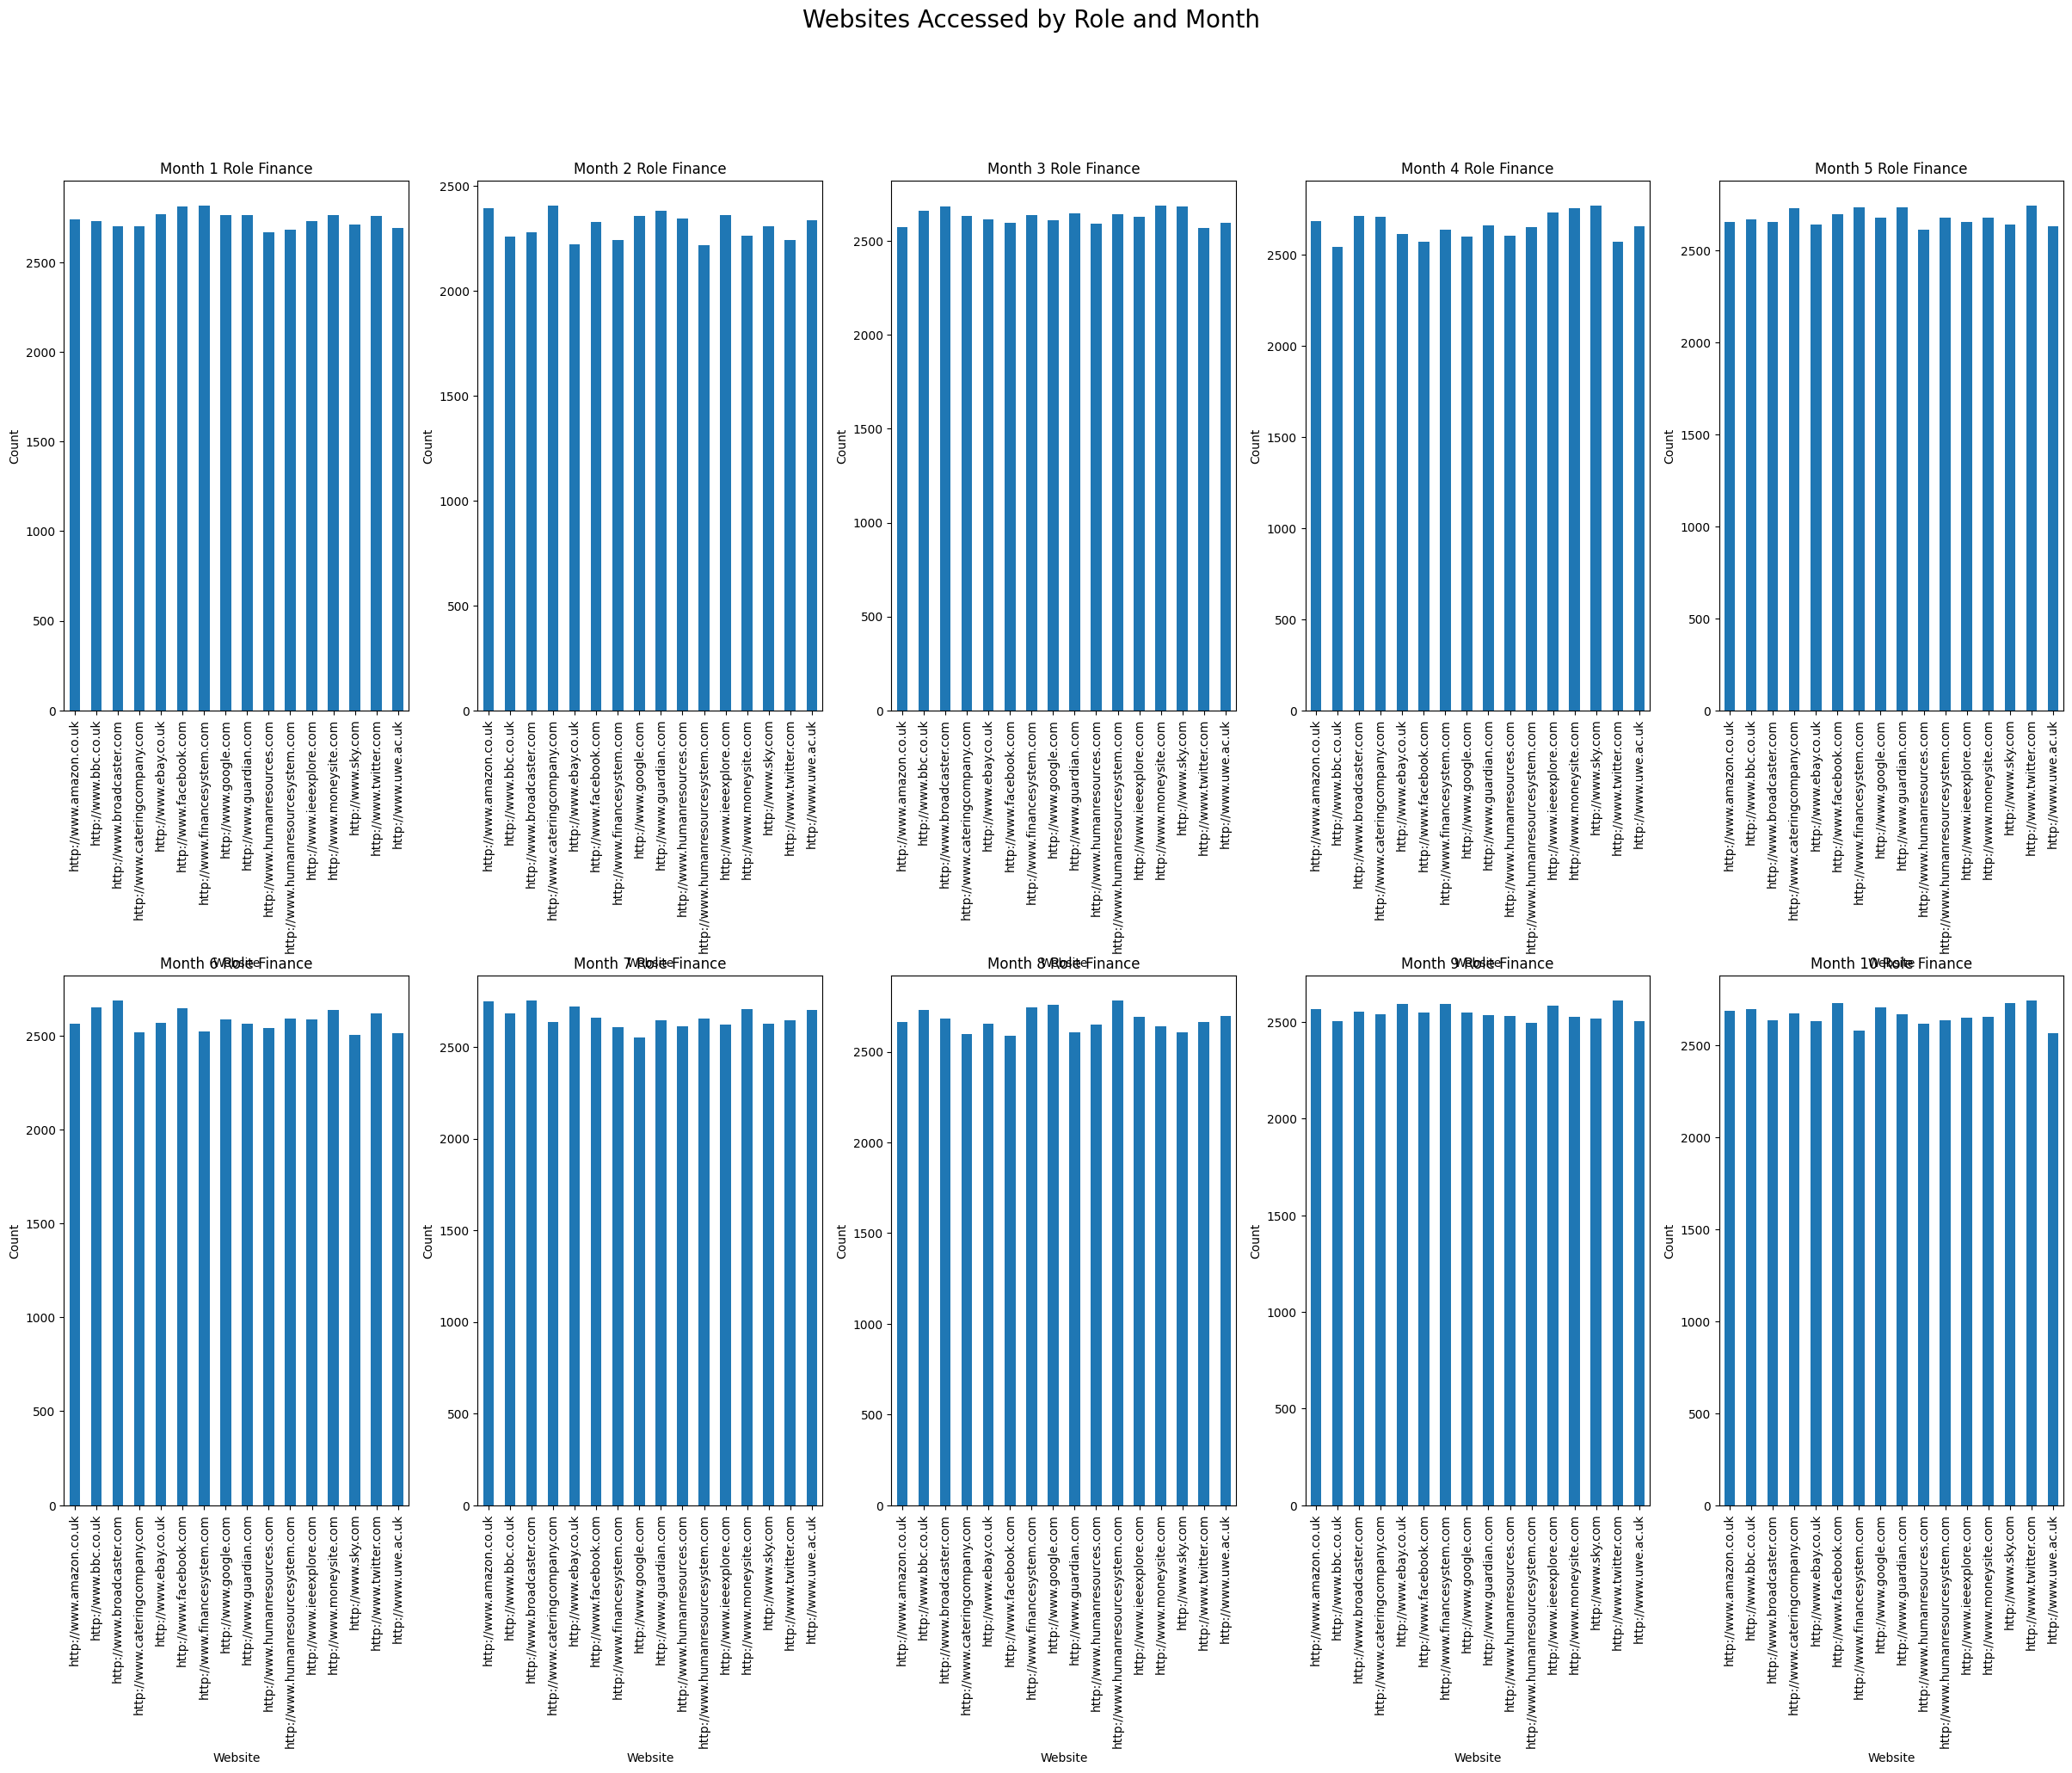

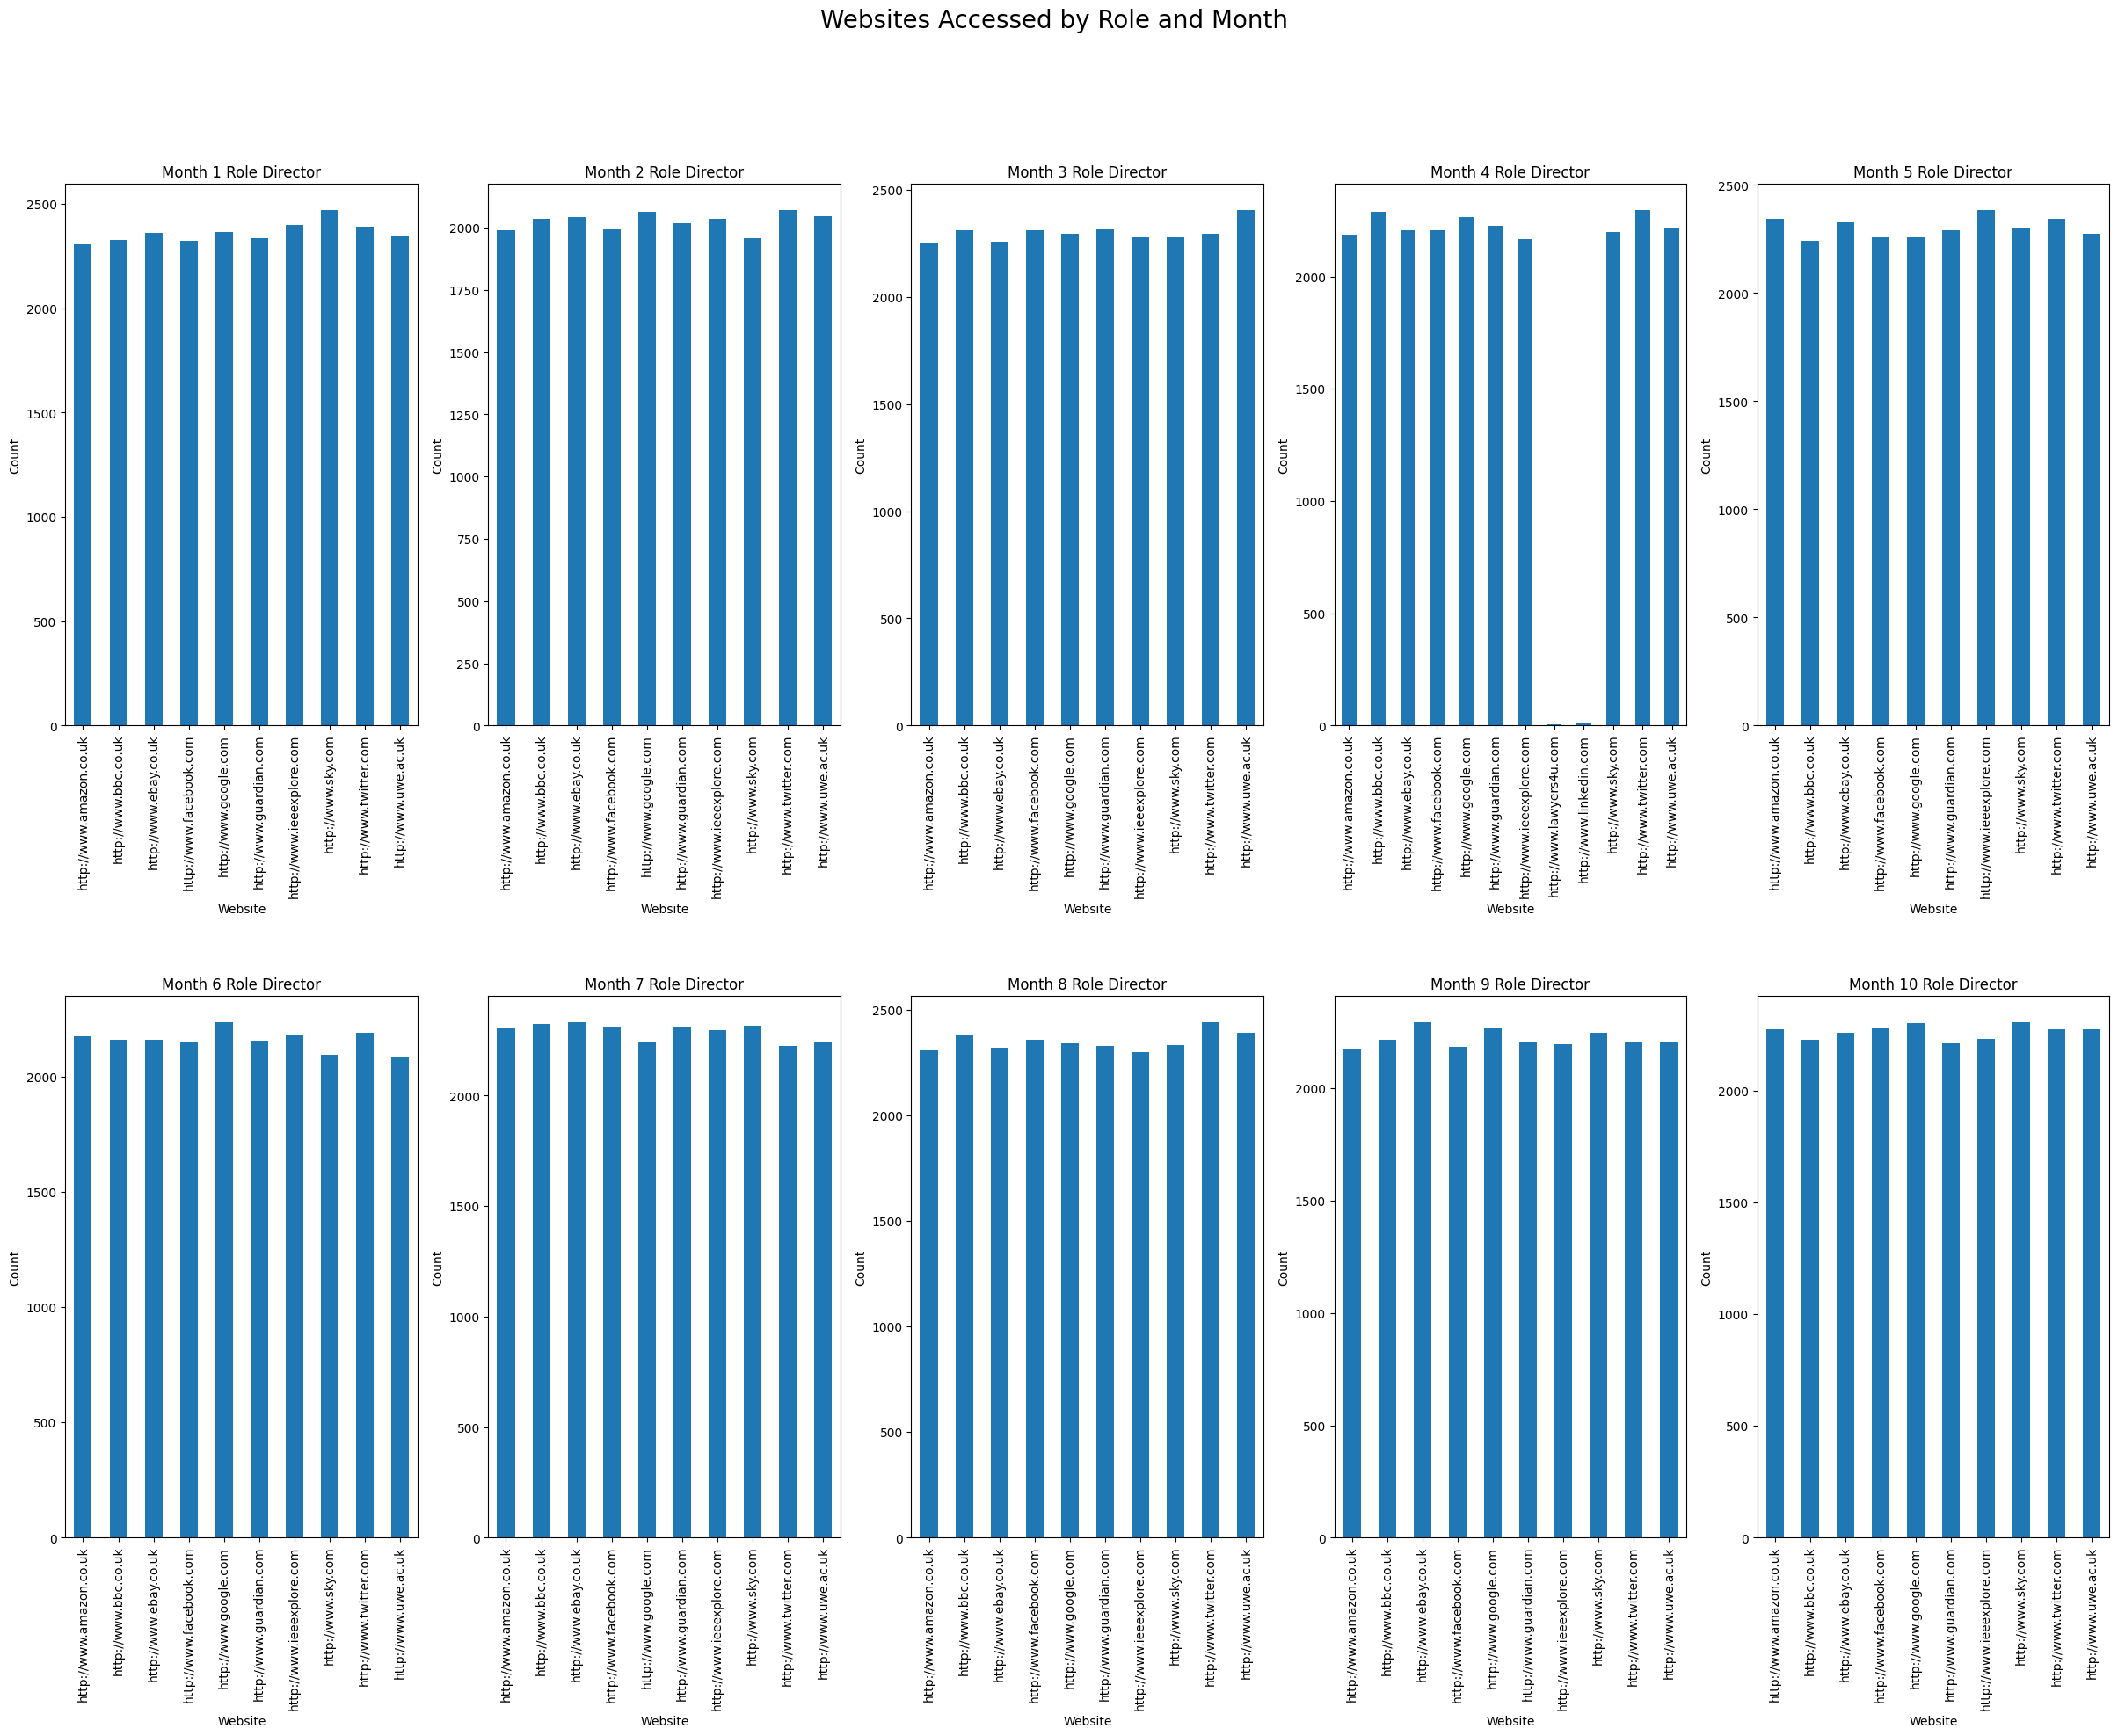

In [114]:

#loop all roles
for role in all_roles:
    #sets the plots
    plt.figure(figsize=(30, 20))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle('Websites Accessed by Role and Month', fontsize=20)
    #filter by month
    for month in range(1,11):
        #creates the subplots
        axs = plt.subplot(2, 5, month)
        #gets the data for each month
        eachMonthWeb =pd.DataFrame(web_data[web_data['datetime'].dt.month == month])
        #gets the data for each role
        allUsersWeb = pd.DataFrame(employee_data[employee_data['user'].isin(user_set[role])])
        #merge eachMonthWeb with allUsersWeb based on users and creates 3 new columns
        eachMonthWebAccess = eachMonthWeb.merge(allUsersWeb, on='user', how='inner')
        #count the occurrences of each role for each website using value_counts()
        eachMonthWebPlot = eachMonthWebAccess.groupby('website')['role'].value_counts().unstack(fill_value=0)
        #plots the data
        eachMonthWebPlot.plot(kind='bar', stacked=False, ax=axs)
        #formats the plots
        axs.set_title(f'Month {month} Role {role}')
        axs.set_xlabel('Website') 
        axs.set_ylabel('Count')
        axs.get_legend().remove()

        #get month 4 and director
        if role == 'Director' and month == 4:
            directorWeb = eachMonthWebAccess
            
plt.show()

#director role month 4 accessed websites no other director has

In [115]:

#gets the user that visited lawyers4u and linkedin
print("Websites accesssed (lawyers4u and linekdin) analysis:")
websites = ['http://www.lawyers4u.com','http://www.linkedin.com']
for website in websites:
    print(directorWeb[(directorWeb['website']== website)])

#only user usr-xef - suspicious

Websites accesssed (lawyers4u and linekdin) analysis:
                        datetime     user                   website      role  \
21353 2022-04-18 08:25:00.115706  usr-xef  http://www.lawyers4u.com  Director   
21358 2022-04-18 15:17:21.375442  usr-xef  http://www.lawyers4u.com  Director   
21366 2022-04-18 18:03:56.156070  usr-xef  http://www.lawyers4u.com  Director   
21370 2022-04-18 21:04:35.118469  usr-xef  http://www.lawyers4u.com  Director   
21372 2022-04-18 21:12:29.612753  usr-xef  http://www.lawyers4u.com  Director   

                     email    pc  
21353  usr-xef@uwetech.com  pc89  
21358  usr-xef@uwetech.com  pc89  
21366  usr-xef@uwetech.com  pc89  
21370  usr-xef@uwetech.com  pc89  
21372  usr-xef@uwetech.com  pc89  
                        datetime     user                  website      role  \
21350 2022-04-18 06:46:33.765773  usr-xef  http://www.linkedin.com  Director   
21354 2022-04-18 09:23:30.801205  usr-xef  http://www.linkedin.com  Director   
21355 202

## USB data
### Analysis
- First I checked that all the usbs that were inserted where removed and no suspicious events where found there, the numbers where the same.
- Then i checked which users used usbs, I didnt display this as a graph because I wanted to check every user and the number. I found that usr-xef was the only director that accessed usbs.
- I then displayed the logs of usr-xef as a graph and found that throughout month 4 only that user accessed the usbs. 


In [116]:
print("Total number of usb insert and remove:")
usb_data['action'].value_counts()
#checks if there has been the same amount of inserted and removed usbs

Total number of usb insert and remove:


usb_insert    456077
usb_remove    456077
Name: action, dtype: int64

In [117]:
#looks at the number of users for each role that access usb data
print("USB access by role and user:")
for role in all_roles:
    allUsersUSB = pd.DataFrame(usb_data[usb_data['user'].isin(user_set[role])])
    print(role)
    print(allUsersUSB['user'].value_counts())
    

#security doesnt have any usbs
#usr-xef is the only director that uses usbs
    

USB access by role and user:
Legal
usr-umo    1868
usr-wfx    1868
usr-mmi    1866
usr-rvn    1864
usr-wws    1862
usr-ndp    1858
usr-bls    1854
usr-yhq    1850
usr-xiu    1844
usr-yzd    1840
usr-fzg    1840
usr-cvb    1838
usr-lvr    1836
usr-esq    1834
usr-tqc    1828
usr-zze    1828
usr-xwz    1826
usr-ohl    1826
usr-cij    1824
usr-qpz    1822
usr-crd    1818
usr-ghz    1814
usr-vol    1814
usr-aci    1812
usr-axq    1812
usr-qhu    1810
usr-hvb    1808
usr-fsc    1808
usr-vni    1806
usr-wel    1804
usr-zrz    1800
usr-ale    1800
usr-rcw    1794
usr-hxz    1790
usr-usl    1786
usr-jpj    1784
usr-dux    1782
usr-qvv    1780
usr-amc    1772
usr-fdl    1758
usr-mgq    1752
Name: user, dtype: int64


Services
usr-jyr    1880
usr-urc    1862
usr-rkf    1860
usr-wok    1860
usr-krm    1860
usr-ecs    1858
usr-gqk    1856
usr-qpf    1854
usr-ooa    1850
usr-ckm    1848
usr-bfa    1848
usr-jel    1848
usr-dkd    1842
usr-moz    1842
usr-xek    1842
usr-kdv    1840
usr-wdz    1836
usr-qxy    1834
usr-wor    1832
usr-ayo    1822
usr-cot    1816
usr-jwq    1814
usr-vxr    1814
usr-wcx    1812
usr-ewh    1812
usr-dnr    1812
usr-xrn    1804
usr-oaa    1804
usr-nhi    1804
usr-eeu    1794
usr-mwj    1786
usr-ijp    1786
usr-skk    1782
usr-kcd    1780
usr-enp    1776
usr-hqk    1762
Name: user, dtype: int64
Security
Series([], Name: user, dtype: int64)
HR
usr-bpg    1884
usr-jlj    1880
usr-xlq    1876
usr-hrf    1862
usr-wyt    1856
usr-kku    1850
usr-awp    1846
usr-mrm    1842
usr-ldh    1842
usr-max    1840
usr-yub    1838
usr-bds    1836
usr-jul    1830
usr-hmi    1828
usr-dyb    1828
usr-wsj    1826
usr-qik    1824
usr-lhg    1822
usr-eqr    1822
usr-nmr    1818
usr-qzx    1816
usr-f

In [118]:
print("Analysis of director user:")
allUsersUSB
#shows that user xef access on month 4

Analysis of director user:


datetime     user      action     pc
304629 2022-04-12 17:09:19.345131  usr-xef  usb_insert  pc249
304660 2022-04-12 17:20:21.396382  usr-xef  usb_insert  pc249
304681 2022-04-12 17:27:14.448826  usr-xef  usb_remove  pc249
304698 2022-04-12 17:36:23.681120  usr-xef  usb_remove  pc249
320611 2022-04-18 08:19:25.105294  usr-xef  usb_insert  pc249
320638 2022-04-18 08:31:15.543513  usr-xef  usb_remove  pc249
322385 2022-04-18 16:16:19.528419  usr-xef  usb_insert  pc249
322488 2022-04-18 16:47:42.120307  usr-xef  usb_remove  pc249
337082 2022-04-23 15:35:03.960103  usr-xef  usb_insert  pc249
337115 2022-04-23 15:51:53.098212  usr-xef  usb_remove  pc249
337284 2022-04-23 16:54:23.901147  usr-xef  usb_insert  pc249
337287 2022-04-23 16:57:00.446578  usr-xef  usb_remove  pc249

## Login times by all roles each month 
### Analysis
- Next I checked if the total number of logins matched the log offs and found that they did
- displayed as a bar chart, I checked that all the users per month login and log offs
- Finally, for usr-xef I got the suspicios days from my previous investigations and calculated all director users's average logoff and logins. For each of the days I printed out the average and the exact times for login and logoff for user xef to compare however no suspicios events seem to have occured.

In [119]:
#checks if the total number of logins match total number of logoffs
print("Total number of logins and logoffs:")
login_data['action'].value_counts()

Total number of logins and logoffs:


login     76000
logoff    76000
Name: action, dtype: int64

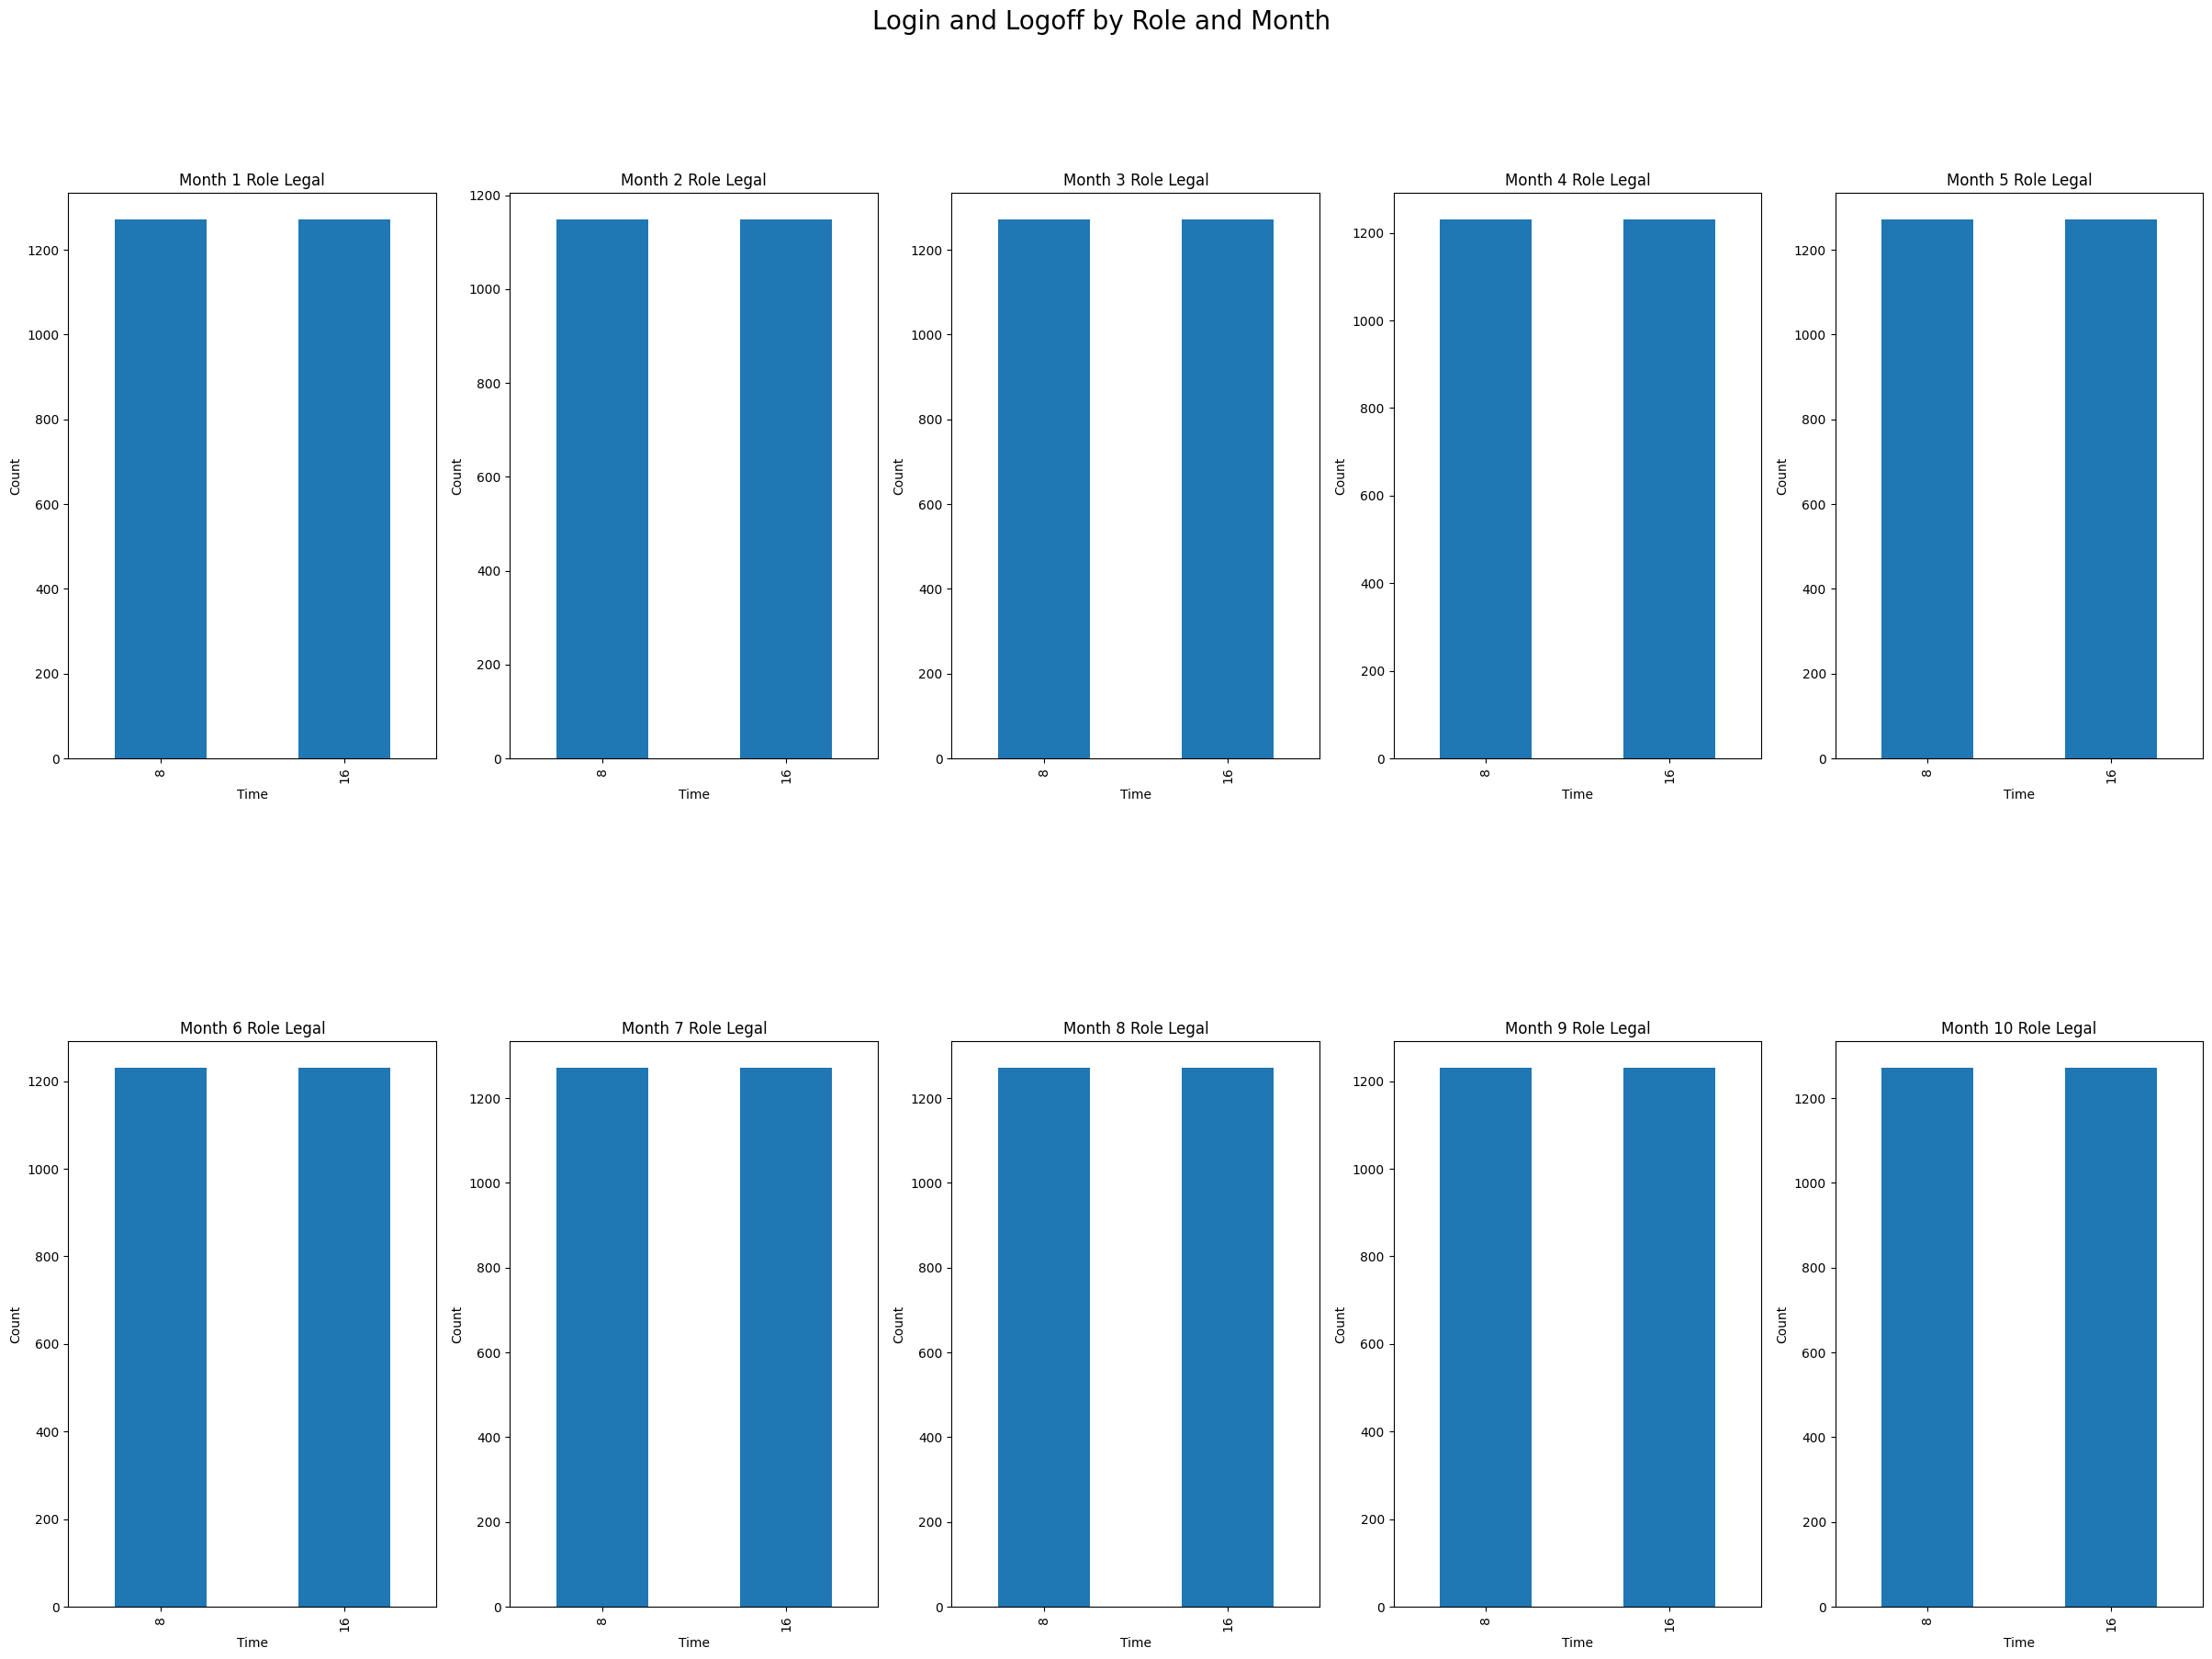

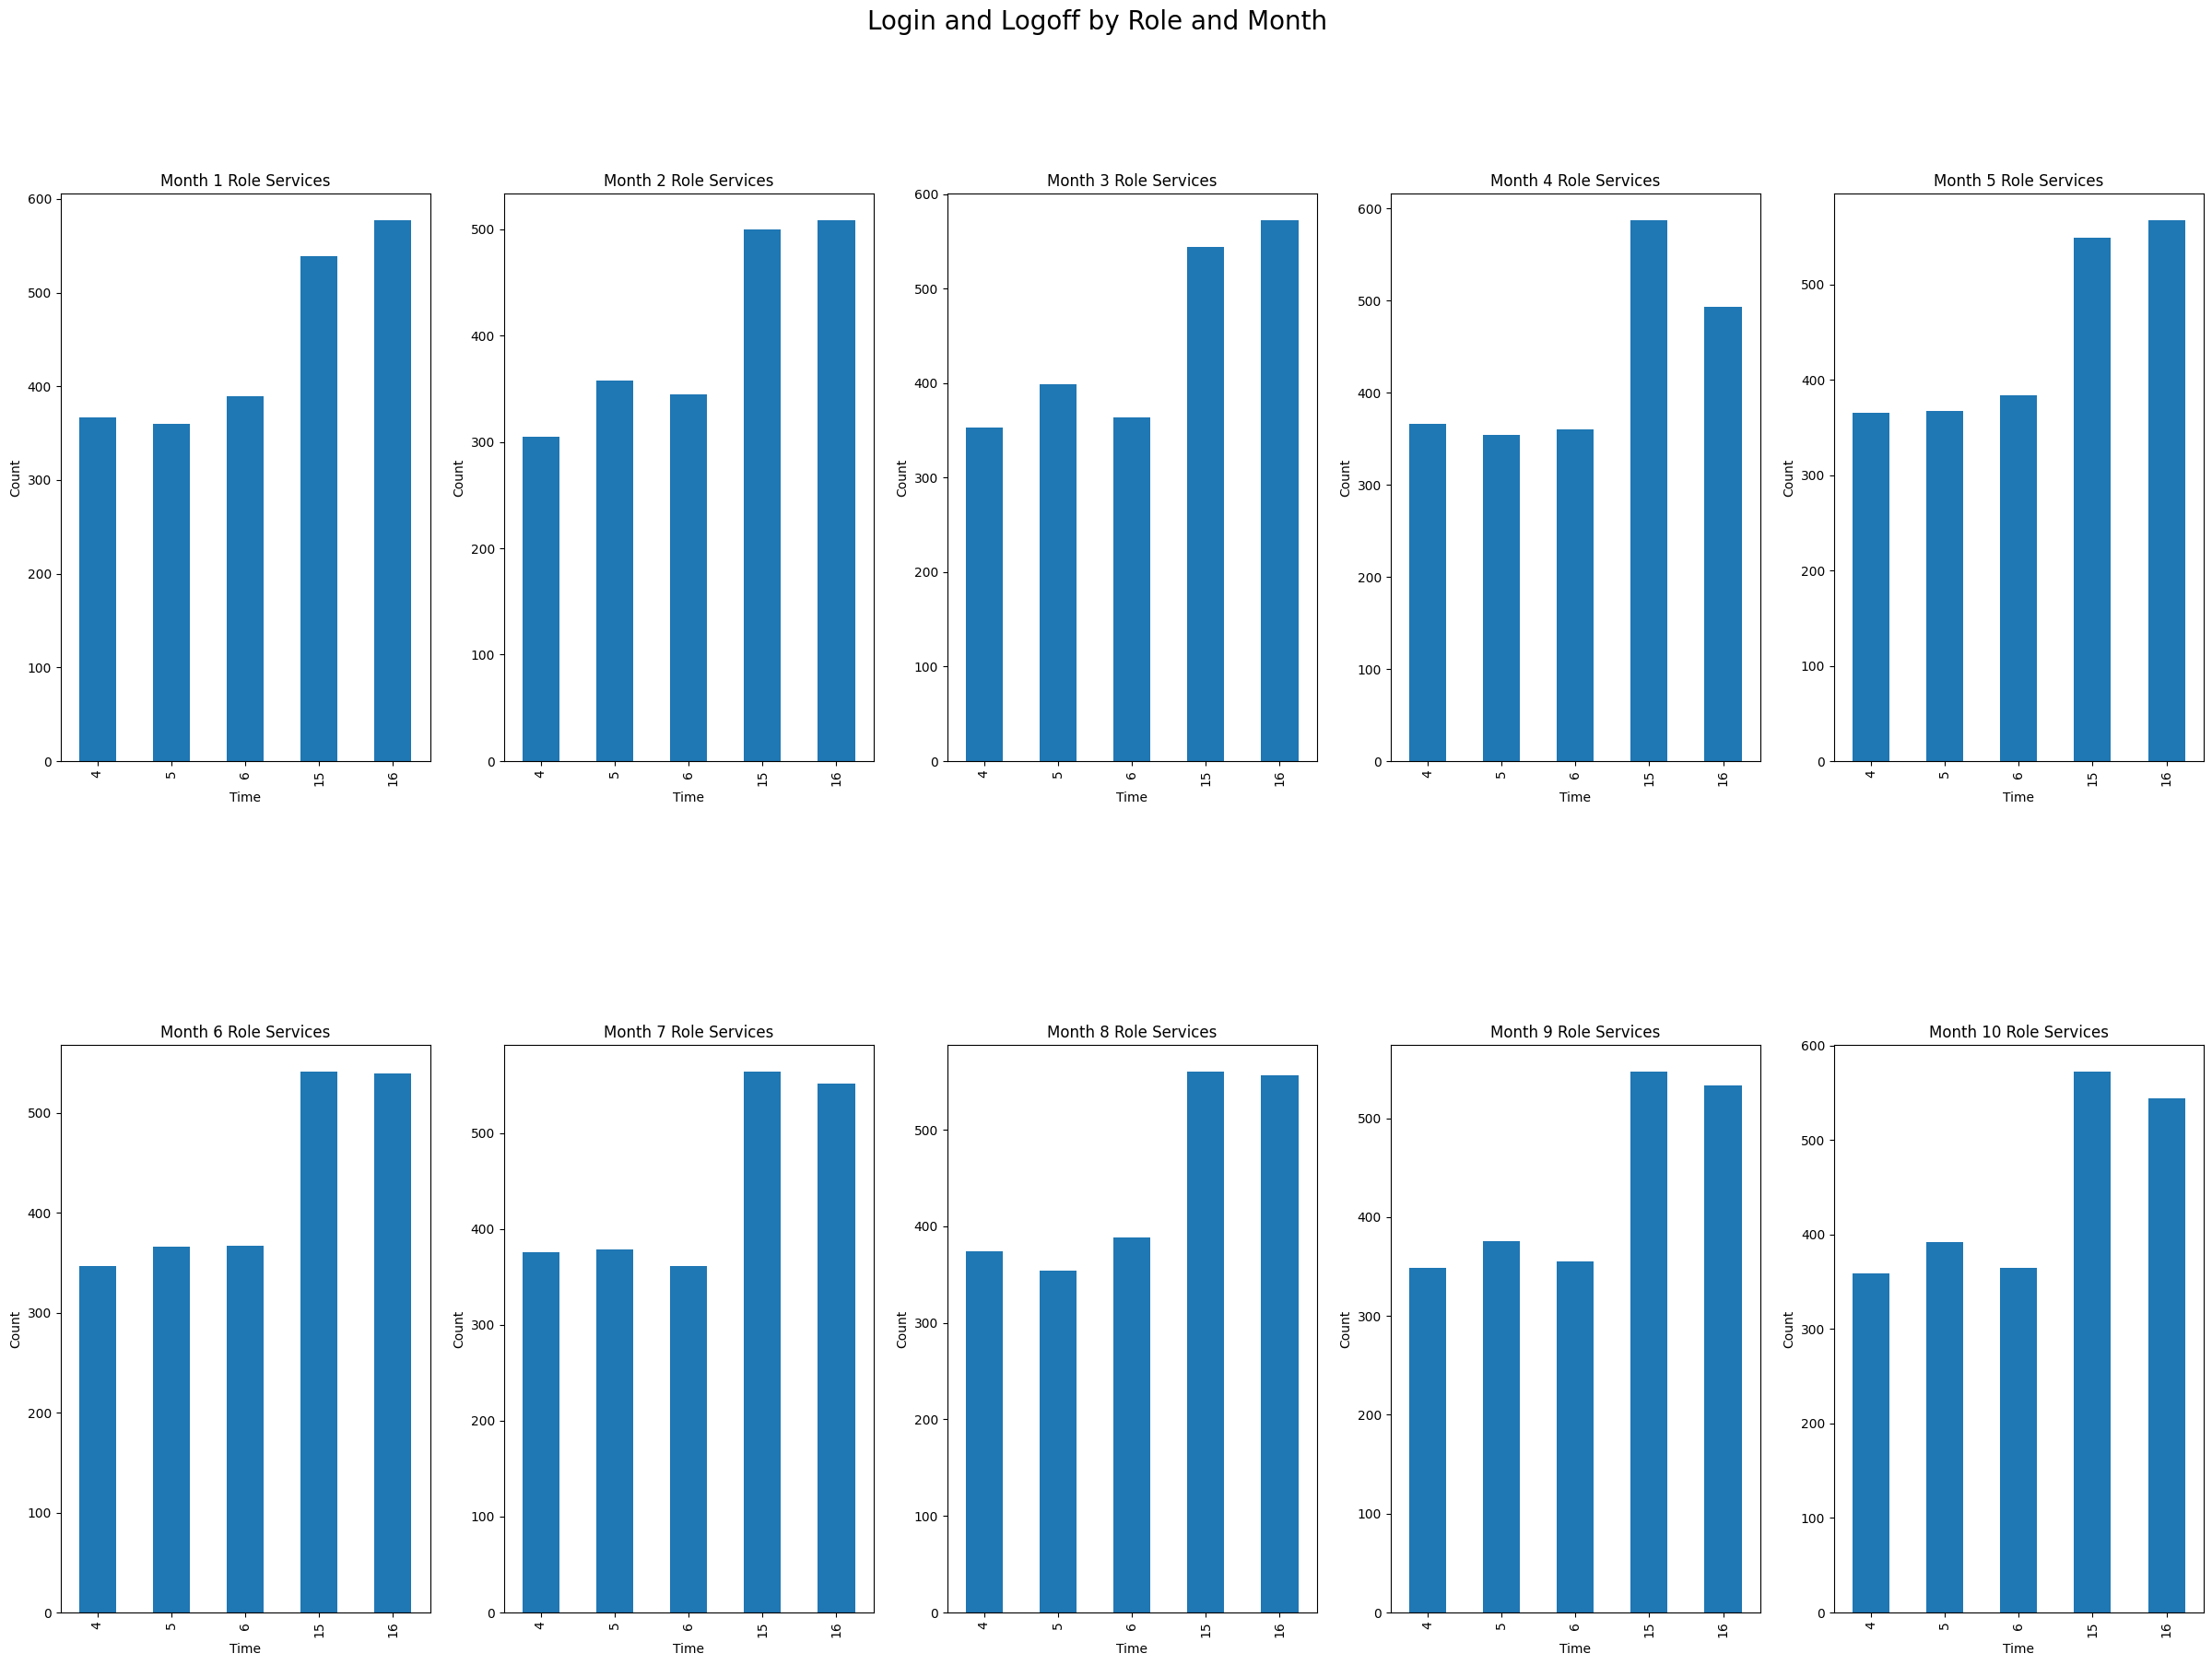

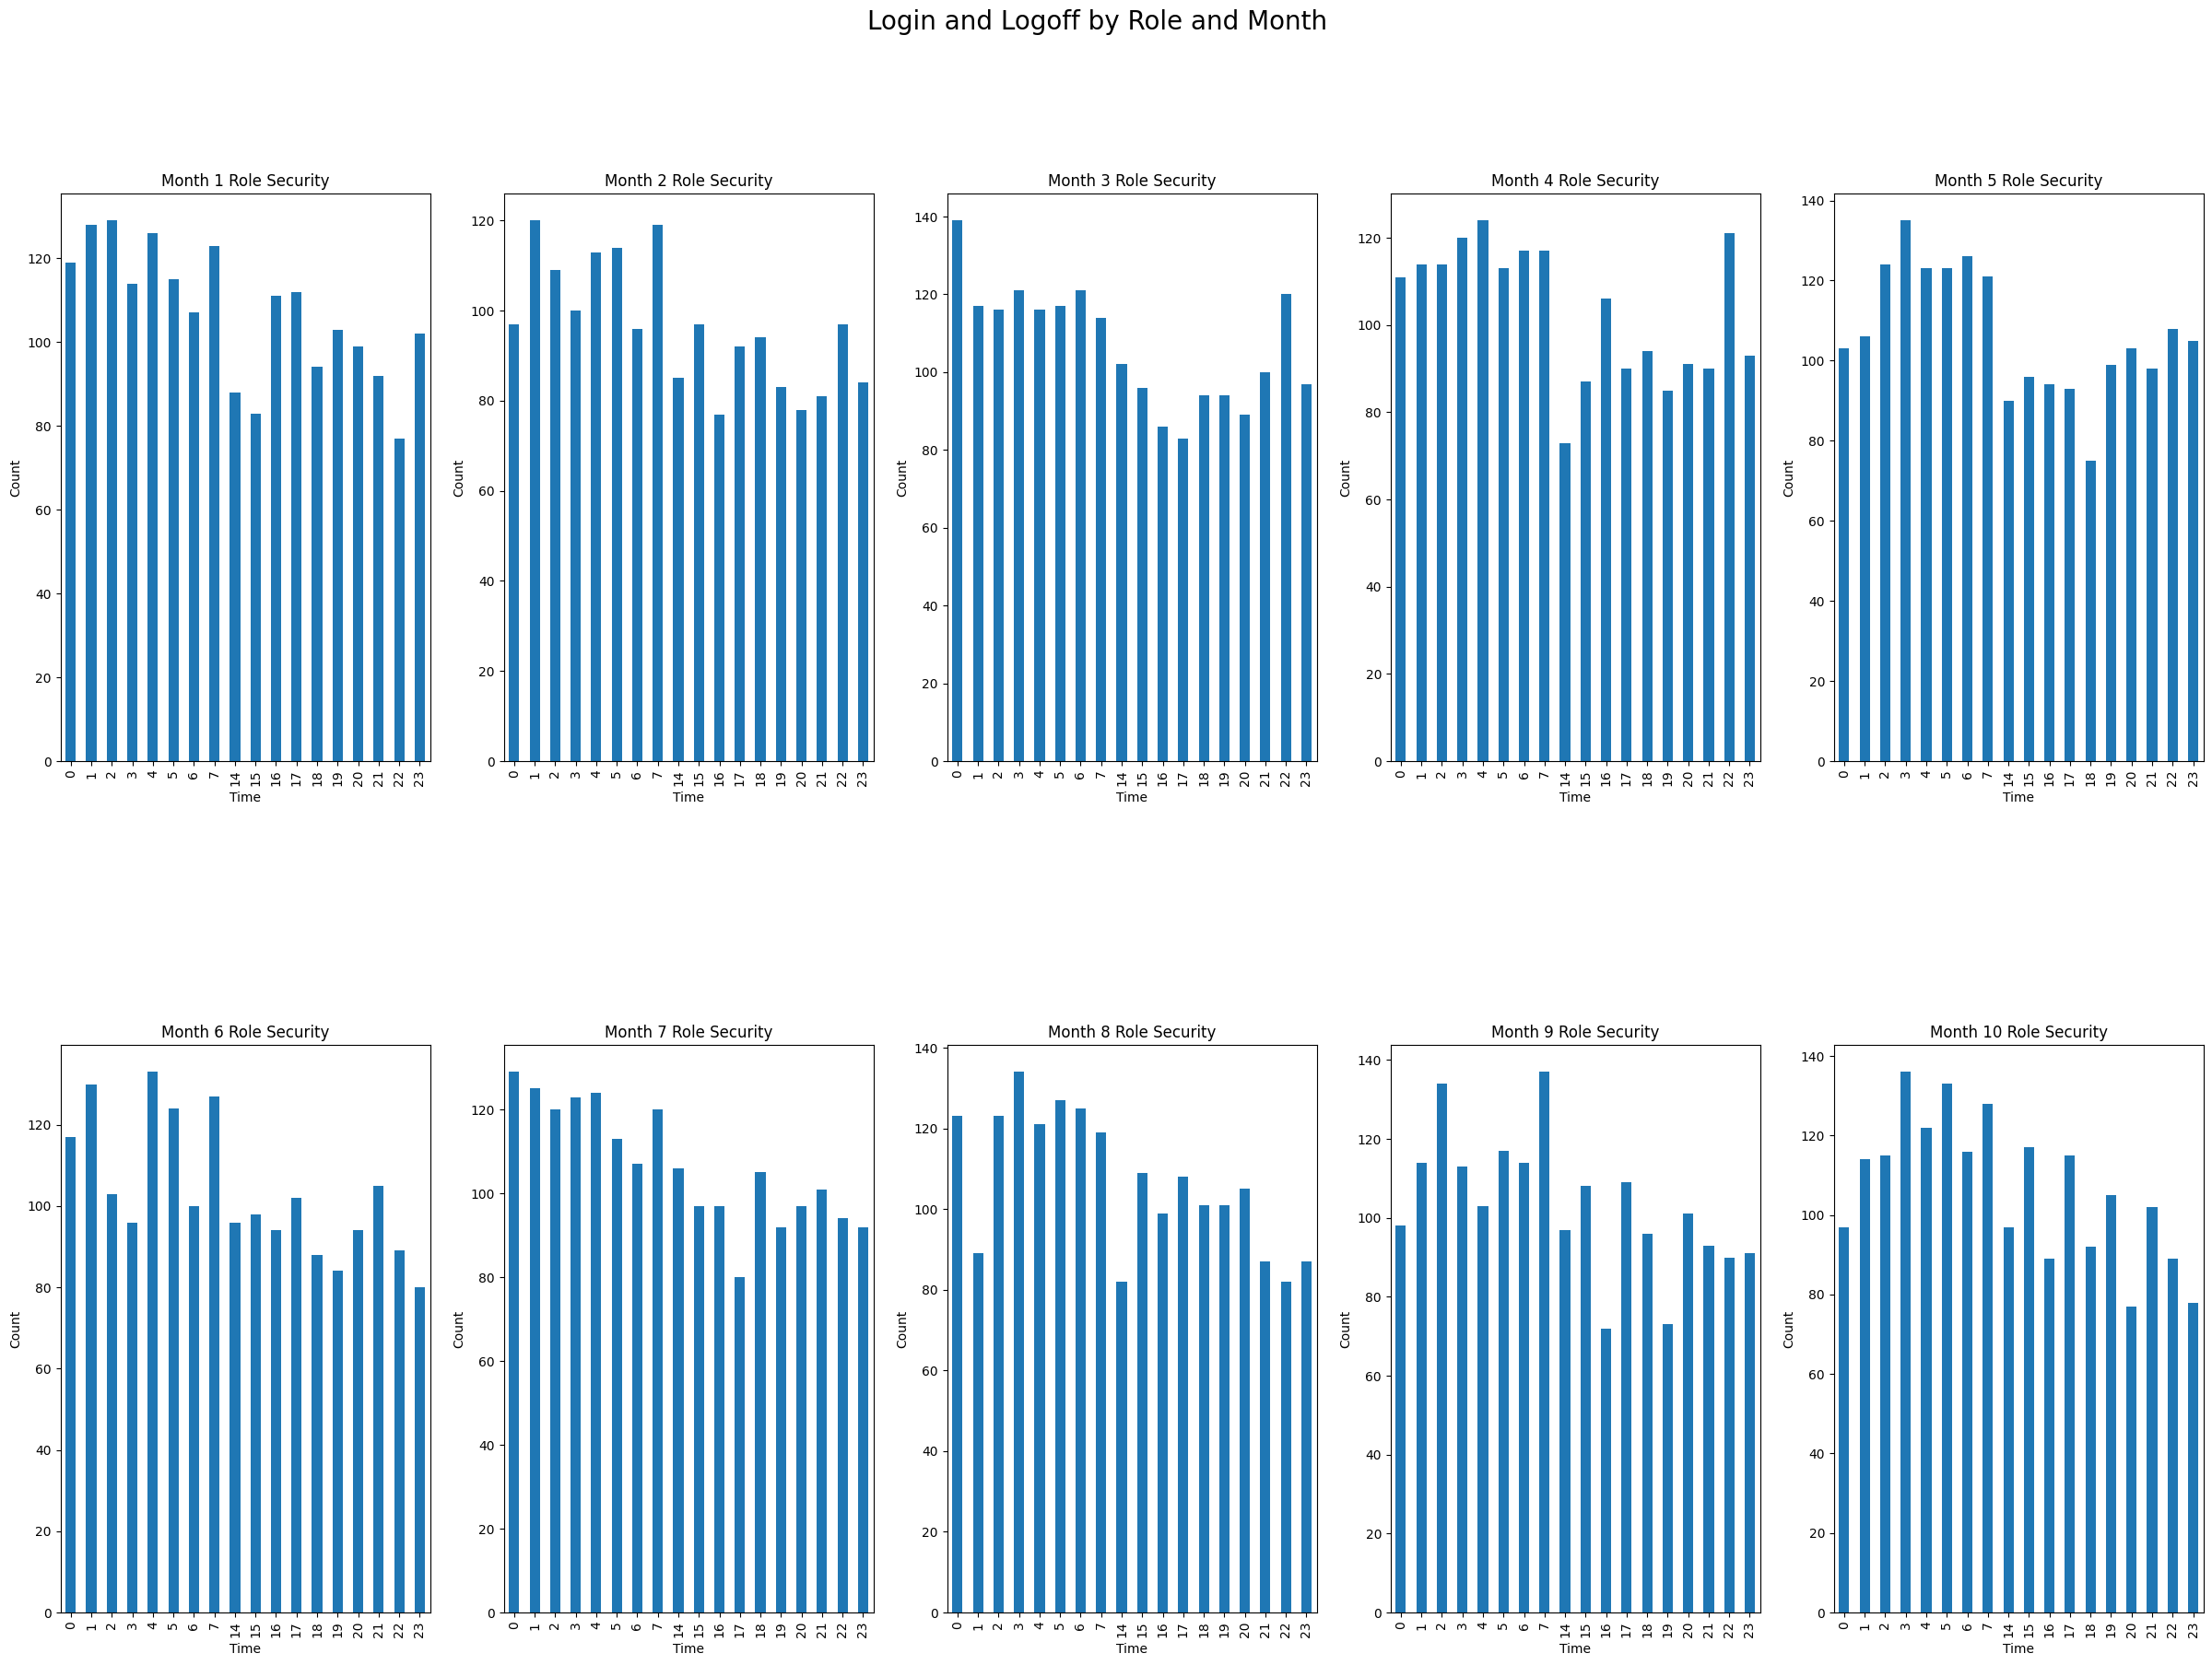

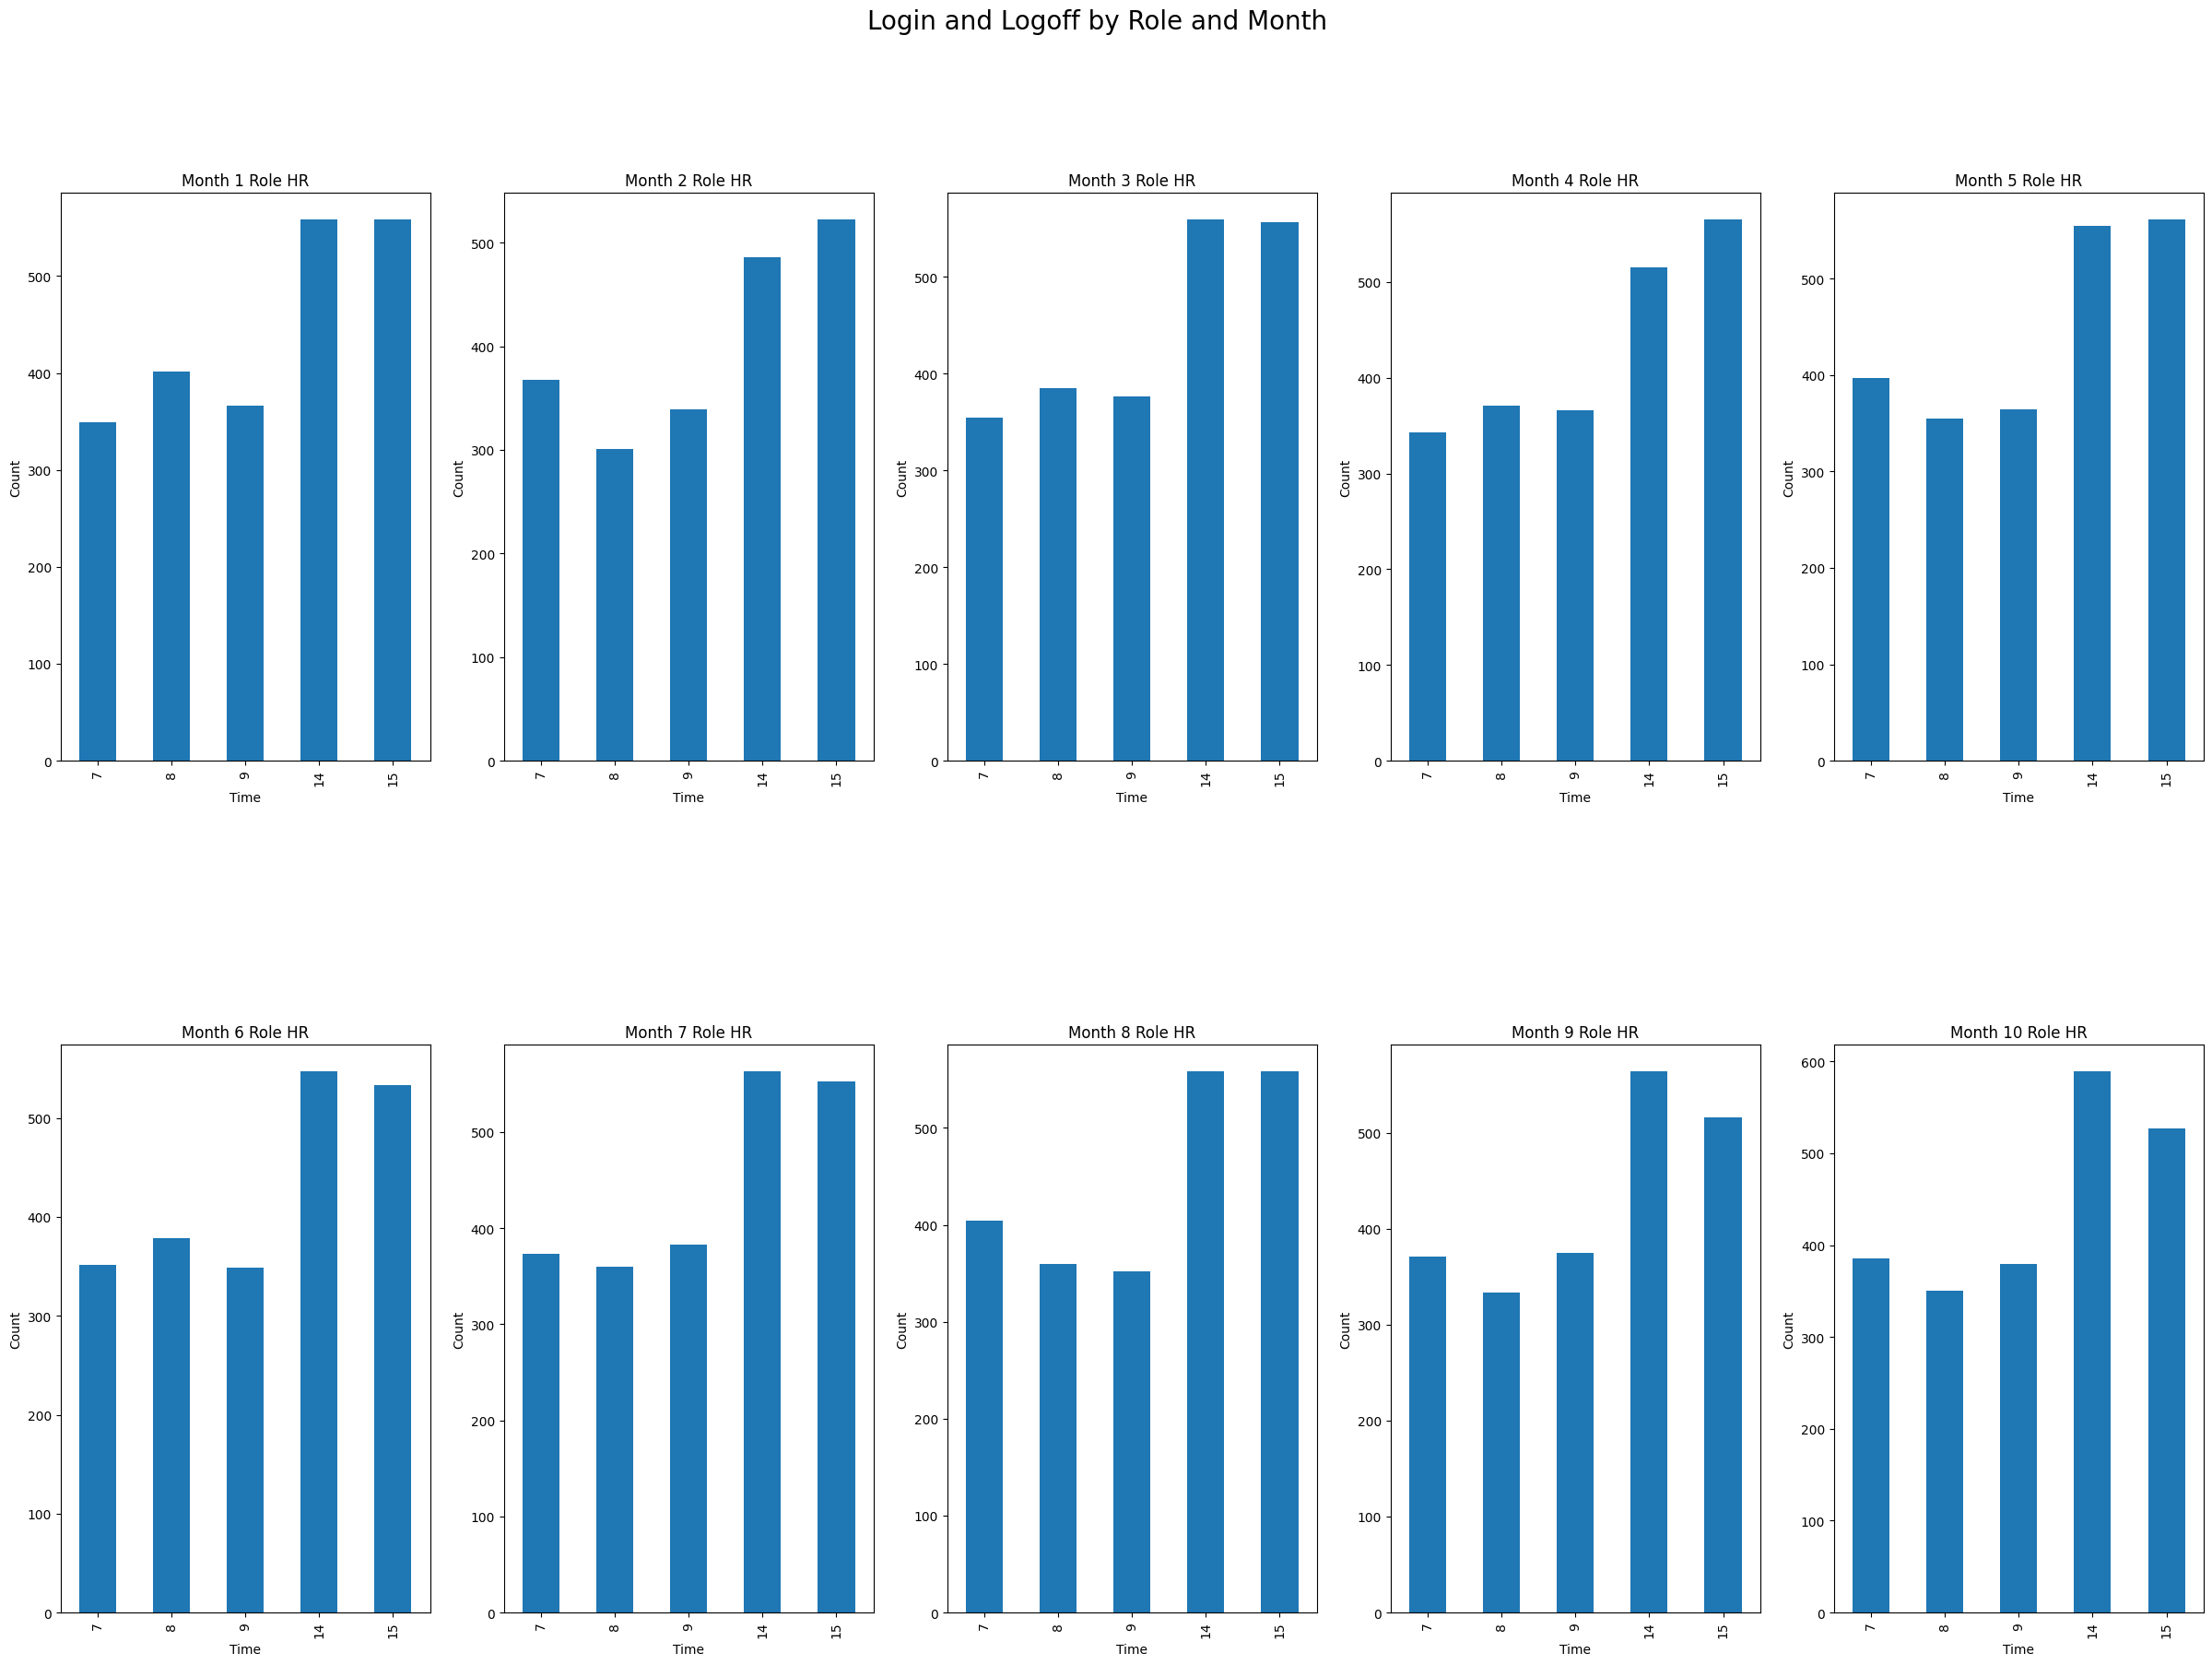

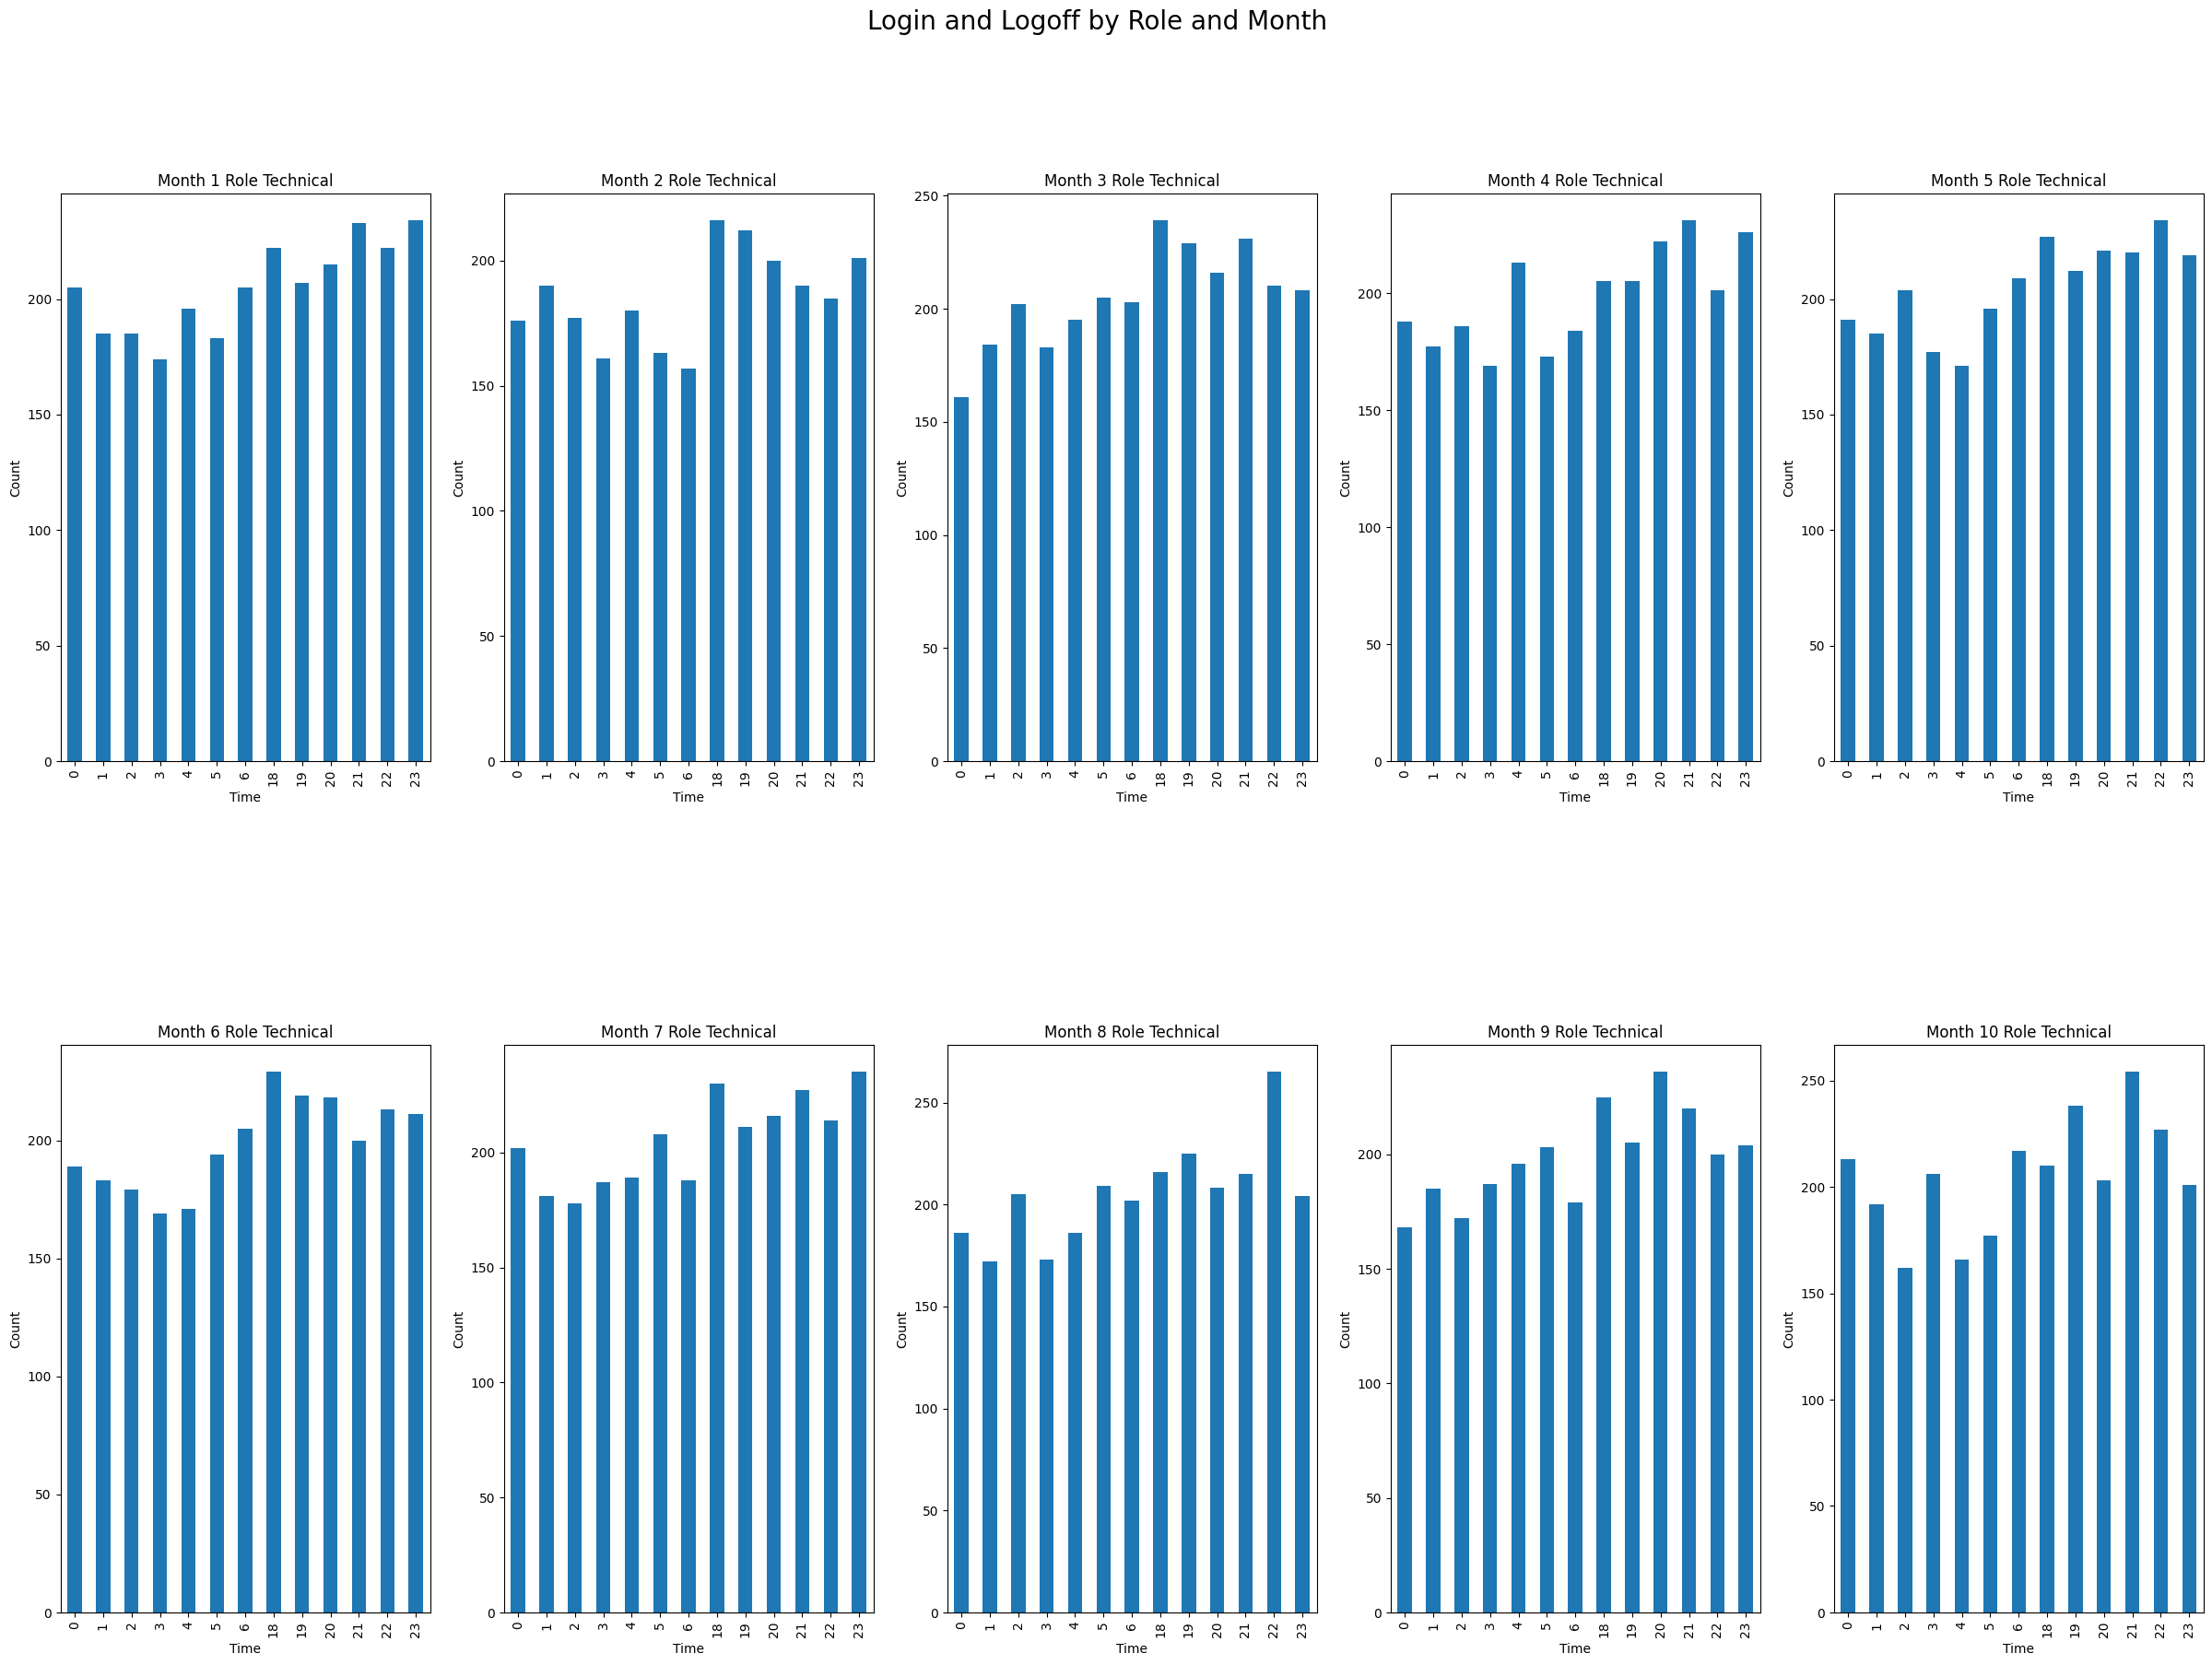

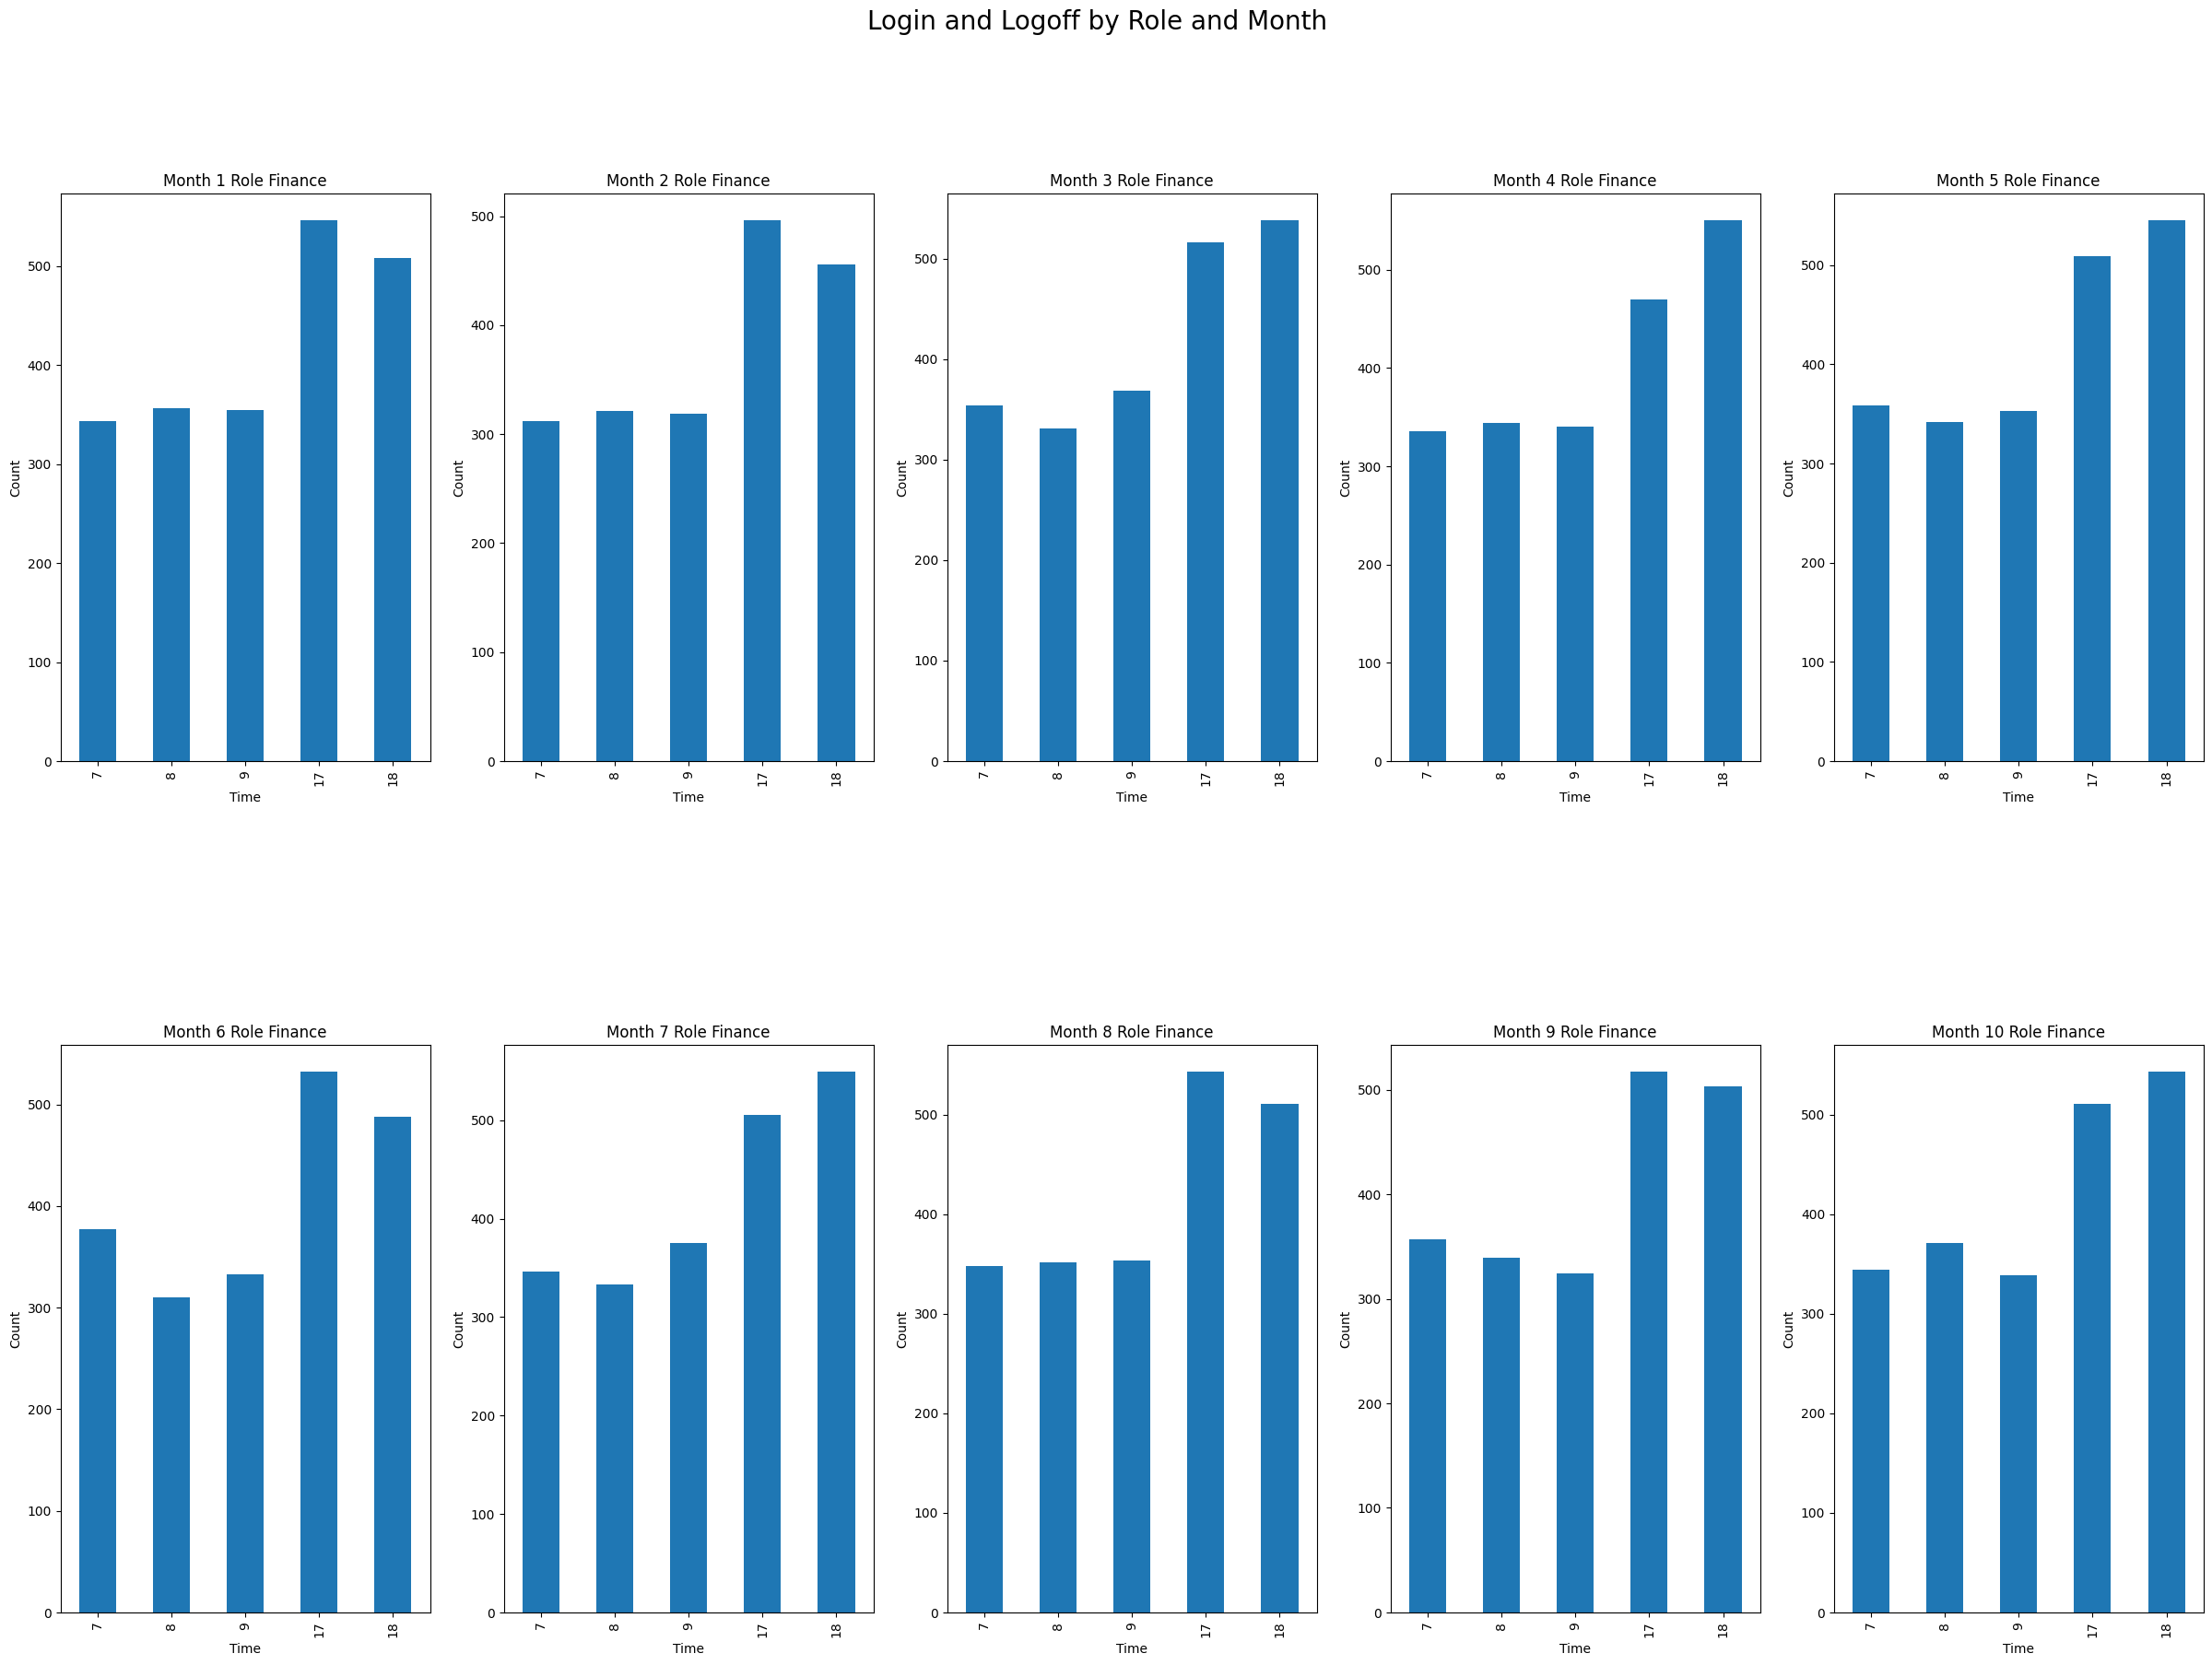

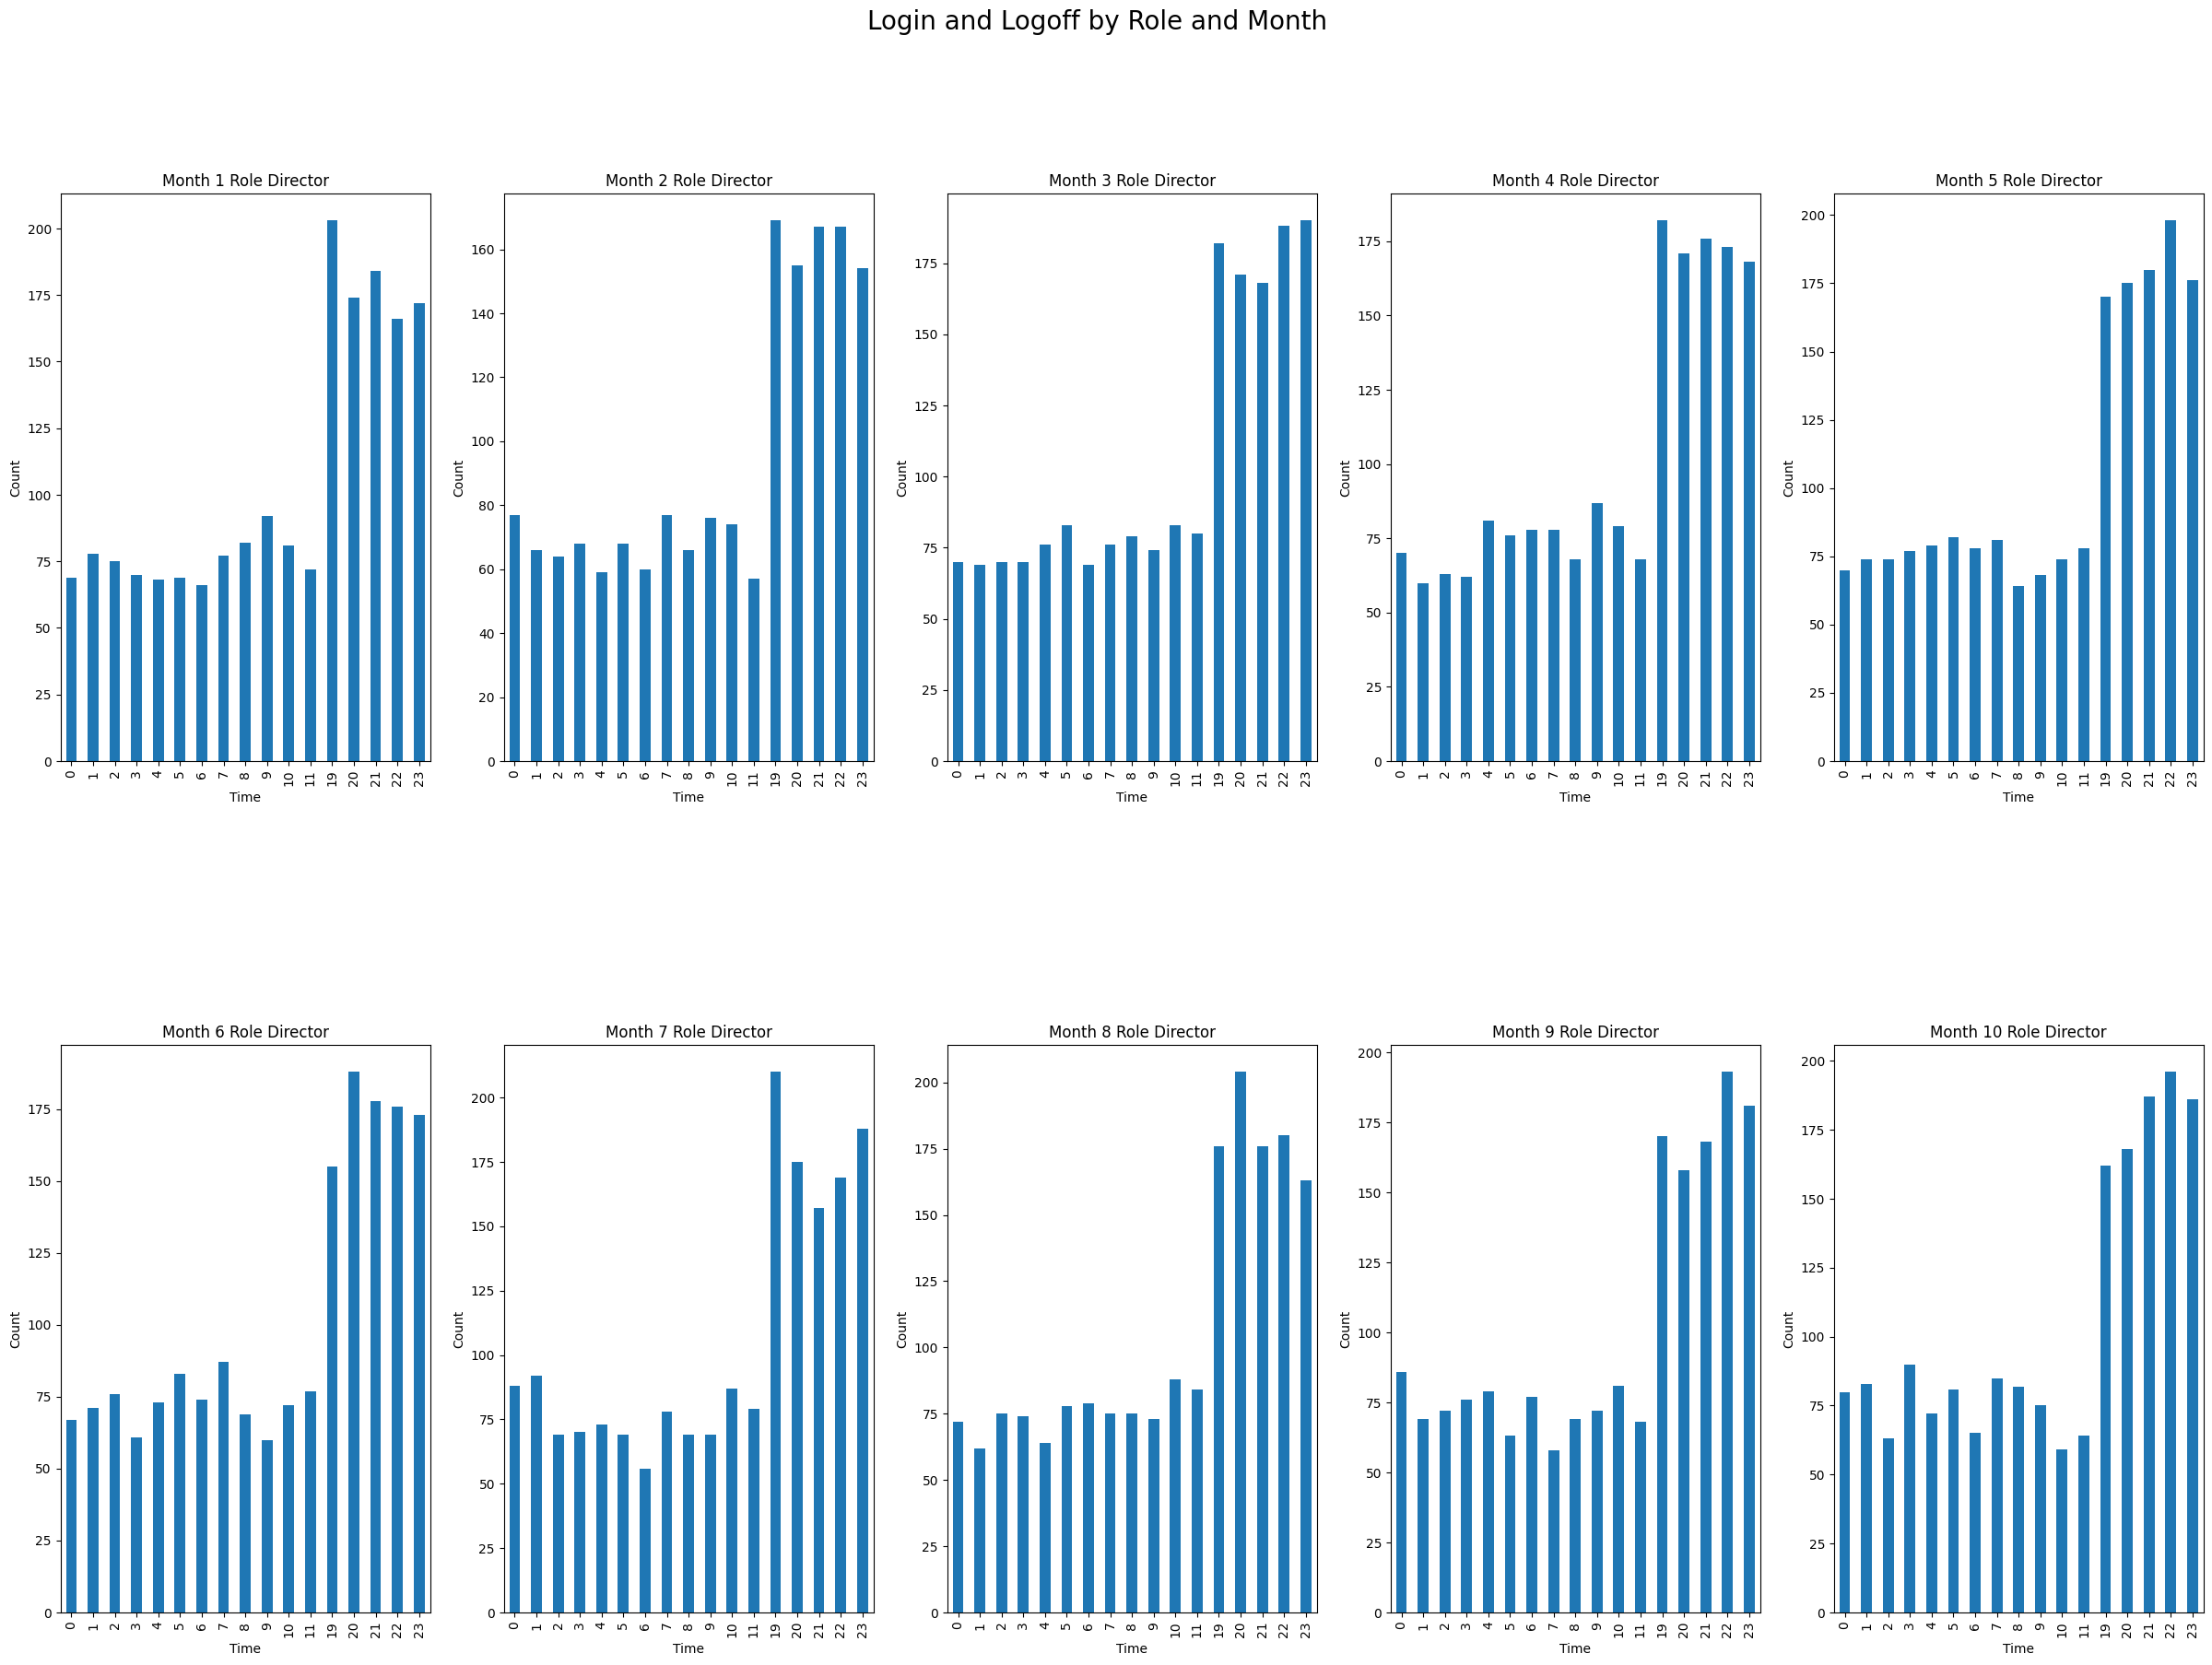

In [120]:
#loop all roles
for role in all_roles:
    #sets the plots
    plt.figure(figsize=(30, 20))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle('Login and Logoff by Role and Month', fontsize=20)
    #filter by month
    for month in range(1,11):
        #creates the subplots
        axs = plt.subplot(2, 5, month)
        #gets the data for each month
        eachMonthLogin =pd.DataFrame(login_data[login_data['datetime'].dt.month == month])
        #gets the data for each role
        allUsersLogin = pd.DataFrame(eachMonthLogin[eachMonthLogin['user'].isin(user_set[role])])
        #creates an hour column
        allUsersLogin['hour'] = allUsersLogin['datetime'].dt.hour
        #sets the index as hour
        allUsersLogin = allUsersLogin.set_index('hour')
        #plots the data
        allUsersLogin.index.value_counts().sort_index().plot(kind='bar',ax=axs)
        #formats the plots
        axs.set_title(f'Month {month} Role {role}')
        axs.set_xlabel('Time') 
        axs.set_ylabel('Count')
plt.show()



In [121]:
#gets average times of all directors and compares to usr-xef - nothing suspicios, all average 

#gets the month 4 and director dataframe
directorLogin =pd.DataFrame(login_data[login_data['datetime'].dt.month == 4])
directorLogin = pd.DataFrame(directorLogin[directorLogin['user'].isin(user_set['Director'])])
#gets all director users
allDirectorUsers = directorLogin['user'].unique()
#list of prevoiusly found suspicious days
suspiciousDays = [10,12,18,23]
print("Director Login and Logoff for suspicious days of month 4 (10,12,18,23) compared to usr-xef:\n")
#loops through day and user
for day in suspiciousDays:
    for user in allDirectorUsers:
        #creates dataframe per day
        allUsersExcept = pd.DataFrame(directorLogin[(directorLogin['datetime'].dt.day == day) & (directorLogin['user'] != 'usr-xef')])
        #formats datetime and create time column
        allUsersExcept['datetime'] = pd.to_datetime(allUsersExcept['datetime'])
        allUsersExcept['time'] = pd.to_datetime(allUsersExcept['datetime'], format='%H:%M')
        #splits by login or logoff and gets mean
        averageLoginTime = (allUsersExcept[allUsersExcept['action'] == 'login'])
        averageLoginTime = averageLoginTime['time'].mean()
        averageLogoffTime = (allUsersExcept[allUsersExcept['action'] == 'logoff'])
        averageLogoffTime = averageLogoffTime['time'].mean()

    #gets the login and logoff times of suspicious user
    suspiciousUser = pd.DataFrame(directorLogin[(directorLogin['datetime'].dt.day == day) & (directorLogin['user'] == 'usr-xef')])
    #prints out results
    print(f'Day {day}:')
    print(f'Average Login Time: {averageLoginTime}, Average Logoff Time: {averageLogoffTime}')
    print(suspiciousUser,'\n')

Director Login and Logoff for suspicious days of month 4 (10,12,18,23) compared to usr-xef:



Day 10:
Average Login Time: 2022-04-10 07:07:59.928571392, Average Logoff Time: 2022-04-10 21:50:35.107142912
                 datetime     user  action    pc
49604 2022-04-10 06:23:12  usr-xef   login  pc89
49987 2022-04-10 23:29:23  usr-xef  logoff  pc89 

Day 12:
Average Login Time: 2022-04-12 06:19:33.214286080, Average Logoff Time: 2022-04-12 21:10:44.749999872
                 datetime     user  action    pc
50719 2022-04-12 08:59:27  usr-xef   login  pc89
50998 2022-04-12 23:44:11  usr-xef  logoff  pc89 

Day 18:
Average Login Time: 2022-04-18 06:04:38.357143040, Average Logoff Time: 2022-04-18 21:23:34.571428608
                 datetime     user  action    pc
53606 2022-04-18 06:36:46  usr-xef   login  pc89
53989 2022-04-18 23:12:05  usr-xef  logoff  pc89 

Day 23:
Average Login Time: 2022-04-23 06:12:36.142856960, Average Logoff Time: 2022-04-23 21:38:50.785714176
                 datetime     user  action    pc
56070 2022-04-23 04:33:24  usr-xef   login  pc89
56463 2022-04-2

## Emails
### Analysis
- I first created networkx graph to check for any relations between usr-xef and recipients but nothing suspicious was shown
- Then I got how many times usr-xef sent emails to each recipient, the highest and the information about the recipient
- It shows that for month 4 usr-cko was sent 120 emails by suspicious user usr-xef

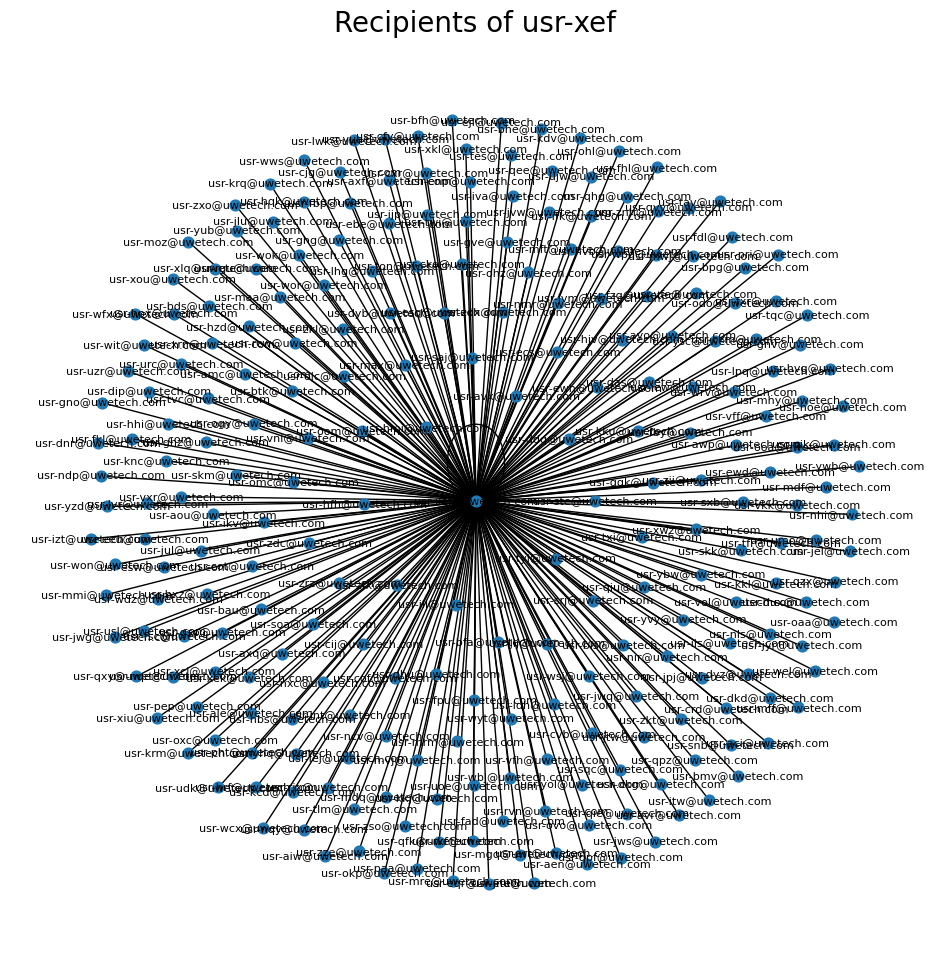

In [122]:
######### ADD YOUR CODE HERE ##########
emailsSus = pd.DataFrame(email_data)

#gets only the corresponding users based on sender
emailsAll = pd.DataFrame(emailsSus[emailsSus['sender'] == 'usr-xef@uwetech.com'])

#arrays and comments not changed 
#creates the graph
G = nx.Graph()
data1 = nx.node_link_data(G)

sArray = [] #source
dArray = [] #destination

#turn the dataframe values into an array
for i in emailsAll['sender']:
    sArray.append(i)
for j in emailsAll['recipient']:
    dArray.append(j)


graphArray = [] 
#get the source and destination arrays and add them to the graph array
for i in range(len(sArray)):
    n = sArray[i],dArray[i]
    graphArray.append(n)

#add the graph edges
G.add_edges_from(*[graphArray])


#makes the plot bigger
plt.figure(figsize=(12,12)) 
plt.title('Recipients of usr-xef', fontsize=20)
#display the graph
nx.draw(G,with_labels=True,node_size= 60,font_size=8)
plt.show()

In [123]:
#adds a column for the date
emailsAll['date'] = emailsAll['datetime'].dt.date

#groups the date and recipient
reciepentsPerDayEmails = emailsAll.groupby(['date', 'recipient']).size().reset_index(name='count')

#gets the max number of emails of the day
maxRecipient = reciepentsPerDayEmails['count'].idxmax()

#gets the information about recipeint, date and count
suspiciousRecipient = reciepentsPerDayEmails.loc[maxRecipient]
print("Recipient information of highest day:")
print(suspiciousRecipient)


Recipient information of highest day:
date                  2022-04-05
recipient    usr-cko@uwetech.com
count                        120
Name: 4737, dtype: object


### Question 7: Describe what you believe are the key findings of your investigation. You should clearly state the suspect identified, and the sequential order of suspicious events, including the date and time that these occurred. You should then provide your own critical reflection of what has occurred in this scenario, giving justification for any assumptions made. Limit your response to a maximum of 400 words. 

Please make clear which dataset you have used for your investigation.

#### (10 marks)


The dataset I have used is the uwetech-dataset02. The key findings of my investigations are that the user ‘usr-xef’ is the suspicious user. This user is in the Director role and all of the suspicious events took place in Month 4 (April). The order of these events are as follows: On the 05/04/2022 the highest number of emails were sent to email ‘usr-cko@uwetech.com’ with a count of 120. On the 10/04/2022, files accessed was  /docs/clients ranging from 07:38:54 to 22:50:44. On the 12/04/2022, usb insert and removed ranging from 17:09:19 to 17:36:23.On the 18/04/2022, websites accessed were 'http://www.lawyers4u.com' and 'http://www.linkedin.com' ranging from 06:46:33 to 21:41:5. Again on the 18/04/2022, usb insert and removed ranging from 08:19:25 to 16:47:42. Finally on the 23/04/2022, usb insert and removed ranged from 15:35:03 to 16:57:00. For the files accessed, usr-xef was the only user in the Director role that has ever accessed those files. For the web data, usr-xef was the only Director that has ever accessed those websites. For USB data, usr-xef was the only Director to ever use USB’s. For emails, usr-xef sent 120 emails in one day to usr-cko.
A possible scenario for usr-xef is as follows: usr-xef corresponded to usr-cko to plan an exploit or collect classified data, as shown by the emails being the first event (on the 5th). Then usr-xef accessed confidential client documents on the 10th throughout the day, as shown by the files accessed. Then on the 12th, 18th and 23rd usr-xef downloaded the client documents through the USB, as shown by the USB analysis. At the same time as downloading client documents on the 18th, usr-xef contacted lawyers from ‘lawyers4u’  and potential business employees/clients through ‘LinkedIn’.  
